In [373]:
#!pip install -U scikit-learn

# **Introduction**


**This is WHO data on a variety of health metrics, demographic data, and country information for the years 2000-2015 for 193 countries worldwide. The primary 'dependent variable' is the life expectancy of each country for each year; ### every other column should contribute to that value in some way, and thereby be useful in predicting life expectancy. The columns of data fall broadly into the following categories:**

## **Health data:**

Adult Mortality- Probability of dying age 15-60, per 1000 people

Infant deaths- Deaths under 2-years per 1000

Alcohol- Per capita (age 15+) consumption in liters

Hepatitus B- HepB immunization coverage among 1-year-olds

Measles- Reported cases per 1000

BMI- Average body mass index for population

Under-5 deaths- Deaths of those younger than 5, per 1000

Polio- Immunization coverage for Polio for 1-year-olds

Diptheria- Immunization coverage for Dipheria for 1-year-olds

Incident HIV- Deaths from HIV/AIDS 15-49 years, per 1000

Thinness 10-19 years- Proportion of thinness in children age 10-19 (BMI 2+ standard deviations from the mean)

Thinness 5-9 years- Proportion of thinness in children age 5-9 (BMI 2+ standard deviations from the mean)


## **Financial data:**

Percentage expenditure- Percentage of GDP spent on healthcare

Total expenditure- Percentage of total government spending on healthcare

Income composition (ICR)- Human Development Index in terms of income composition of resources. Measures the diversity of a country's capital-generating industries.

GDP per capita- Gross domestic product divided by population


## **Country information:**

Status developed- Developed status (1 = True, 0 = False)

Status developing- Developing status (1 = True, 0 = False)

Schooling- Average years of formal school attended, age 25

Population- Country population in millions

Country- Country name

Year- Year the data is from

Region- Geographic location in the world


# Objective
 **To consider the most effective way, as indicated by the data, to maximize life expectancy. Intuition would suggest maximizing healthcare spending, increasing immunization and education, and reducing disease. The aim of this investigation is to evaluate which of these factors are most impactful, and what sort of strategies a country should adopt to ensure its ##citizens live as long as possible**.


# Research Questions
1-Are disease, immuniztion rates, and other health data predictive of life expectancy?

2-Are financial and general country data predictive of life expectancy?

3-Which features of the data contribute the most to a longer life expectancy?

4-How can a nation best increase its citizens' life expectancy?

In [374]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.impute import KNNImputer
import tensorflow as tf
from scipy import stats
import math
from math import sqrt, pi


In [375]:
data=pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\archive (1)\Life-Expectancy-Data-Updated.csv")# health

In [376]:
data.shape

(2864, 21)

In [377]:
data.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [378]:
#data.rename(columns={'new_column_name': 'death_Age'}, inplace=True)

In [379]:
data.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.252022   
std       4.610577      27.538117          44.569974       114.910267   
min    2000.000000       1.800000           2.300000        49.380000   
25%    2003.750000       8.100000           9.675000       106.907500   
50%    2007.500000      19.600000          23.100000       163.840000   
75%    2011.250000      47.350000          66.000000       246.795000   
max    2015.000000     138.100000         224.900000       719.360000   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820862    84.292598    77.344972    25.032926   
std               3.981972    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

In [380]:
data.head()

Country Region  Year  Infant_deaths  Under_five_deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2014           55.2               73.6   
2  Afghanistan   Asia  2013           57.3               76.9   
3  Afghanistan   Asia  2008           69.2               95.7   
4  Afghanistan   Asia  2006           74.6              104.1   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0           310.83                 0.02         62.0     12.0  21.7  ...   
1           231.98                 0.01         62.0     44.0  23.2  ...   
2           236.22                 0.01         64.0     38.0  23.0  ...   
3           259.81                 0.03         64.0     23.0  22.5  ...   
4           271.49                 0.03         64.0     18.0  22.3  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0        24.0           0.02           148.0           20.78   
1        62.0           0.03           565.0           33.37   
2        64.0           0.03           569.0           32.27   
3        64.0           0.02           399.0           27.72   
4        58.0           0.02           354.0           26.43   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          2.3                       2.5        2.2   
1                         17.5                      17.5        3.5   
2                         17.7                      17.7        3.5   
3                         18.8                      18.9        3.0   
4                         19.2                      19.3        2.7   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                       0.0                        1.0             55.8  
1                       0.0                        1.0             63.0  
2                       0.0                        1.0             62.5  
3                       0.0                        1.0             59.9  
4                       0.0                        1.0             58.8  

[5 rows x 21 columns]

In [381]:
data.tail()

Country  Region  Year  Infant_deaths  Under_five_deaths  \
2859  Zimbabwe  Africa  2006           53.4               95.0   
2860  Zimbabwe  Africa  2002           50.7               92.6   
2861  Zimbabwe  Africa  2005           51.7               93.1   
2862  Zimbabwe  Africa  2007           54.6               95.7   
2863  Zimbabwe  Africa  2010           52.1               86.4   

      Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
2859           653.92                 2.35         68.0     64.0  23.5  ...   
2860           719.36                 2.39         73.0     64.0  23.3  ...   
2861           670.28                 2.17         65.0     64.0  23.5  ...   
2862           637.56                 2.26         72.0     64.0  23.5  ...   
2863           509.09                 3.38         90.0     64.0  23.6  ...   

      Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
2859        70.0           8.78          1091.0           12.16   
2860        71.0          11.04          1559.0           11.95   
2861        68.0           9.20          1137.0           12.08   
2862        73.0           8.29          1042.0           12.26   
2863        89.0           6.73          1110.0           12.70   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
2859                          8.6                       8.6        6.8   
2860                          1.2                       1.3        6.9   
2861                          9.0                       9.0        6.8   
2862                          8.2                       8.2        7.0   
2863                          7.1                       7.0        7.3   

      Economy_status_Developed  Economy_status_Developing  Life_expectancy  
2859                       0.0                        1.0             43.9  
2860                       0.0                        1.0             43.5  
2861                       0.0                        1.0             43.2  
2862                       0.0                        1.0             44.9  
2863                       0.0                        1.0             50.6  

[5 rows x 21 columns]

In [382]:
data.isnull().sum()#return number of nulls in each coloumn

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [383]:
#data['Life expectancy'].value_counts() # function that find number of labels / outputs  in a unique way

In [384]:
data.duplicated().sum()#return number of duplicated rows


0

In [385]:
for x in data.select_dtypes(include="object").columns:#loop about the column not a range
  print(x)#x is the coloumn including that type
  print(data[x].value_counts())

Country
Afghanistan    16
Rwanda         16
Nepal          16
Netherlands    16
New Zealand    16
               ..
Georgia        16
Germany        16
Ghana          16
Greece         16
Zimbabwe       16
Name: Country, Length: 179, dtype: int64
Region
Africa                           816
Asia                             432
European Union                   432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: Region, dtype: int64


# countries and Time frames 

In [386]:

#data=pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\archive (1)\Life-Expectancy-Data-Updated.csv")# health

"""
# Step 1: Load the dataset


# Step 2 Convert 'Date' column to datetime format

data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-01-01')


# Step 3: Set 'Date' as the index

data.set_index('Date', inplace=True)

# Step 4: remove year

data.drop(columns=['Year'], inplace=True)

# Step 5:sort by country , date

data= data.sort_values(by=['Country', 'Date'])

# Reset the index if desired
#data.reset_index(drop=True, inplace=True)

# Step 5: Create separate time series for each country

country_time_series = {country: data for country, data in data.groupby('Country')}

# Step 6: Accessing individual time series
country_a_series = country_time_series['Albania']  # Replace 'CountryA' with the actual country name
print(country_a_series)
"""

"\n# Step 1: Load the dataset\n\n\n# Step 2 Convert 'Date' column to datetime format\n\ndata['Date'] = pd.to_datetime(data['Year'].astype(str) + '-01-01')\n\n\n# Step 3: Set 'Date' as the index\n\ndata.set_index('Date', inplace=True)\n\n# Step 4: remove year\n\ndata.drop(columns=['Year'], inplace=True)\n\n# Step 5:sort by country , date\n\ndata= data.sort_values(by=['Country', 'Date'])\n\n# Reset the index if desired\n#data.reset_index(drop=True, inplace=True)\n\n# Step 5: Create separate time series for each country\n\ncountry_time_series = {country: data for country, data in data.groupby('Country')}\n\n# Step 6: Accessing individual time series\ncountry_a_series = country_time_series['Albania']  # Replace 'CountryA' with the actual country name\nprint(country_a_series)\n"

# **Data check**

In [387]:
dataa=data

In [388]:
data.head()

Country Region  Year  Infant_deaths  Under_five_deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2014           55.2               73.6   
2  Afghanistan   Asia  2013           57.3               76.9   
3  Afghanistan   Asia  2008           69.2               95.7   
4  Afghanistan   Asia  2006           74.6              104.1   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0           310.83                 0.02         62.0     12.0  21.7  ...   
1           231.98                 0.01         62.0     44.0  23.2  ...   
2           236.22                 0.01         64.0     38.0  23.0  ...   
3           259.81                 0.03         64.0     23.0  22.5  ...   
4           271.49                 0.03         64.0     18.0  22.3  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0        24.0           0.02           148.0           20.78   
1        62.0           0.03           565.0           33.37   
2        64.0           0.03           569.0           32.27   
3        64.0           0.02           399.0           27.72   
4        58.0           0.02           354.0           26.43   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          2.3                       2.5        2.2   
1                         17.5                      17.5        3.5   
2                         17.7                      17.7        3.5   
3                         18.8                      18.9        3.0   
4                         19.2                      19.3        2.7   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                       0.0                        1.0             55.8  
1                       0.0                        1.0             63.0  
2                       0.0                        1.0             62.5  
3                       0.0                        1.0             59.9  
4                       0.0                        1.0             58.8  

[5 rows x 21 columns]

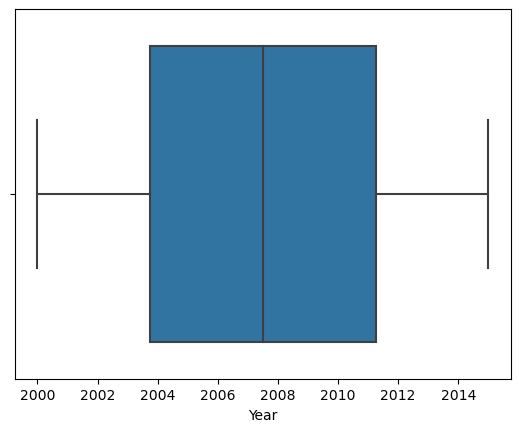

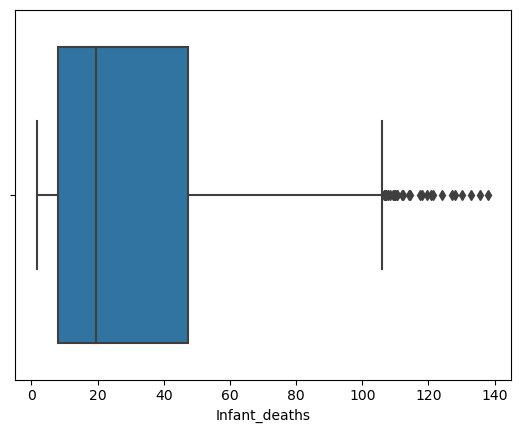

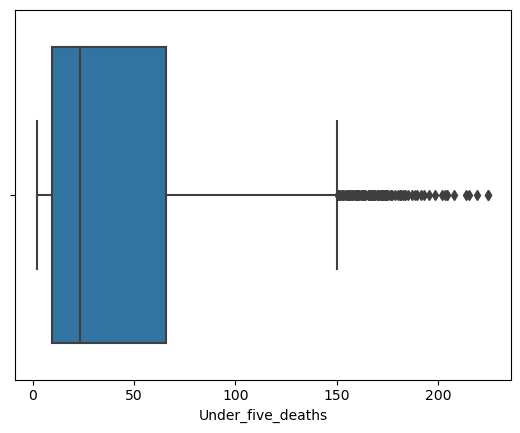

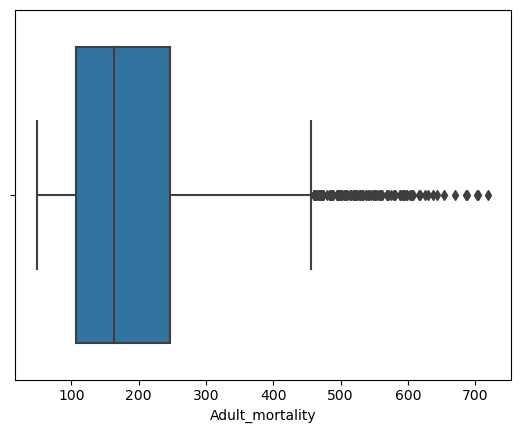

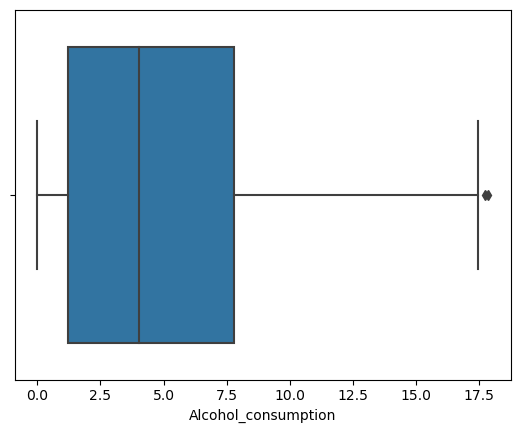

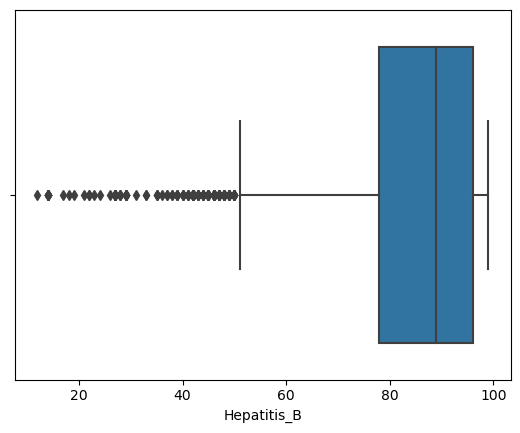

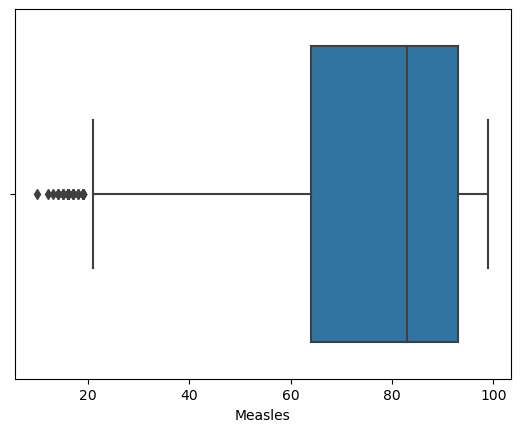

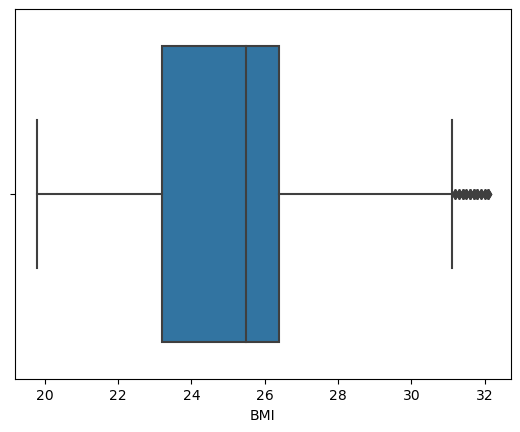

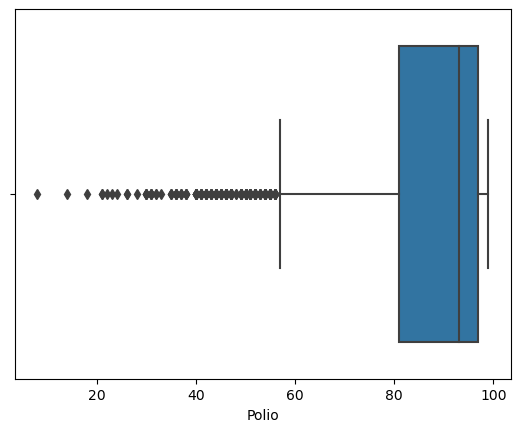

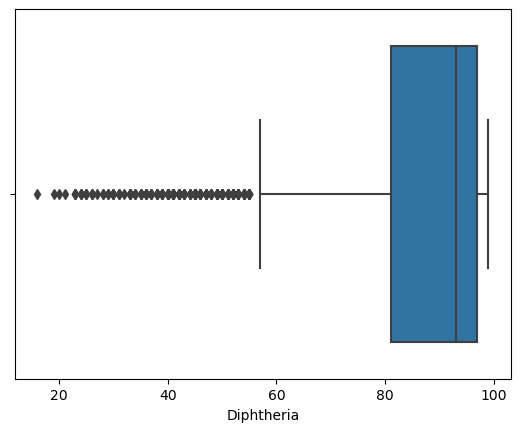

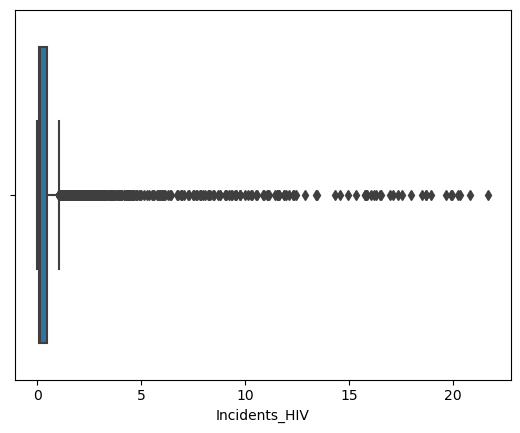

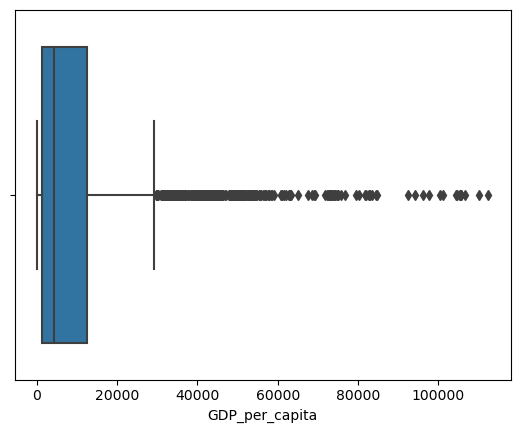

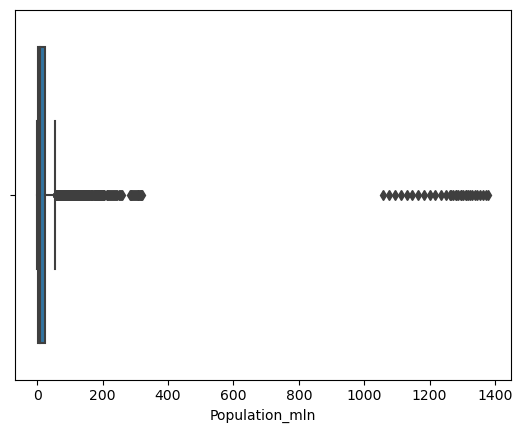

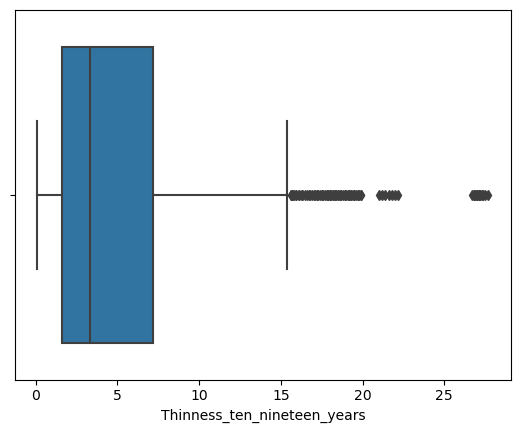

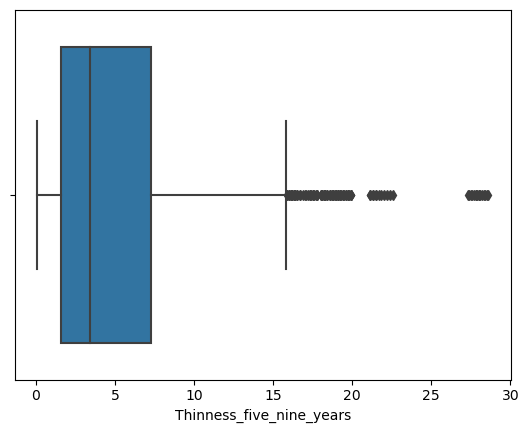

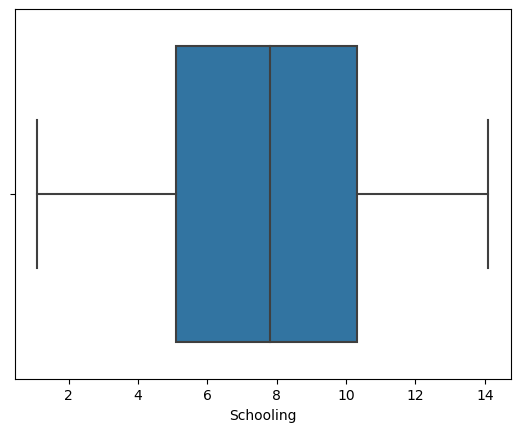

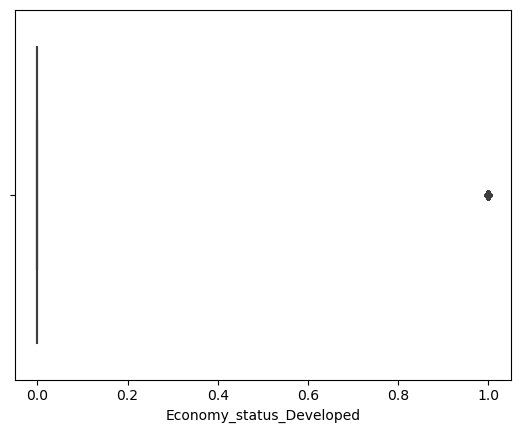

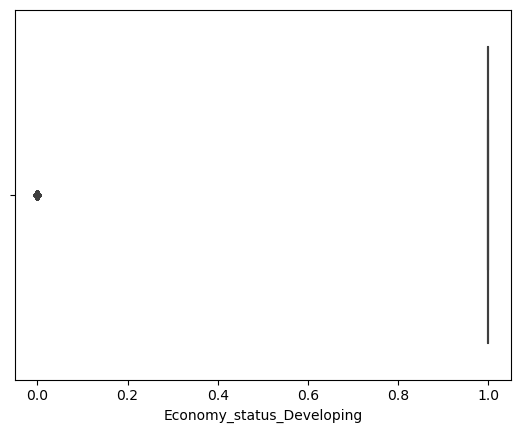

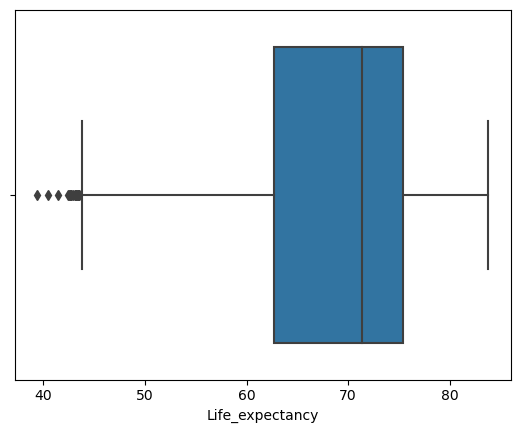

In [389]:
#view outliners by box blot
for i in dataa.select_dtypes(include="number").columns:
  sns.boxplot(data=dataa, x=i)
  plt.show()

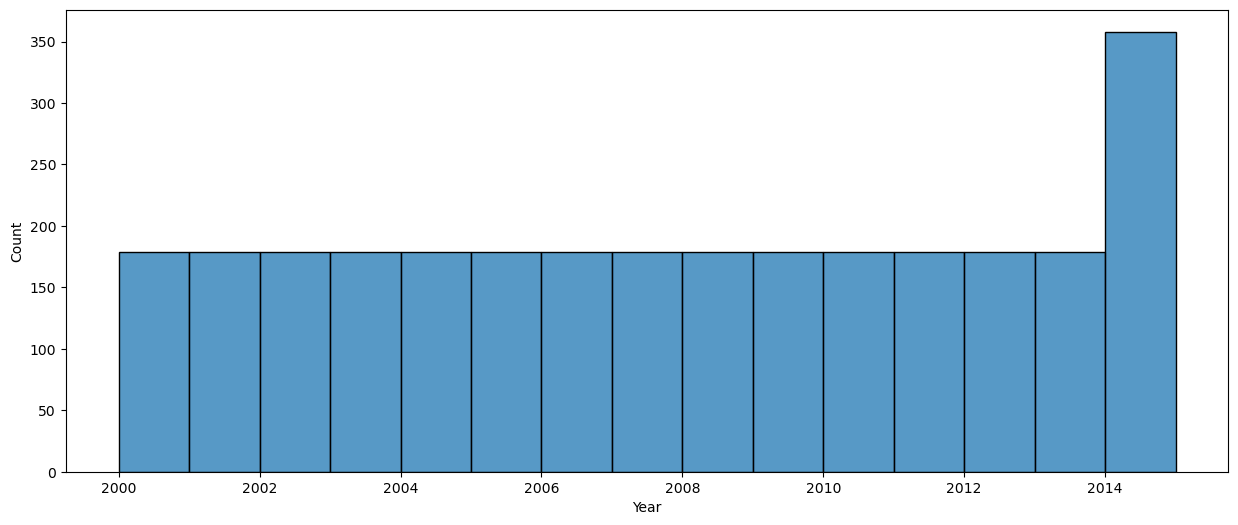

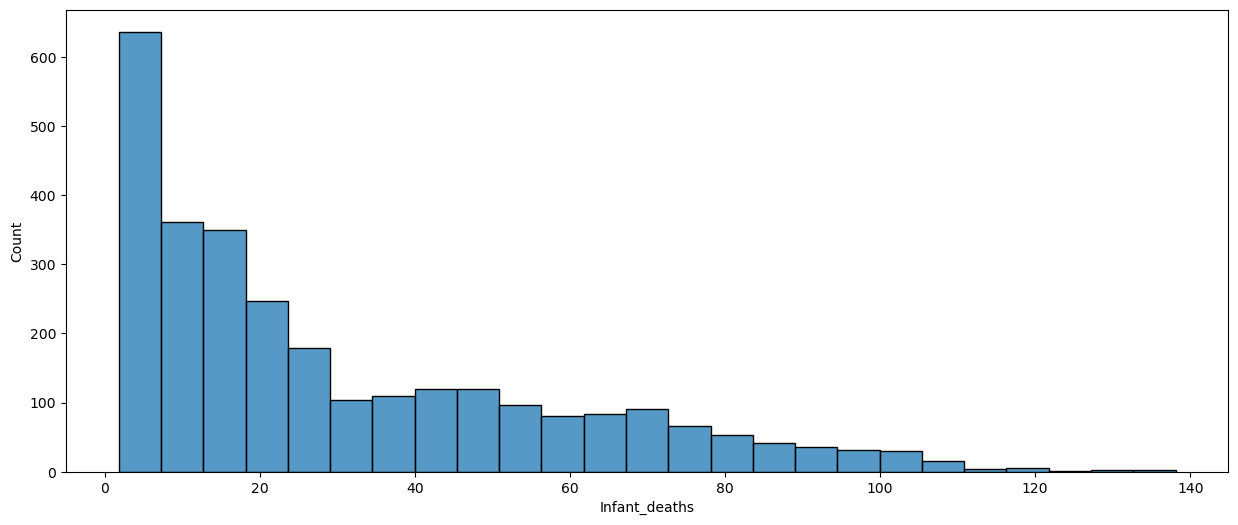

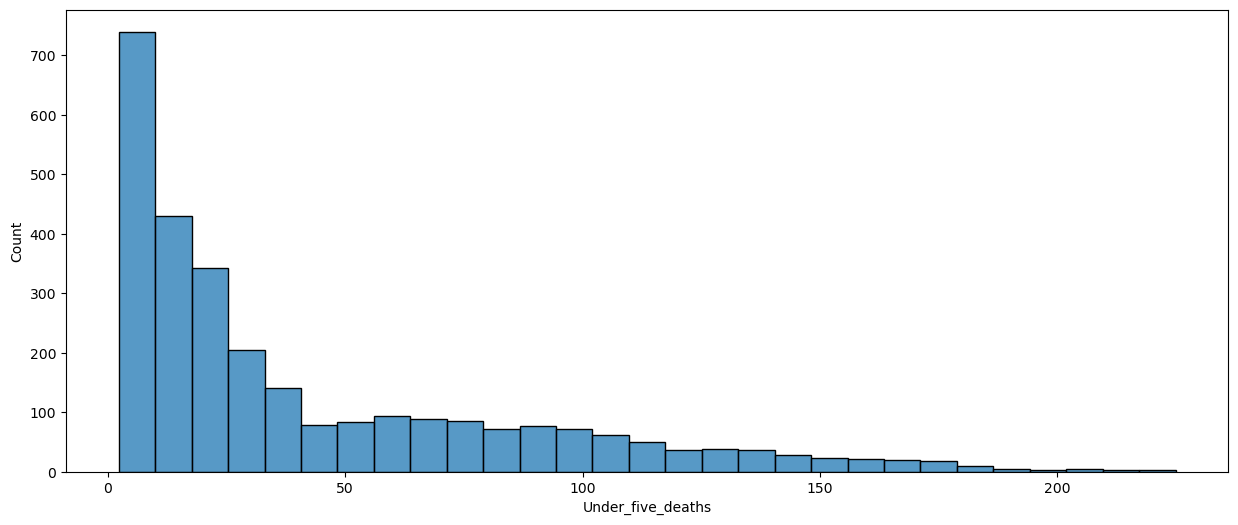

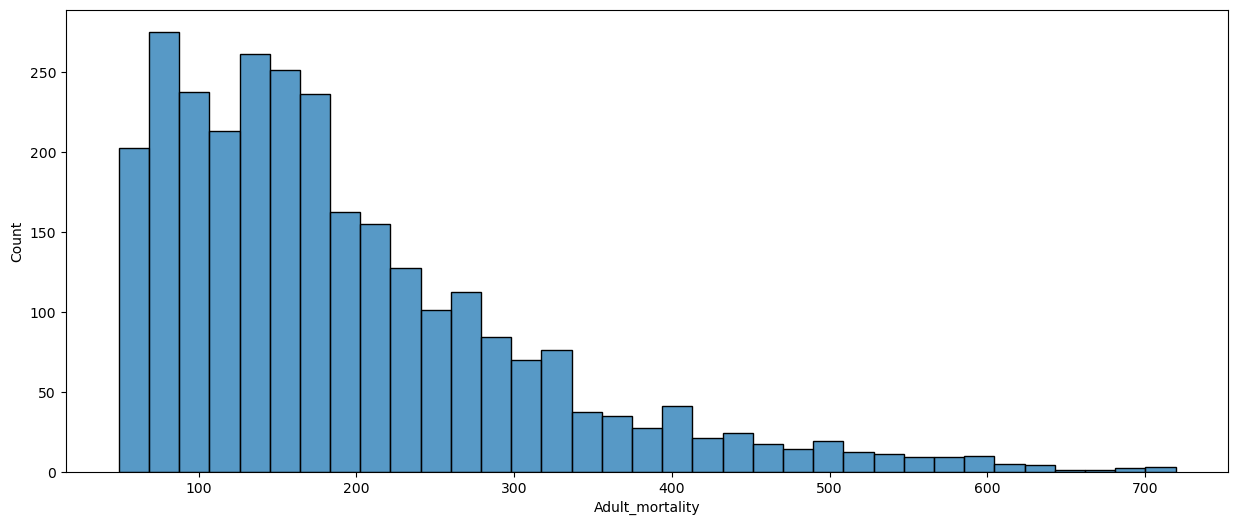

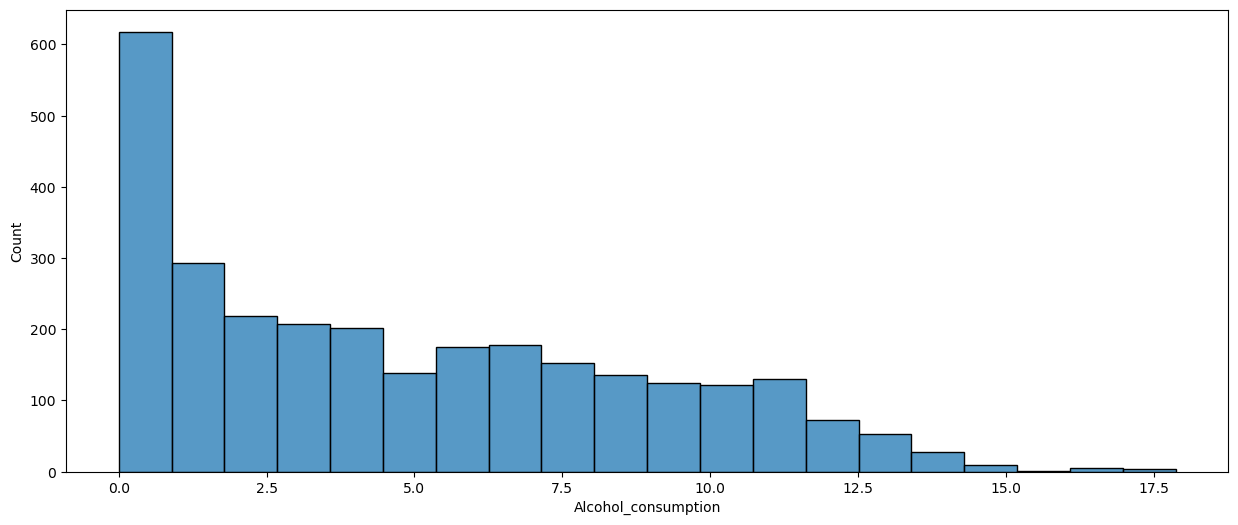

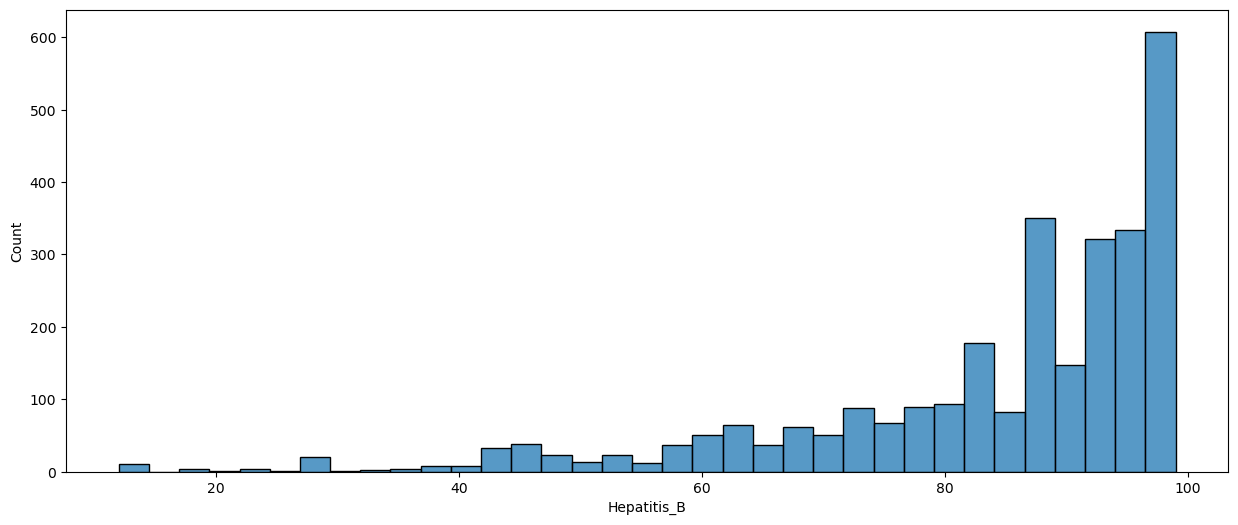

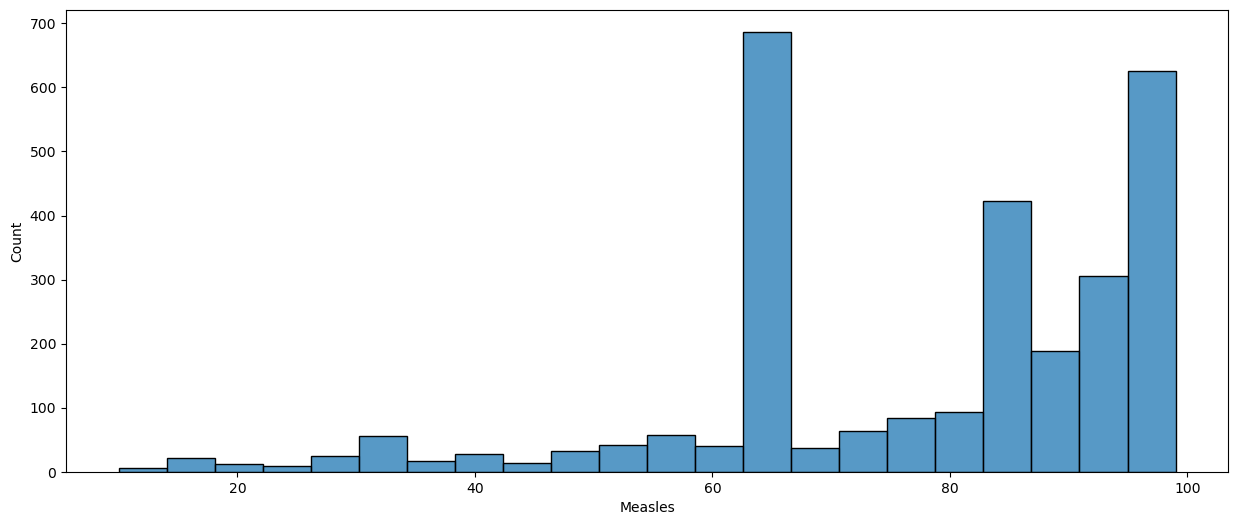

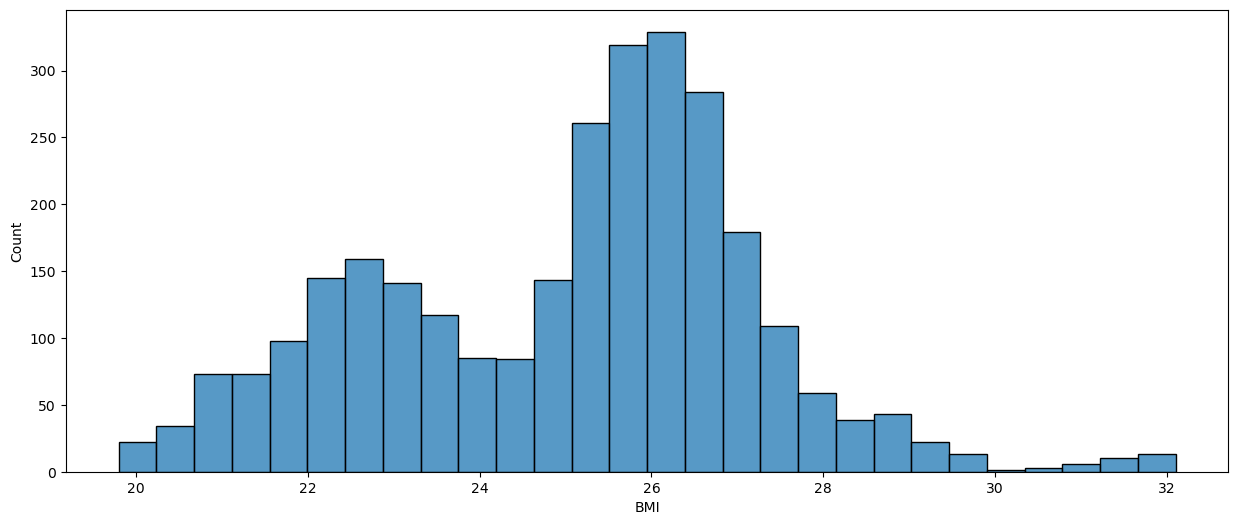

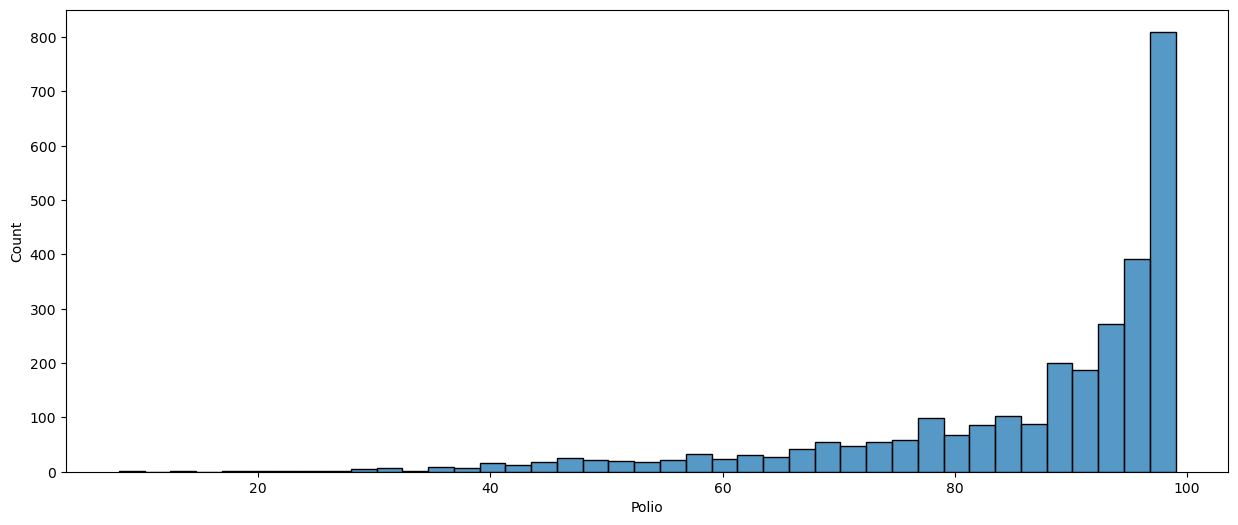

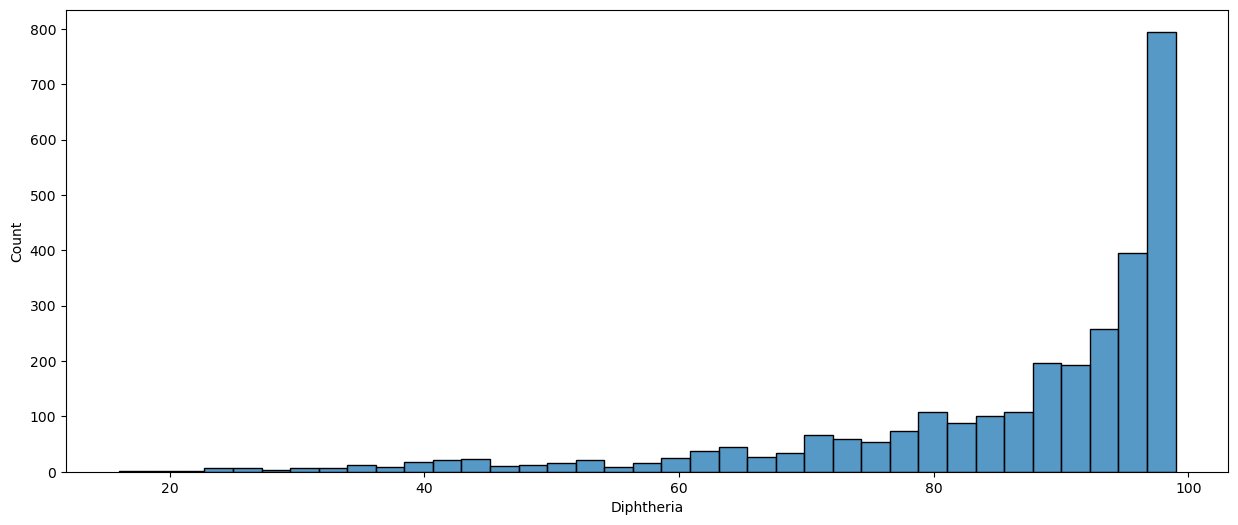

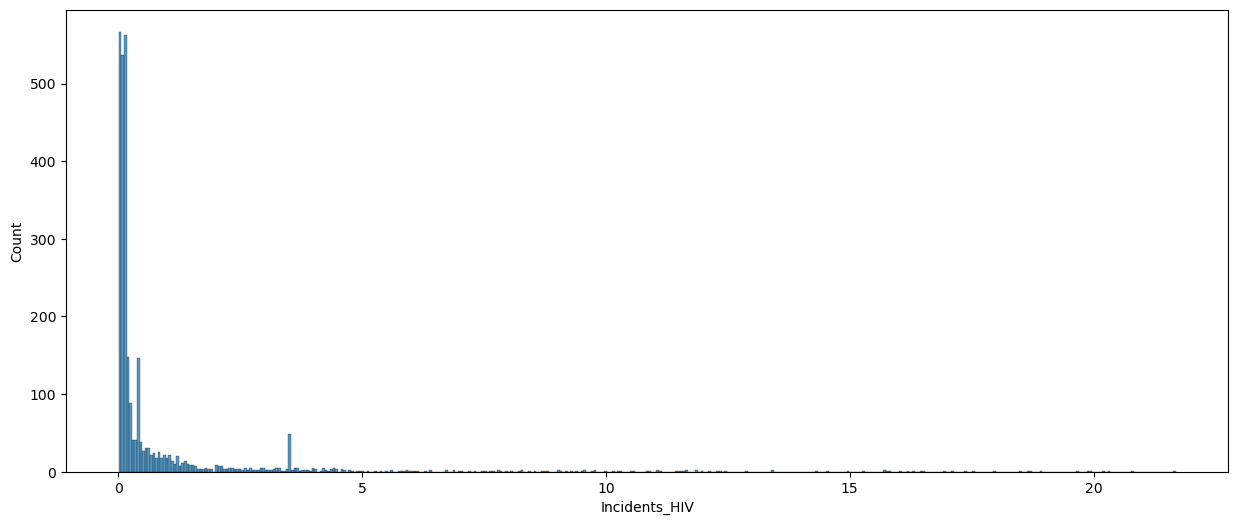

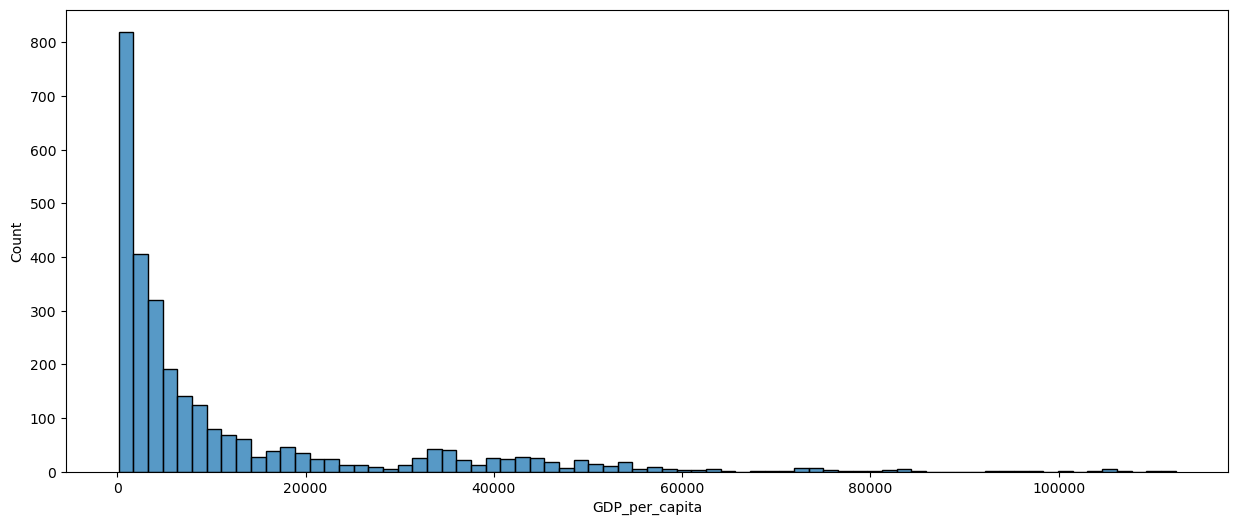

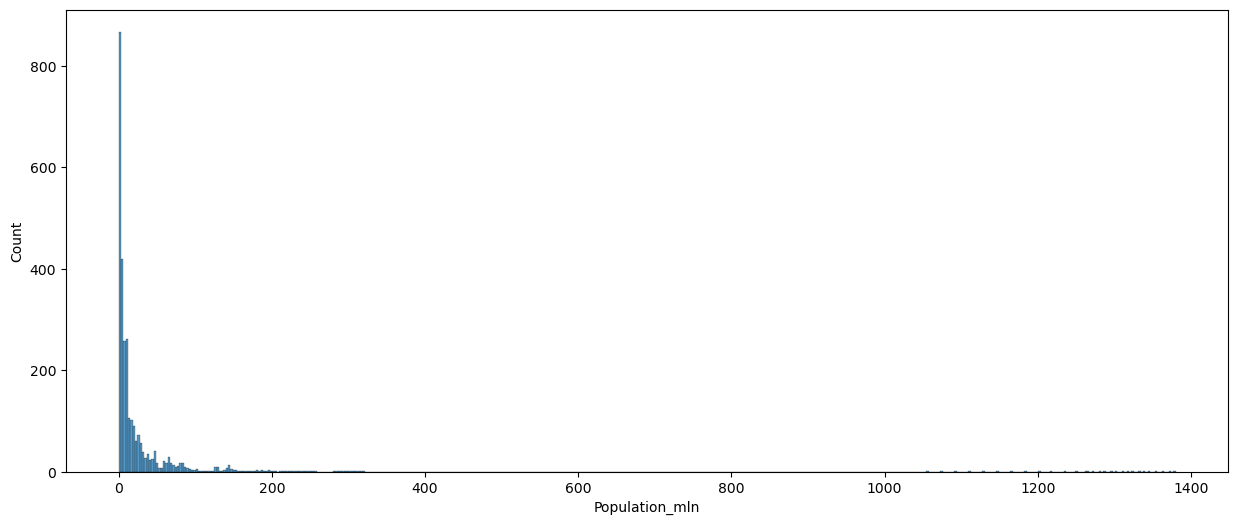

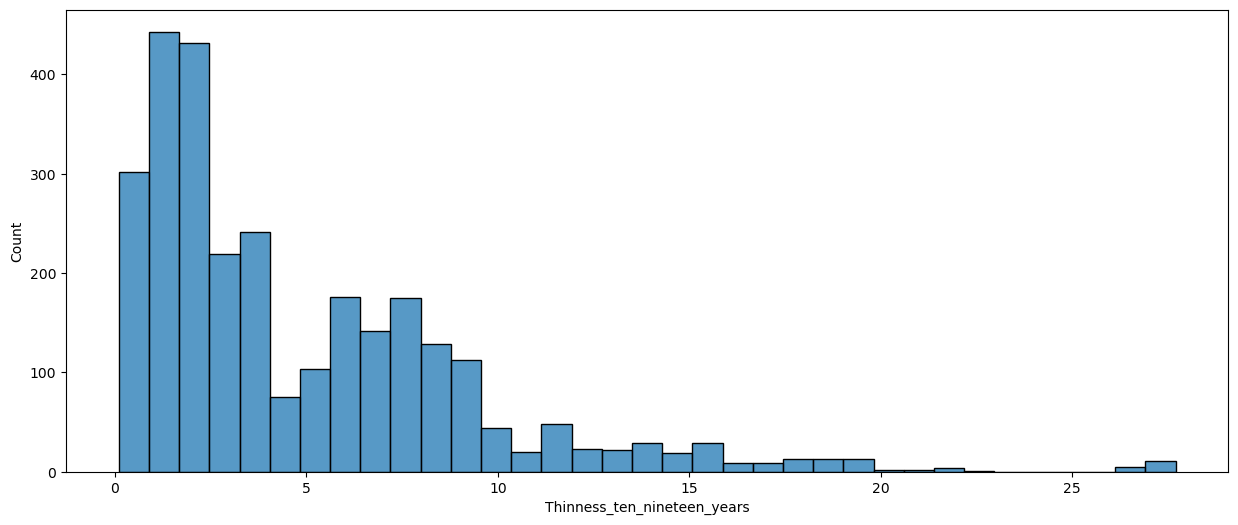

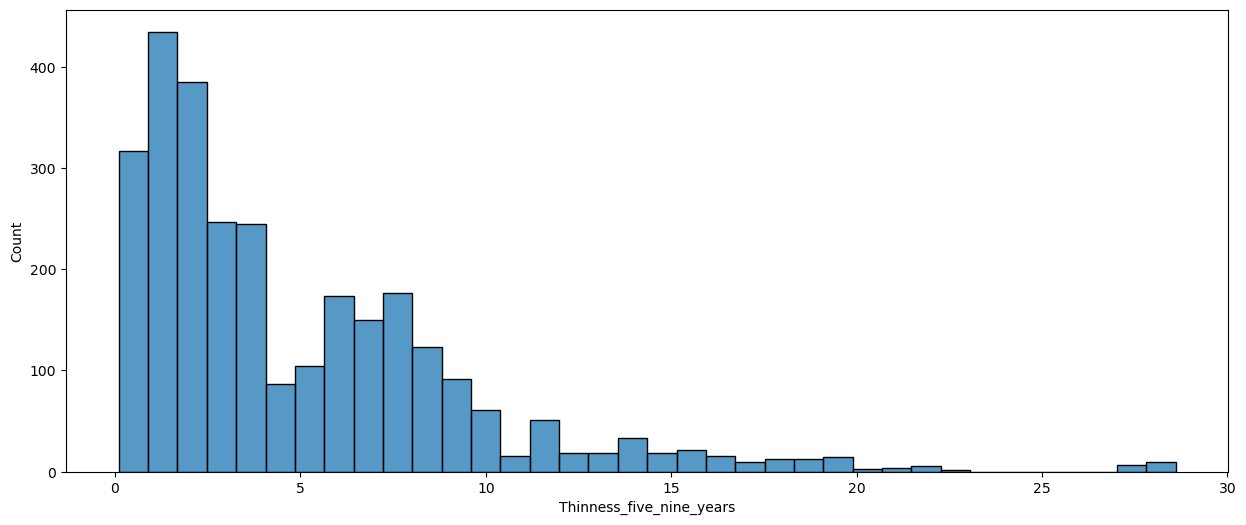

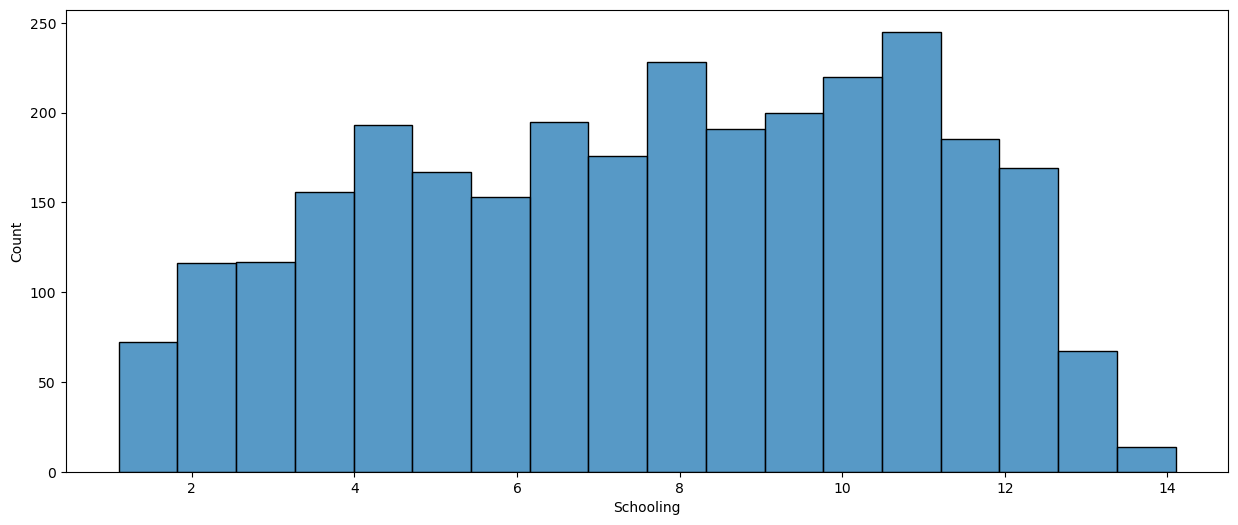

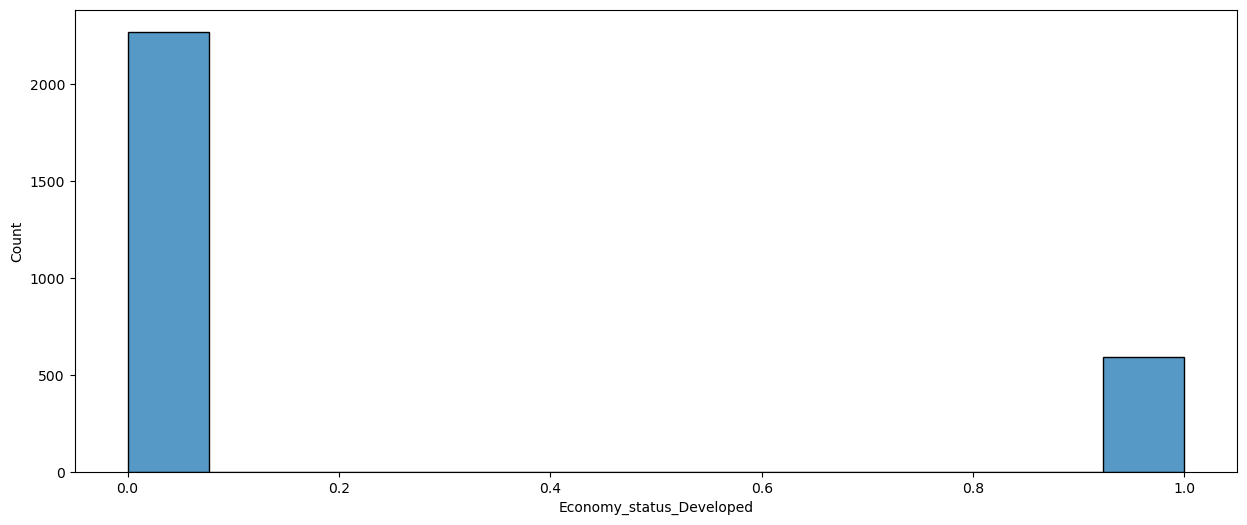

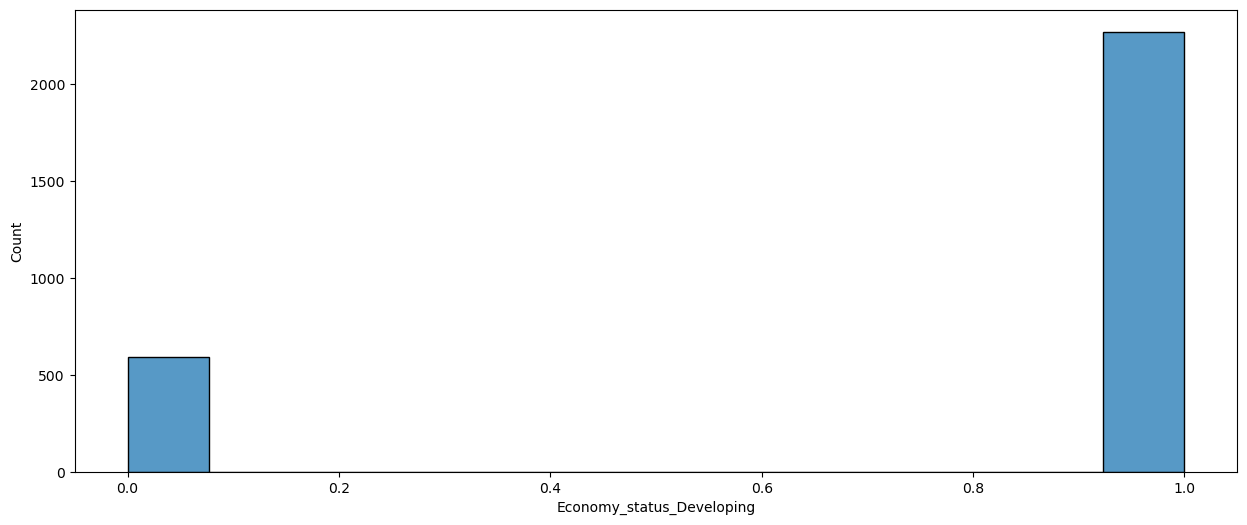

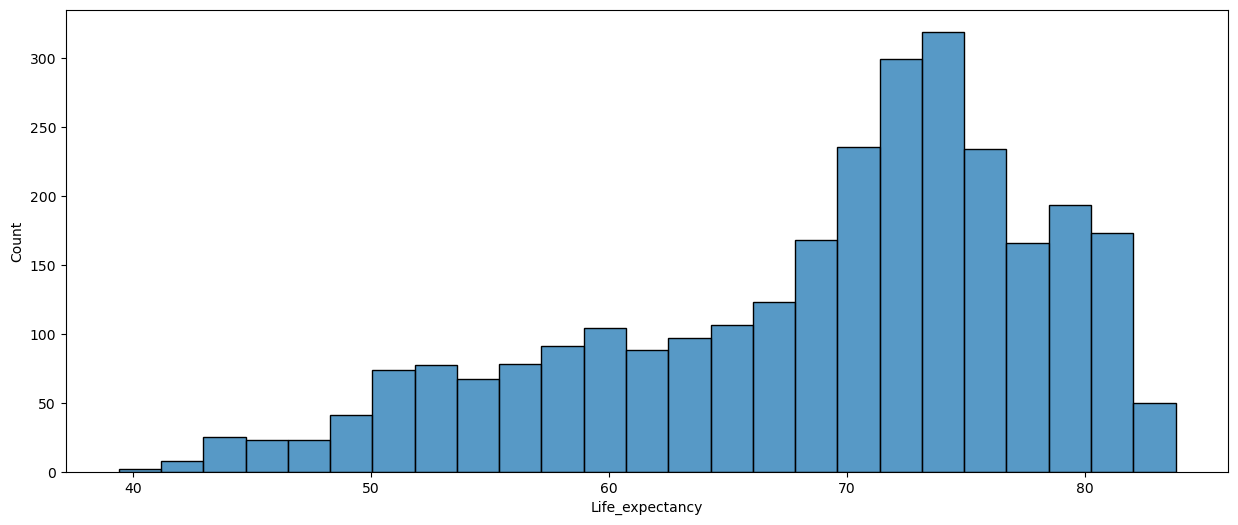

In [390]:
for i in data.select_dtypes(include="number").columns:#loop about the column not a range
  #sns.histplot(data[i])
  plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visibility
  sns.histplot(data[i], stat="count")

  plt.show()

 Some data has severe skewnees and in order to use the model its better to have normal distirbuted data and then we standarize all the features 

**but let's first explore by correaltion the more important factors that would be taken in consideration**


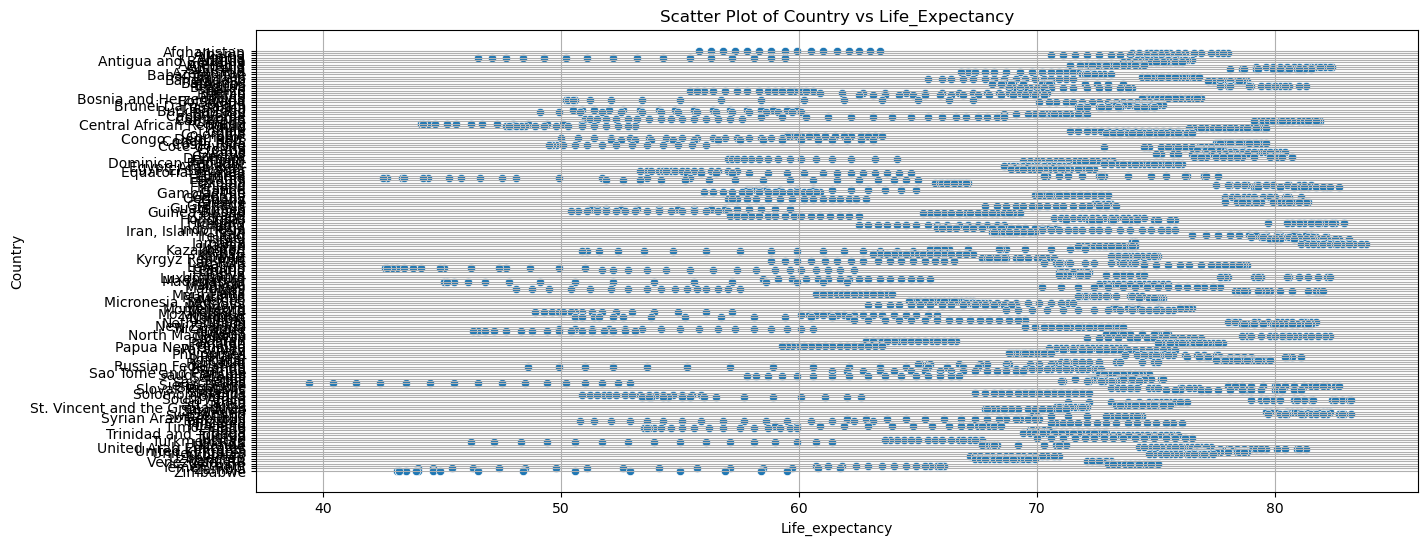

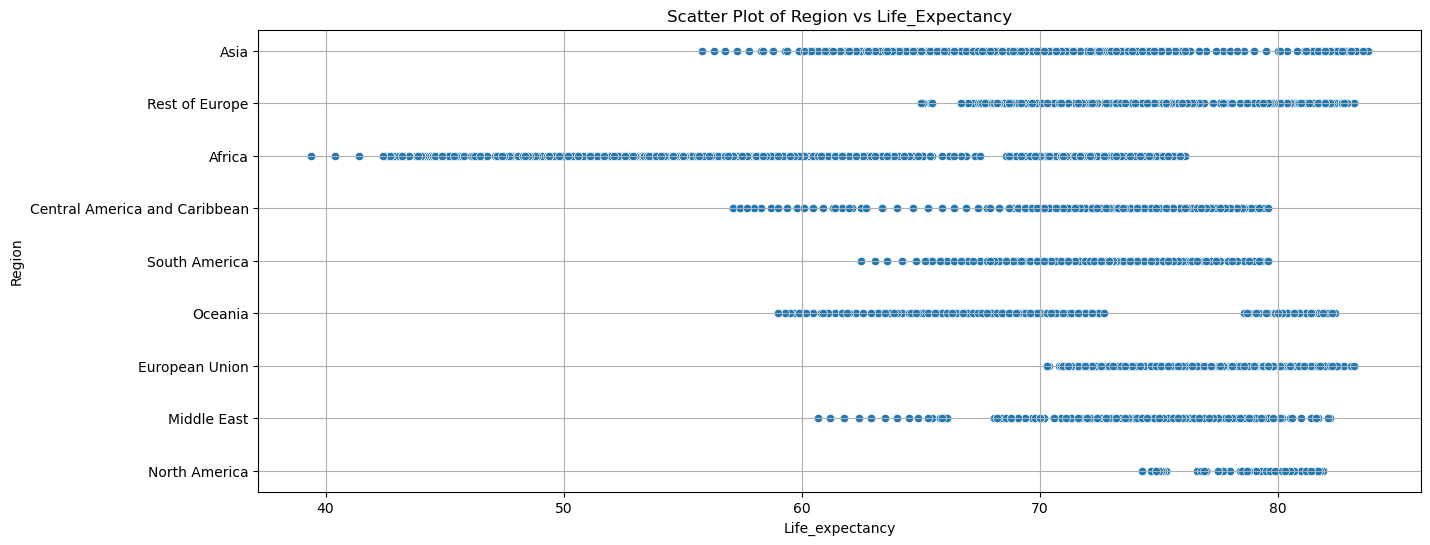

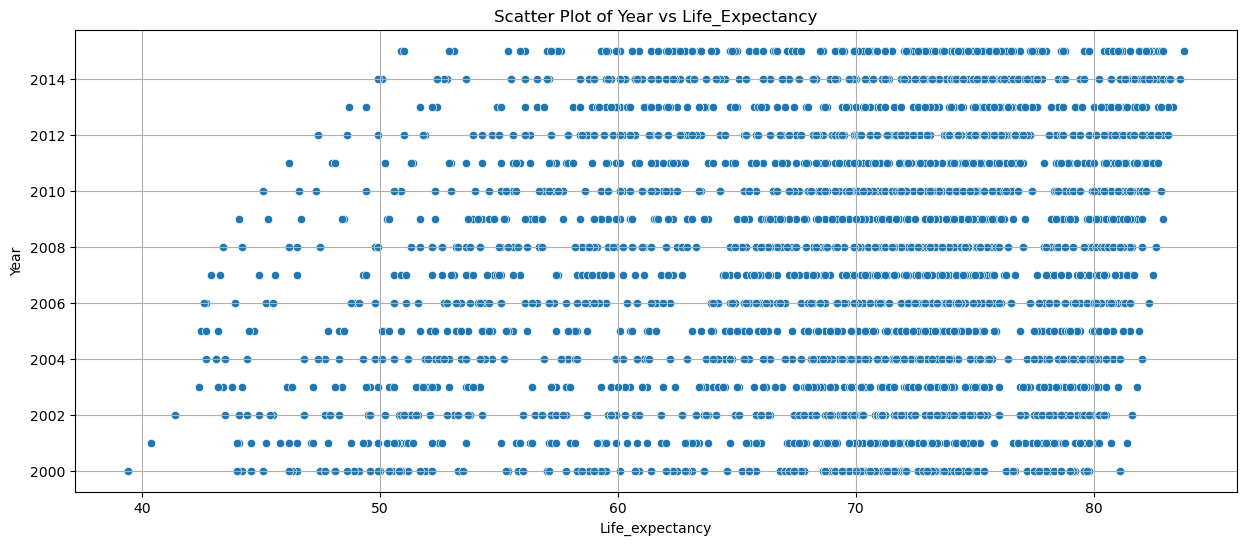

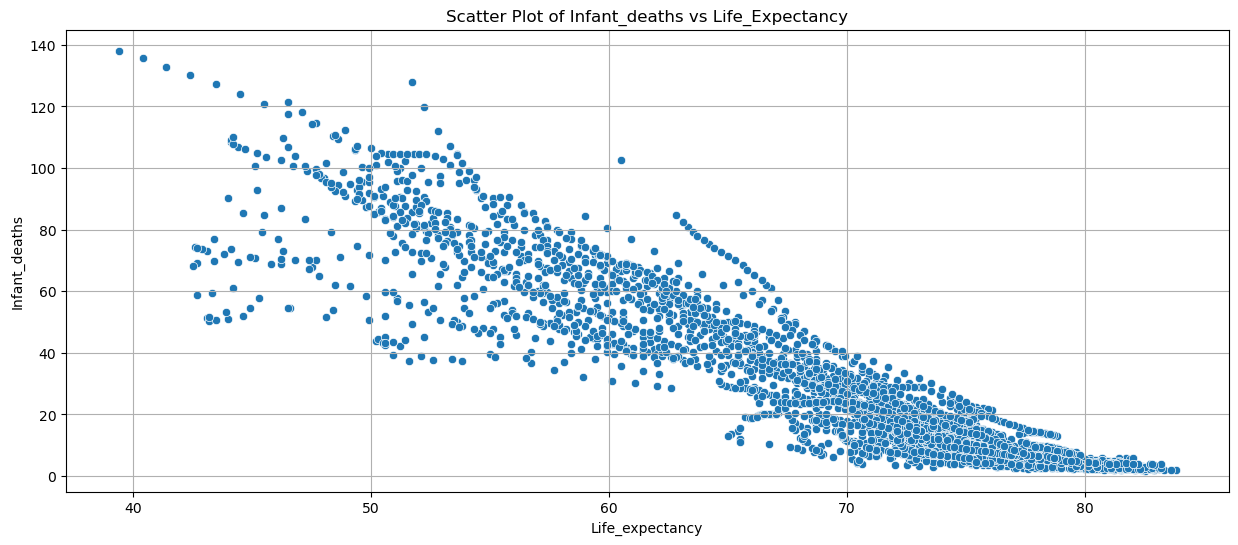

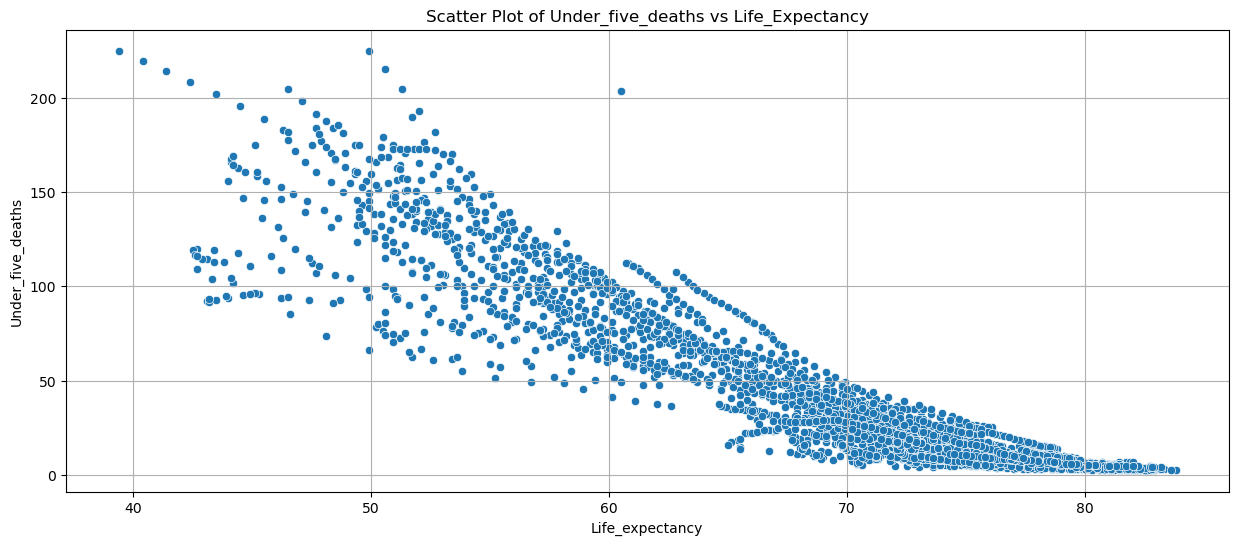

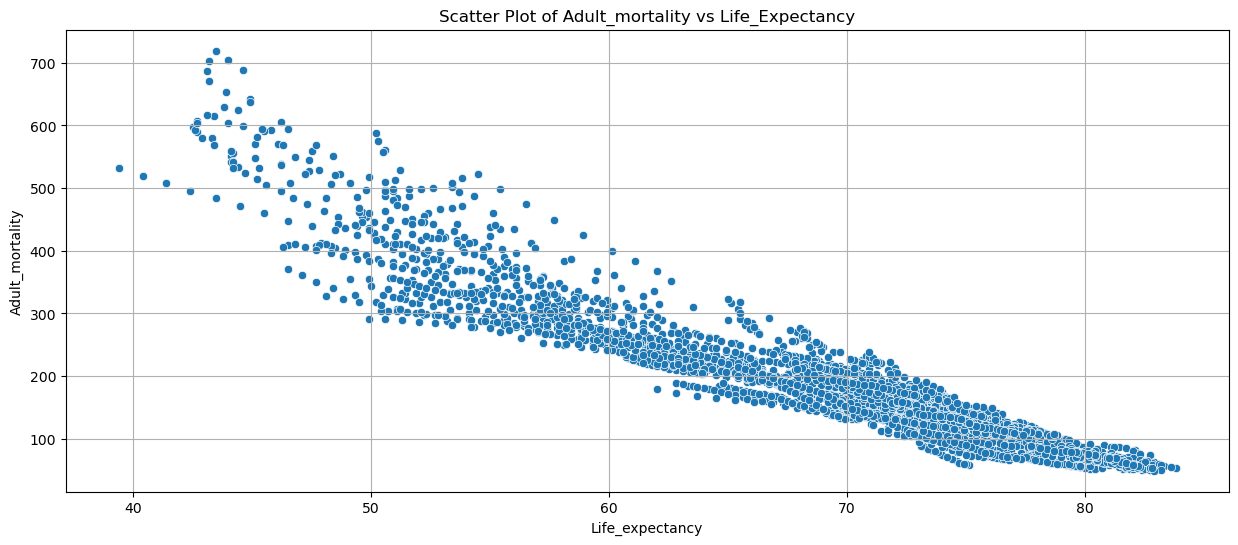

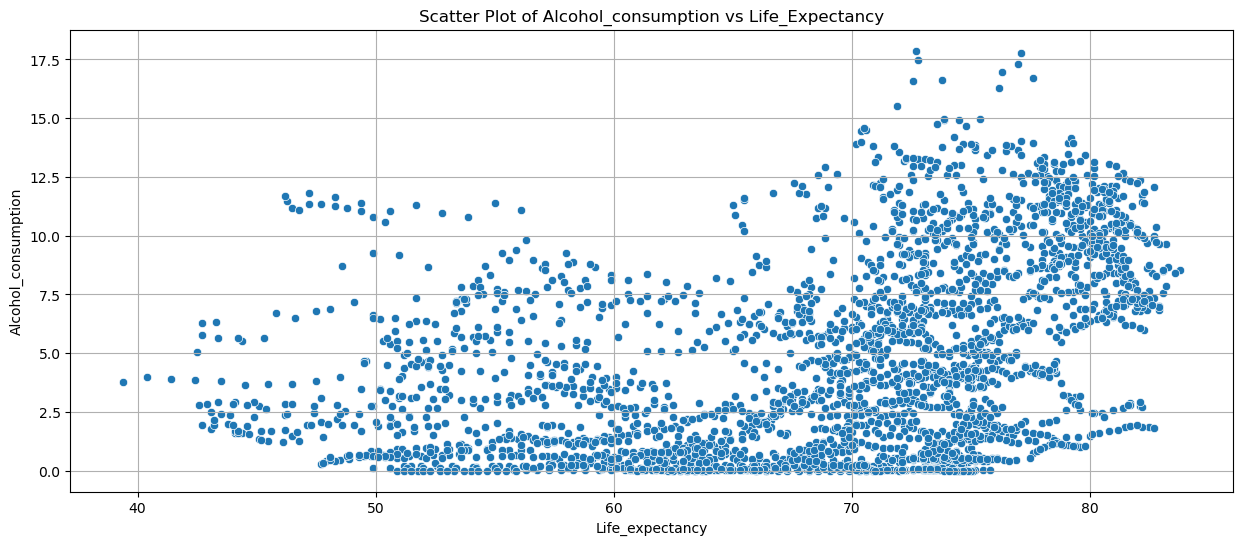

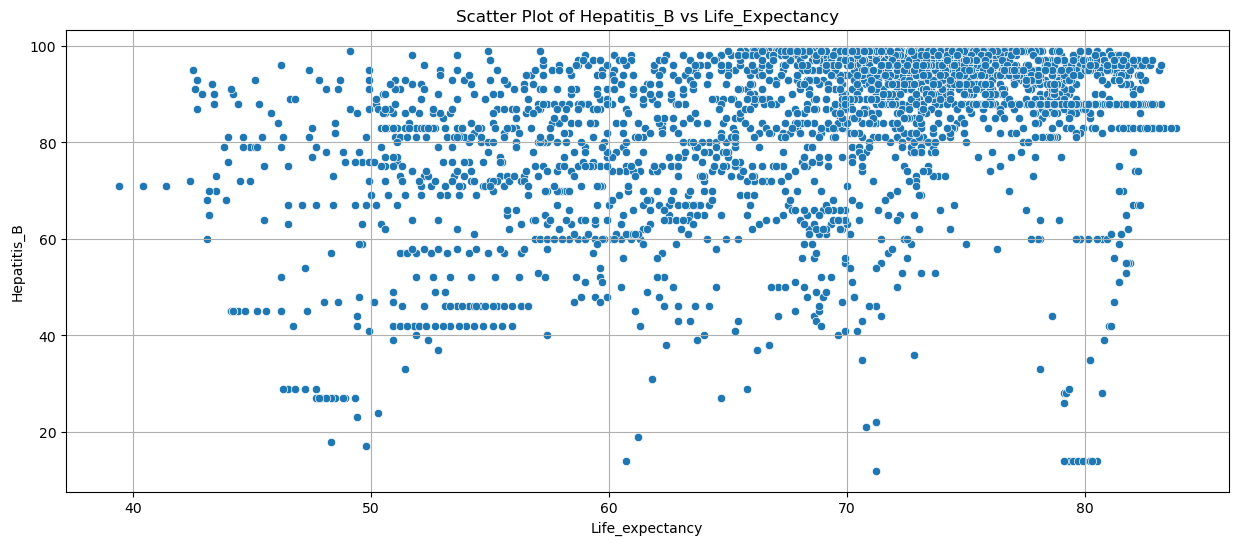

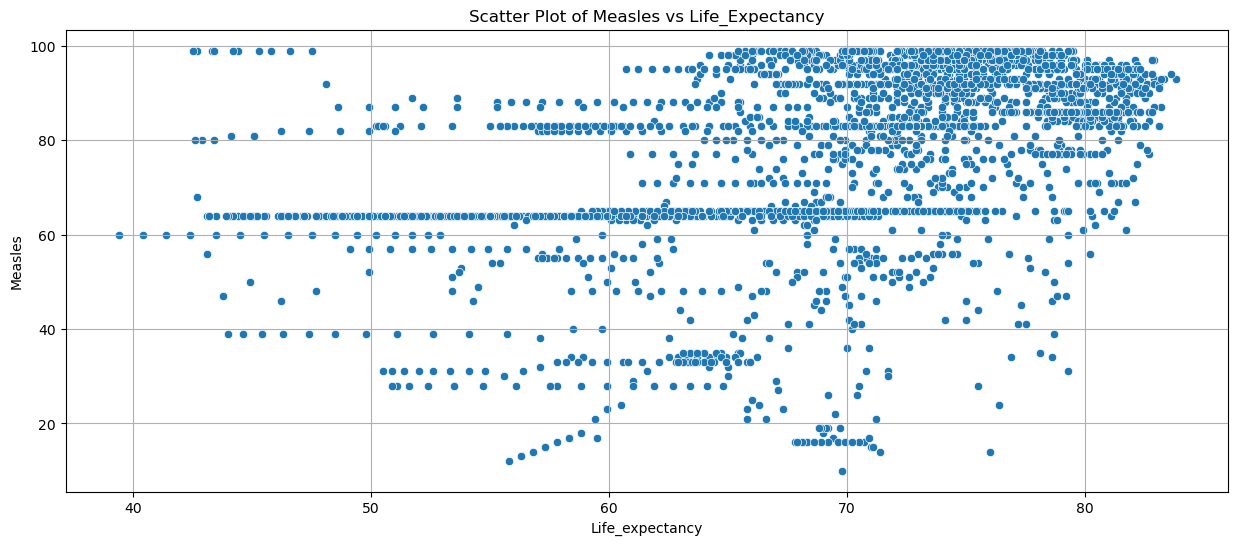

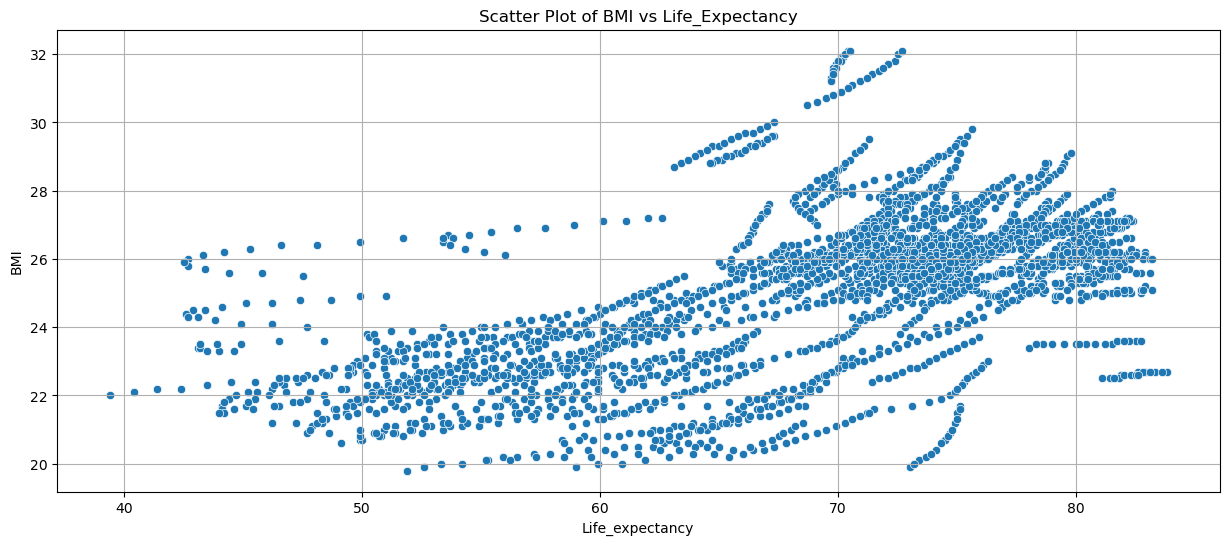

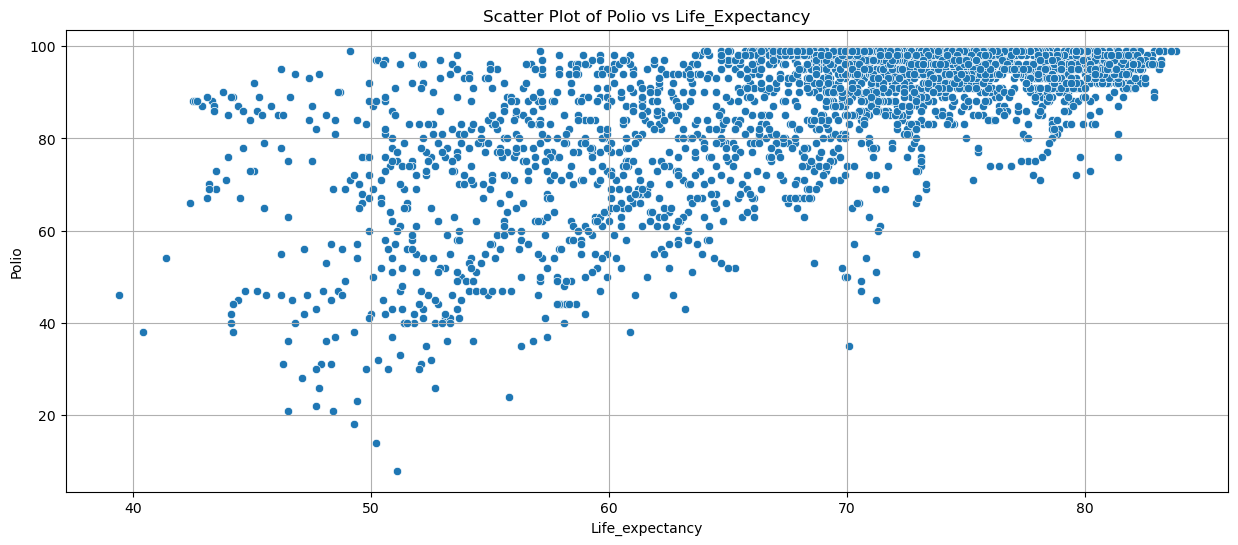

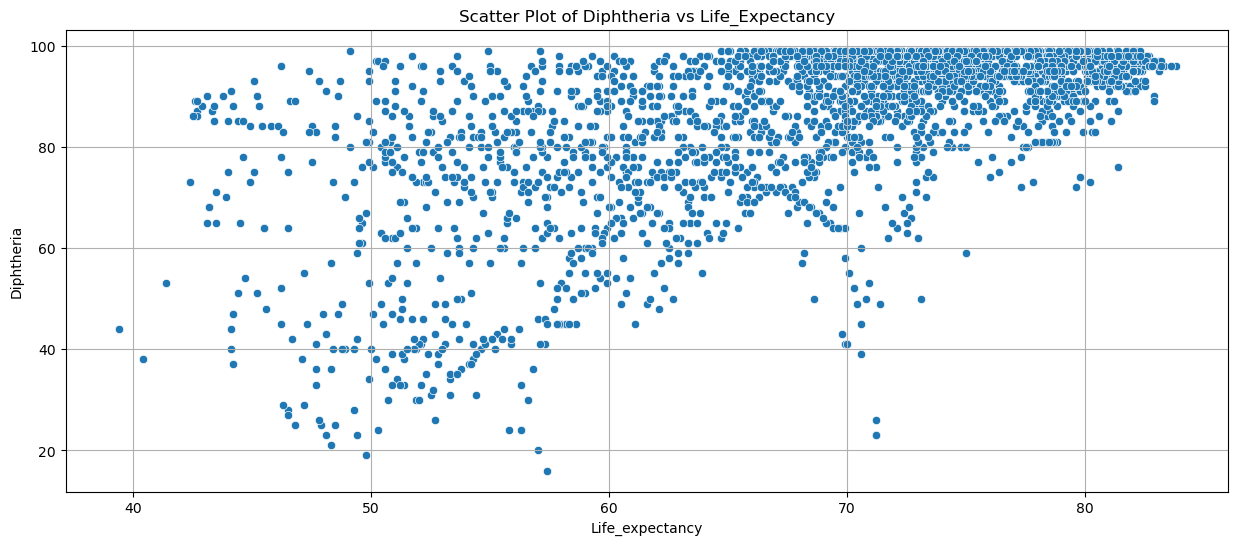

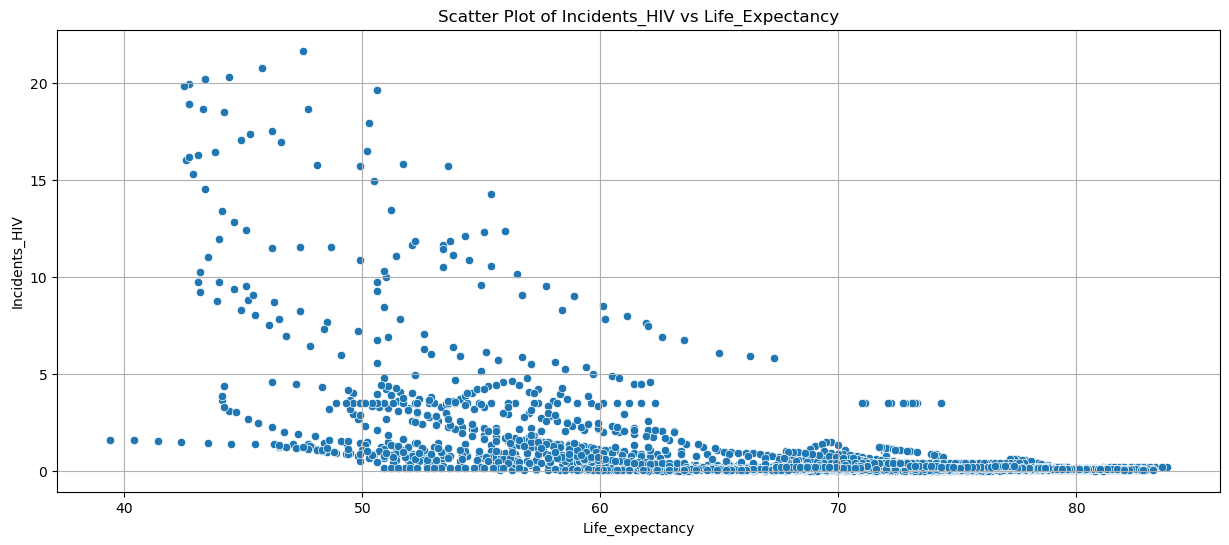

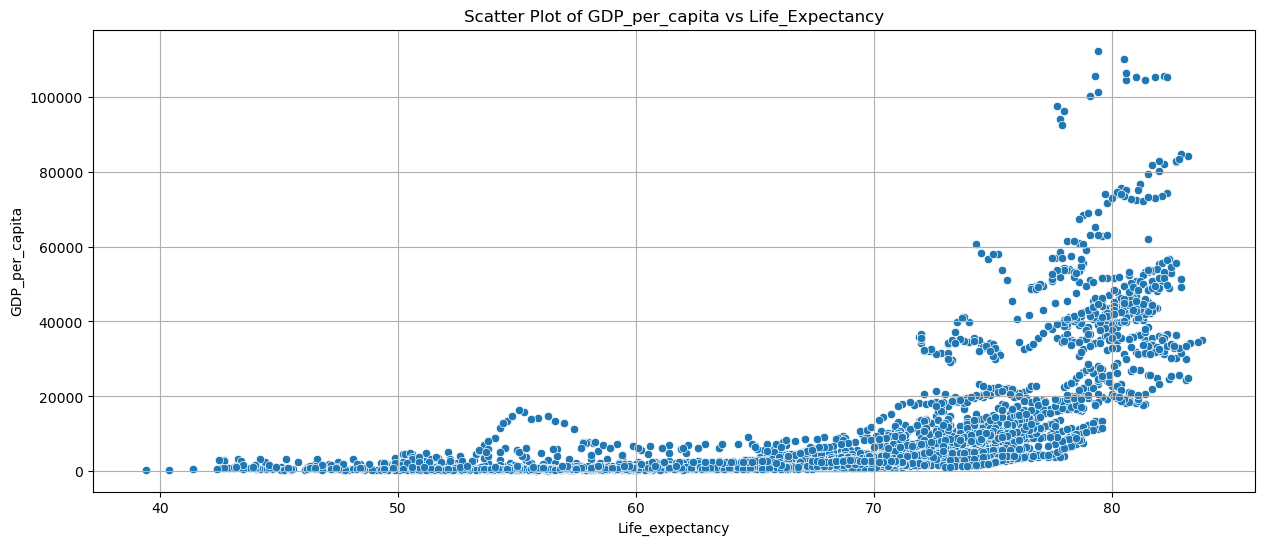

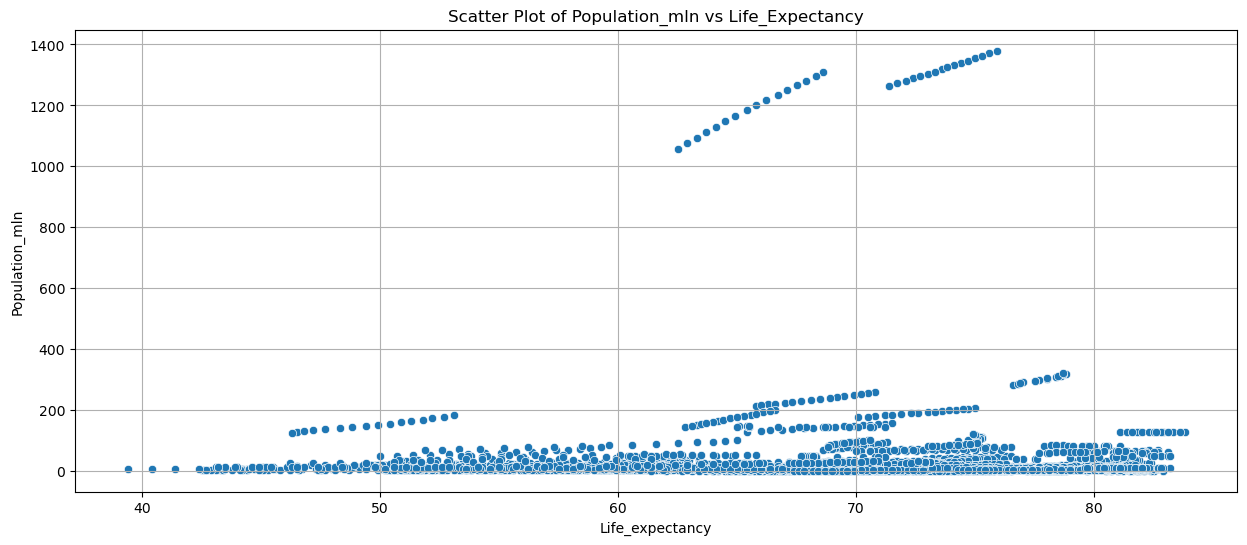

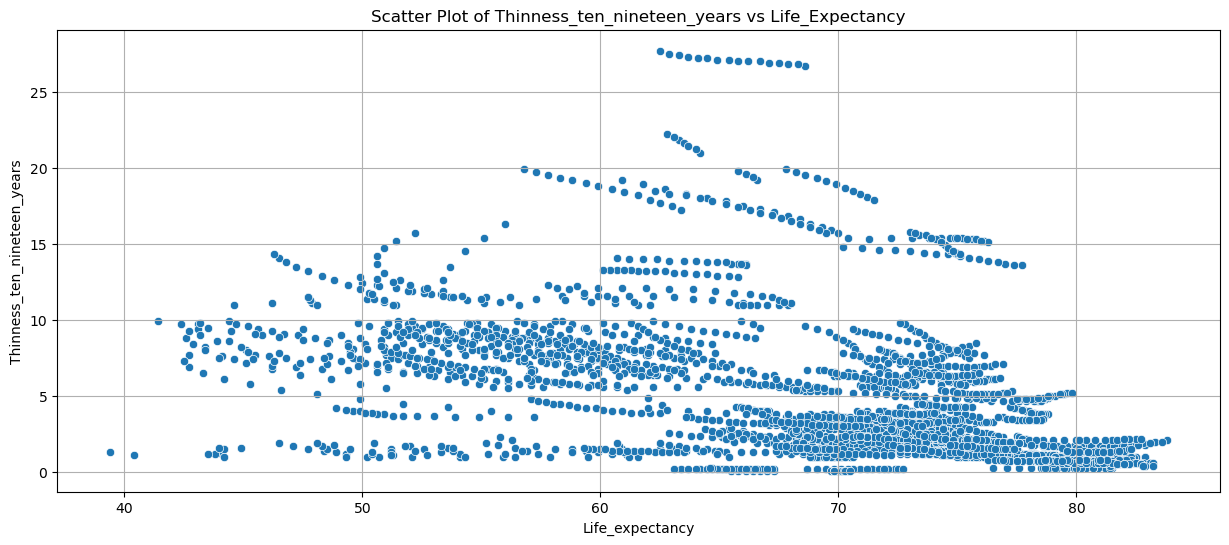

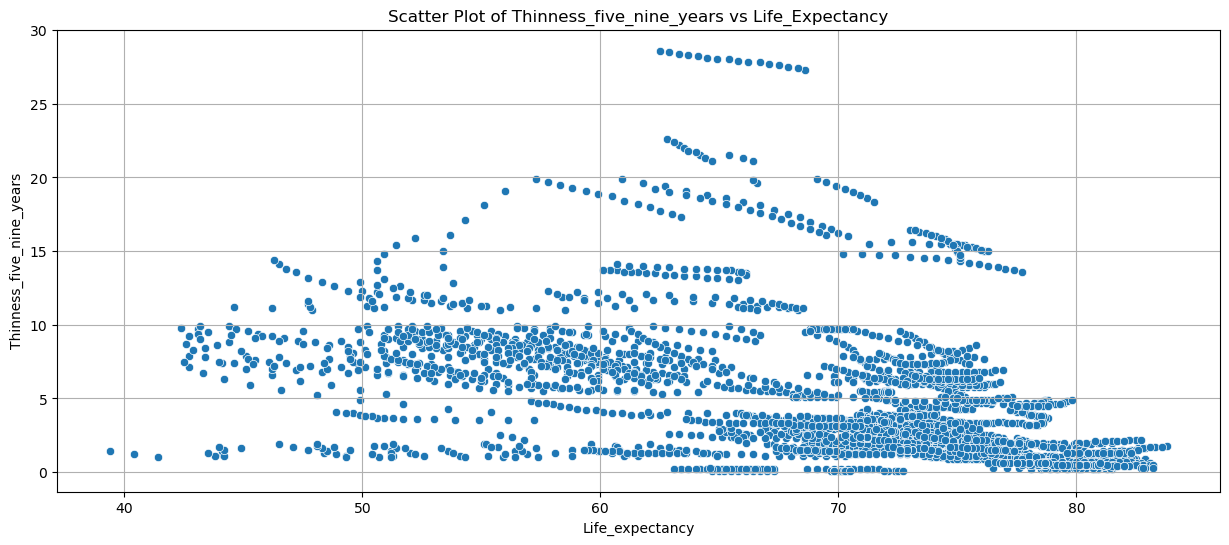

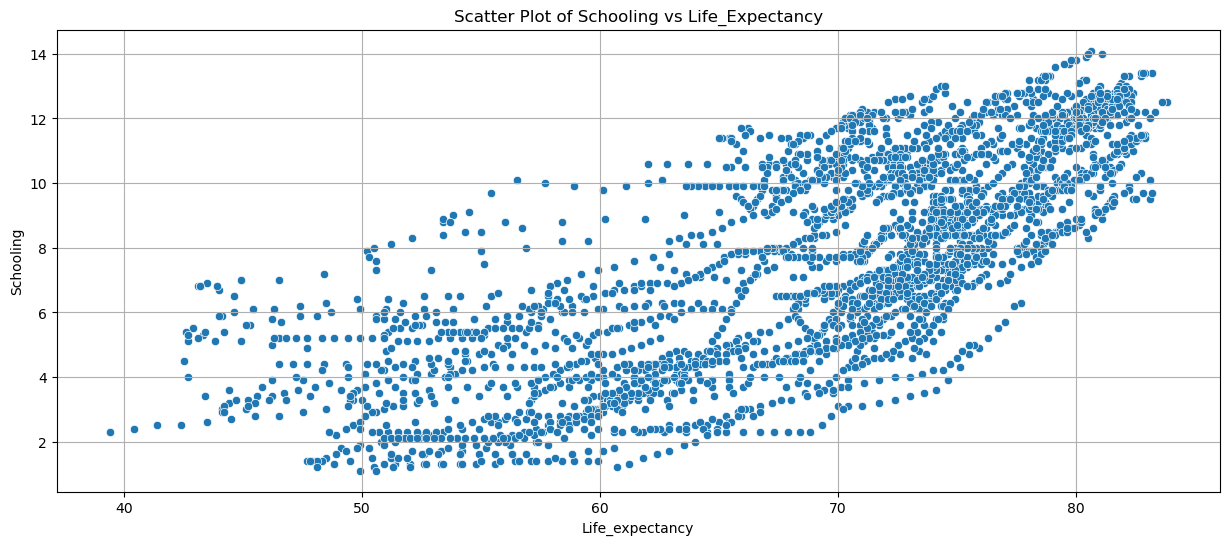

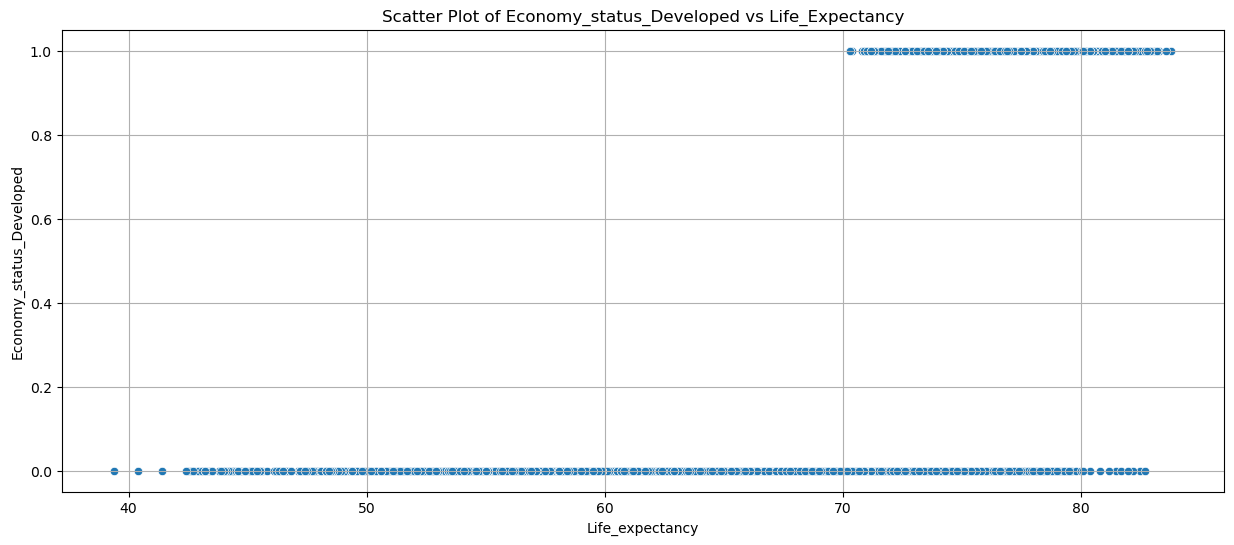

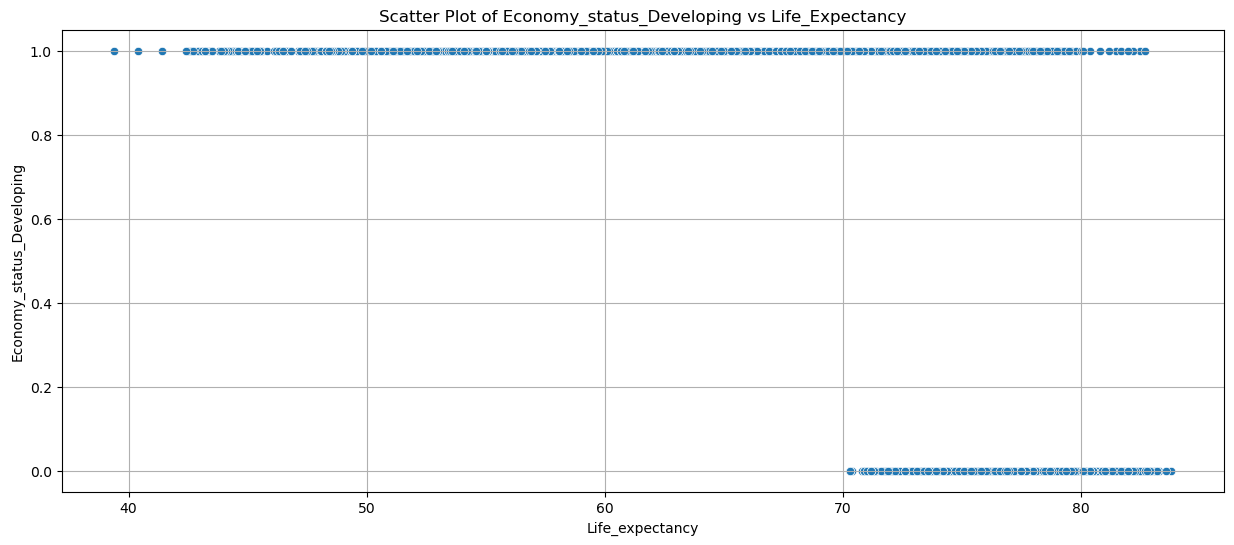

In [391]:
#target variable is Life expectancy so we are gonna scatter each one to it to see the relation between each one and the output
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
for column in data.columns:
    if column != 'Life_expectancy':  # Skip the target variable itself
        plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visibility
        sns.scatterplot(data=data, x='Life_expectancy', y=column)
        plt.title(f'Scatter Plot of {column} vs Life_Expectancy')
        plt.xlabel('Life_expectancy')
        plt.ylabel(column)
        plt.grid(True)  # Optional: Add grid for better readability
        plt.show()

        plt.show()

Year                           0.174359
Infant_deaths                 -0.920032
Under_five_deaths             -0.920419
Adult_mortality               -0.945360
Alcohol_consumption            0.399156
Hepatitis_B                    0.417804
Measles                        0.490019
BMI                            0.598423
Polio                          0.641217
Diphtheria                     0.627541
Incidents_HIV                 -0.553027
GDP_per_capita                 0.583090
Population_mln                 0.026298
Thinness_ten_nineteen_years   -0.467824
Thinness_five_nine_years      -0.458166
Schooling                      0.732484
Economy_status_Developed       0.523791
Economy_status_Developing     -0.523791
Life_expectancy                1.000000
dtype: float64


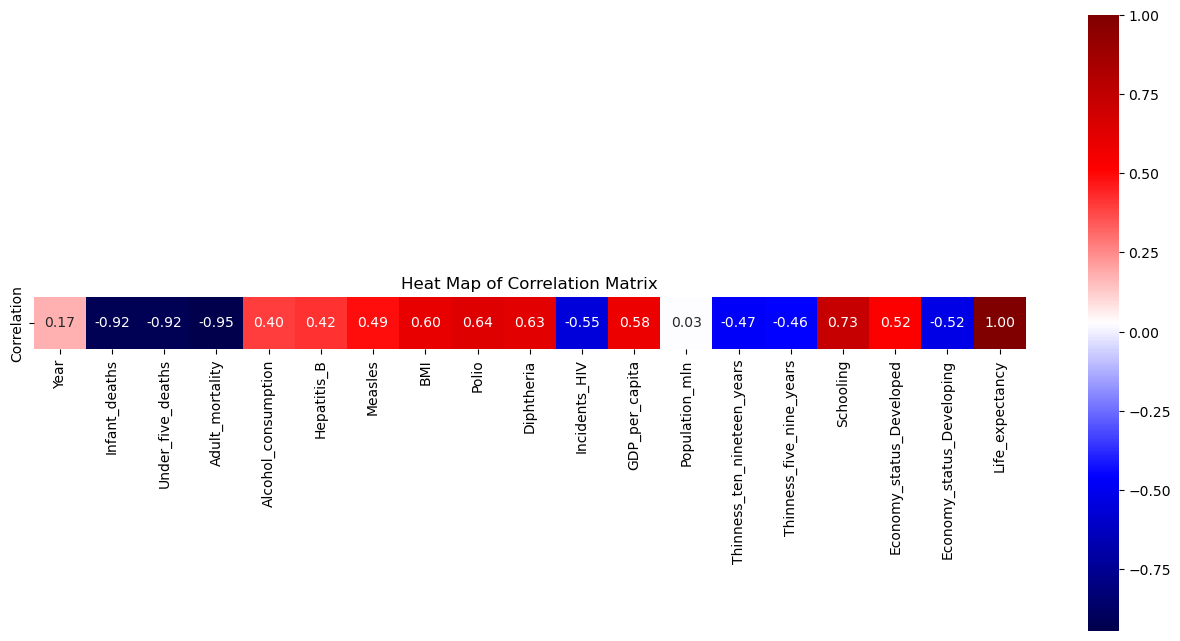

In [392]:
#interpreting the effect of various factors on life expected range
numeric_data = dataa.select_dtypes(include='number')
corr=numeric_data.corrwith(numeric_data['Life_expectancy'])# return series not a data frame
corr_df = corr.to_frame(name='Correlation').T 
print (corr)
plt.figure(figsize=(16, 8))
sns.heatmap(corr_df, annot=True, cmap='seismic', fmt='.2f', square=True)
plt.title('Heat Map of Correlation Matrix')
plt.show()

# Correlations
## Immunization wise

Hepataitis

diphteria 

Polio


**increases age range** 

## death of infants wise
infant death

under five death 

measles that could also lead to death

**also increase age range by decreasing people of smaller ages**

## Economical Wise
developed country **increases average death age range**

developing country **decreases average age range**

GPP per capita  **increases age range**

Schooling **increase age range**

## Some Health factors:

HIV  **decreases age range**

more thinness then less nutrition and health so on differet  **age range decreases**

Body mass index  better nutriotion so  **age range increases**

## Drops

**year  has very low effects on life expectancy so can be removed**

**population  has very low effects on life expectancy so can be removed  as most of the data are given in rates so it won't differ ahving the population as rates already calculated via population** 


# **steps**
## 1-remove lowest correlations and focus on important features
## 2- View and Transformation to get normal distiributions
When data is realistically skewed, it reflects true underlying distributions in the real world. However, transforming skewed data can still improve model performance for several reasons
## 3-Standarization 
## 4-Anomaly Detection
## 5-Model for predection

# **1-Remove lowest correlations and focus on important features**

**we now have two options either to one hot encode countries and regions and consider them as factors or to just remove them so not to introduce too many variaples for the model**

In [393]:
dataa = dataa.drop(columns=['Population_mln', 'Year'])
dataa=  dataa.drop(columns=['Country', 'Region'])


# **2- View and Transformation to get normal distiributions**

<Axes: xlabel='Diphtheria', ylabel='Count'>

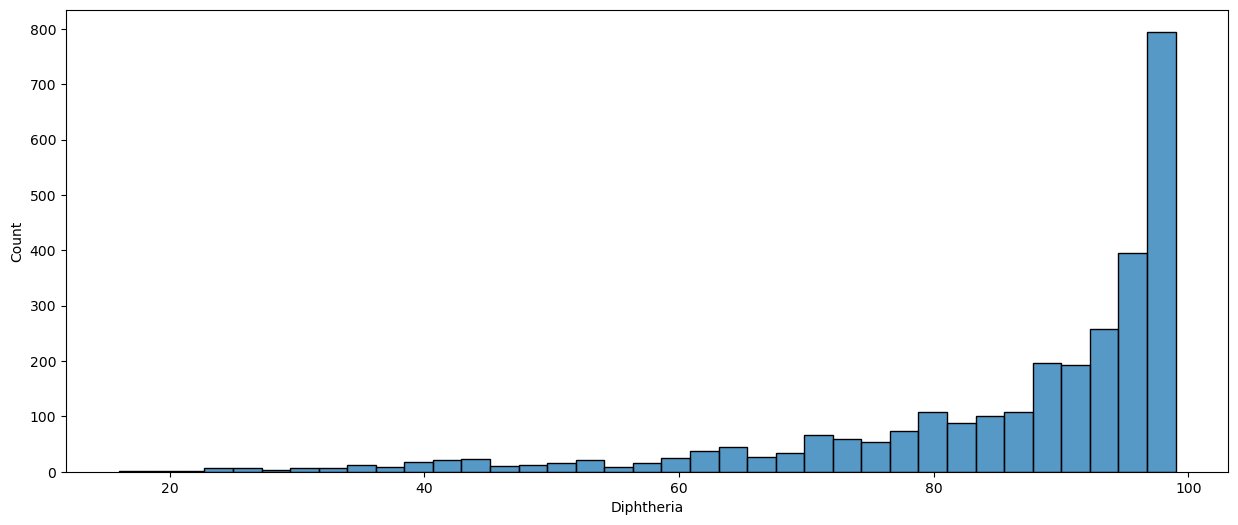

In [394]:
plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visibility
sns.histplot(data['Diphtheria'], stat="count")


## **Transformation using boxcox in stats** 

**Box Cox**

\[
For \( y > 0 \):
\begin{cases}
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\log(y) & \text{if } \lambda = 0
\end{cases}
\]

The  log-likelihood can be expressed as:

\[
\begin{cases}
LL = -n \left( \log(2\pi) + \log(\sigma^2) + \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 \right)
\end{cases}
\]

0       7.828625e+05
1       7.180258e+07
2       8.351956e+07
3       8.351956e+07
4       5.226843e+07
            ...     
2859    1.279626e+08
2860    1.369031e+08
2861    1.114665e+08
2862    1.562623e+08
2863    4.014516e+08
Name: Diphtheria, Length: 2864, dtype: float64
Optimal lambda: 4.761153651473844
Log-Likelihood of transformed data: -4158727.9697847595


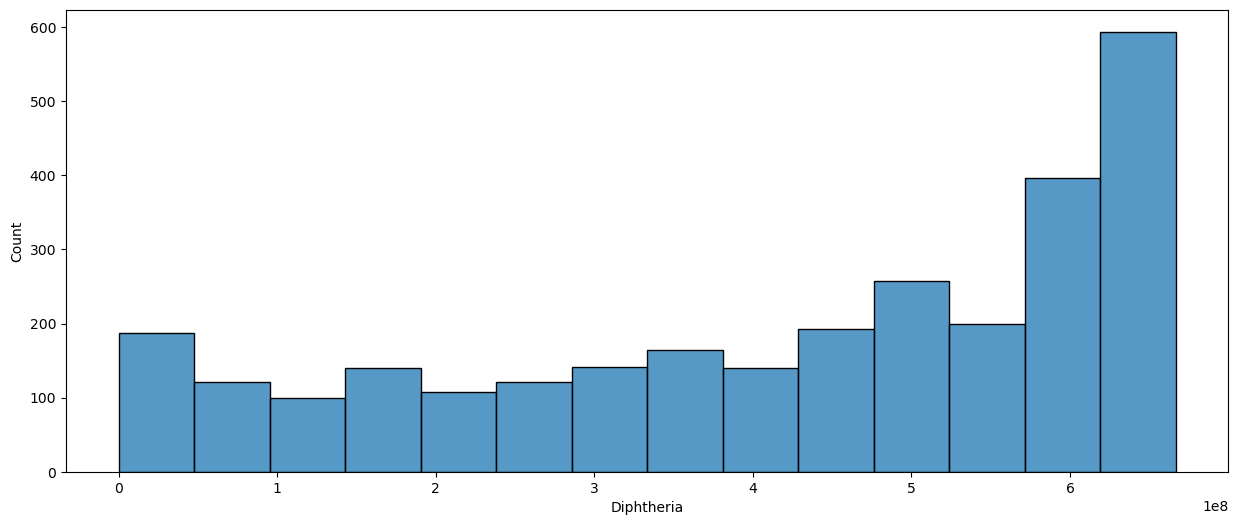

In [395]:
from scipy import stats

# Convert to NumPy array and apply Box-Cox transformation
# Ensure all values are positive
original=dataa['Diphtheria']
transformed_values, lambda_value = stats.boxcox(dataa['Diphtheria'].to_numpy())

# Add transformed values back to the DataFrame
dataa['Diphtheria'] = transformed_values #updated

print(dataa['Diphtheria'])
plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visibility
sns.histplot(dataa['Diphtheria'], stat="count")
def log_likelihood(data, lambda_value):
    n = len(data)
    mean = np.mean(data)
    variance = np.var(data)
    log_likelihood_value= -0.5 * (np.log(2 * np.pi * variance) + (1 / variance) * np.sum((data - mean) ** 2))*n
    return log_likelihood_value

# Calculate log-likelihood for transformed data
print(f'Optimal lambda: {lambda_value}')
#lambda_value=-2.485541820526123
ll_value = log_likelihood(dataa['Diphtheria'].dropna().to_numpy(), lambda_value)
print(f'Log-Likelihood of transformed data: {ll_value}')

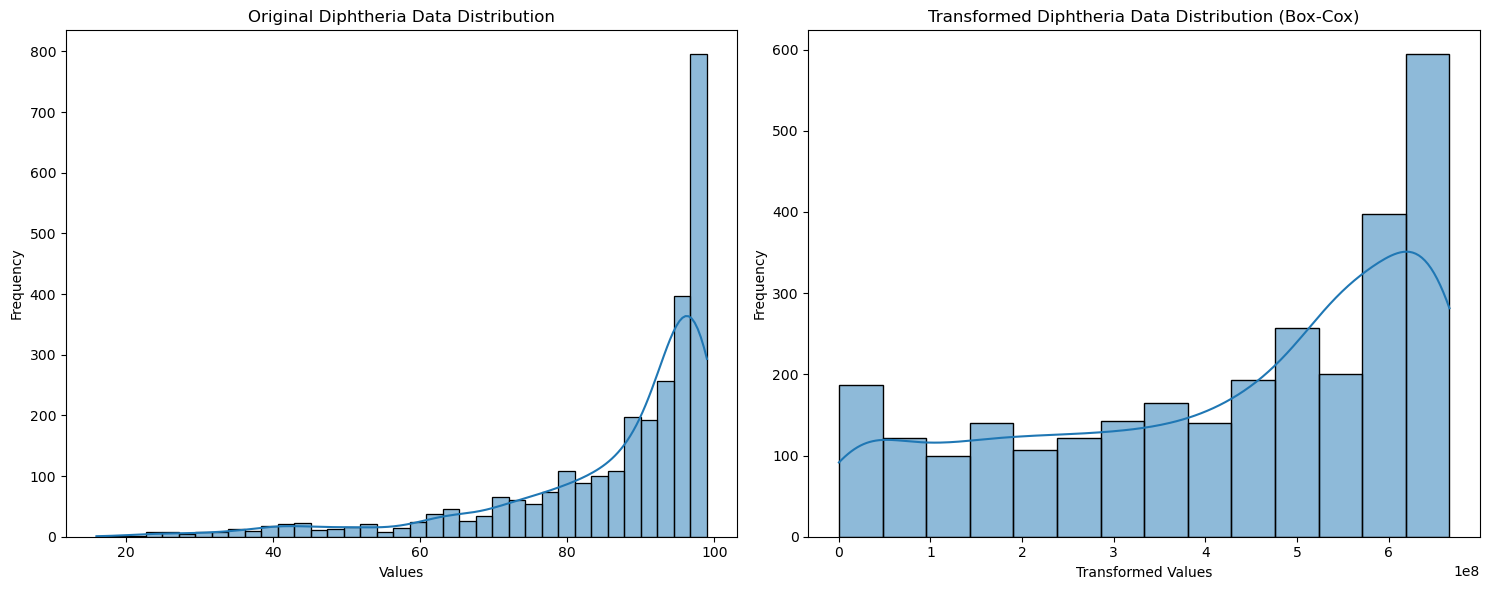

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.8999001979827881, p-value=8.946379850712146e-40


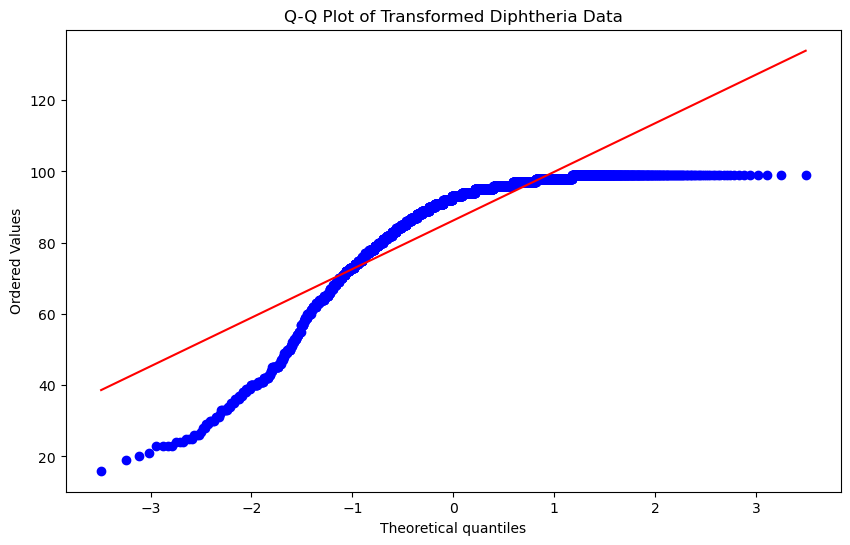

In [396]:
plt.figure(figsize=(15, 6))

# Original Data Histogram
plt.subplot(1, 2, 1)
sns.histplot(original, kde=True, stat="count")
plt.title('Original Diphtheria Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Transformed Data Histogram
plt.subplot(1, 2, 2)
sns.histplot(dataa['Diphtheria'], kde=True, stat="count")  # Using the updated Diphtheria column
plt.title('Transformed Diphtheria Data Distribution (Box-Cox)')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

# Shapiro-Wilk test for transformed data
shapiro_test = stats.shapiro(dataa['Diphtheria'].dropna())
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Q-Q plot for transformed data
plt.figure(figsize=(10, 6))
stats.probplot(data['Diphtheria'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed Diphtheria Data')
plt.show()

## **case study of trying to minimize  negative loglikehood function using Tensorflow (optional case study)**

**BOX Cox**

\[
For \( y > 0 \):
\begin{cases}
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\log(y) & \text{if } \lambda = 0
\end{cases}
\]


**negative log likehood**  

The negative  log-likelihood can be expressed as:

\[
\begin{cases}
LL = n \left( \log(2\pi) + \log(\sigma^2) + \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 \right)
\end{cases}
\] 


In [397]:
"""
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
def log_likelihood(data, lambda_value):
    n = len(data)
    mean = np.mean(data)
    variance = np.var(data)
    log_likelihood_value= -0.5 * (np.log(2 * np.pi * variance) + (1 / variance) * np.sum((data - mean) ** 2))*n
    return log_likelihood_value

def boxcox_transform(data, lambda_value):
    if lambda_value == 0:
        return tf.math.log(data) 
    else:
        return (data** lambda_value - 1) / lambda_value

def negative_log_likelihood_and_box_cox_transform(data, lambda_value):#is positive cuz original was -ve
    transformed_data = boxcox_transform(data, lambda_value)#send to transform
    n = len( transformed_data)
    mean = tf.reduce_mean(transformed_data)
    variance = tf.reduce_mean(tf.square(transformed_data - mean)) + 1e-8
    nll = 0.5 * tf.reduce_sum(tf.math.log(2 * np.pi )+tf.math.log(variance) + (tf.square(transformed_data - mean)  / variance))*n
    return nll
"""

'\nimport numpy as np\nimport pandas as pd\nimport tensorflow as tf\nimport matplotlib.pyplot as plt\nimport seaborn as sns\ndef log_likelihood(data, lambda_value):\n    n = len(data)\n    mean = np.mean(data)\n    variance = np.var(data)\n    log_likelihood_value= -0.5 * (np.log(2 * np.pi * variance) + (1 / variance) * np.sum((data - mean) ** 2))*n\n    return log_likelihood_value\n\ndef boxcox_transform(data, lambda_value):\n    if lambda_value == 0:\n        return tf.math.log(data) \n    else:\n        return (data** lambda_value - 1) / lambda_value\n\ndef negative_log_likelihood_and_box_cox_transform(data, lambda_value):#is positive cuz original was -ve\n    transformed_data = boxcox_transform(data, lambda_value)#send to transform\n    n = len( transformed_data)\n    mean = tf.reduce_mean(transformed_data)\n    variance = tf.reduce_mean(tf.square(transformed_data - mean)) + 1e-8\n    nll = 0.5 * tf.reduce_sum(tf.math.log(2 * np.pi )+tf.math.log(variance) + (tf.square(transformed_d

In [398]:
#data = pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\archive (1)\Life-Expectancy-Data-Updated.csv")
"""
values = dataa['Diphtheria'].values
positive_values = np.array(values[values > 0])


lambda_value = tf.Variable(0.1, dtype=tf.float32)
optimizer = tf.optimizers.Adam(learning_rate=0.001)
num_iterations = 20000

for i in range(num_iterations):
    with tf.GradientTape() as tape:
        positive_values_tensor = tf.convert_to_tensor(positive_values, dtype=tf.float32)
        loss = negative_log_likelihood_and_box_cox_transform(positive_values, lambda_value)
       

    gradients = tape.gradient(loss, [lambda_value])
    optimizer.apply_gradients(zip(gradients, [lambda_value]))

optimized_transformed_data = boxcox_transform(positive_values, lambda_value.numpy())
dataa['Diphtheria'] = optimized_transformed_data
likehood=log_likelihood(dataa['Diphtheria'].dropna().to_numpy(), lambda_value) # or just use log like hood found in pyhton

print(f'Optimal Lambda: {lambda_value.numpy()}')
print(f'Log-Likelihood of transformed data: {likehood}')
"""

"\nvalues = dataa['Diphtheria'].values\npositive_values = np.array(values[values > 0])\n\n\nlambda_value = tf.Variable(0.1, dtype=tf.float32)\noptimizer = tf.optimizers.Adam(learning_rate=0.001)\nnum_iterations = 20000\n\nfor i in range(num_iterations):\n    with tf.GradientTape() as tape:\n        positive_values_tensor = tf.convert_to_tensor(positive_values, dtype=tf.float32)\n        loss = negative_log_likelihood_and_box_cox_transform(positive_values, lambda_value)\n       \n\n    gradients = tape.gradient(loss, [lambda_value])\n    optimizer.apply_gradients(zip(gradients, [lambda_value]))\n\noptimized_transformed_data = boxcox_transform(positive_values, lambda_value.numpy())\ndataa['Diphtheria'] = optimized_transformed_data\nlikehood=log_likelihood(dataa['Diphtheria'].dropna().to_numpy(), lambda_value) # or just use log like hood found in pyhton\n\nprint(f'Optimal Lambda: {lambda_value.numpy()}')\nprint(f'Log-Likelihood of transformed data: {likehood}')\n"

In [399]:
"""
# Plot the original and transformed data
plt.subplot(1, 2, 1)
sns.histplot(positive_values, kde=True)
plt.title('Original Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(optimized_transformed_data, kde=True)
plt.title('Transformed Data Distribution (Box-Cox with Optimized Lambda)')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(optimized_transformed_data)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(optimized_transformed_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Optimized Transformed Data')
plt.show()
"""


'\n# Plot the original and transformed data\nplt.subplot(1, 2, 1)\nsns.histplot(positive_values, kde=True)\nplt.title(\'Original Data Distribution\')\nplt.xlabel(\'Values\')\nplt.ylabel(\'Frequency\')\n\nplt.subplot(1, 2, 2)\nsns.histplot(optimized_transformed_data, kde=True)\nplt.title(\'Transformed Data Distribution (Box-Cox with Optimized Lambda)\')\nplt.xlabel(\'Transformed Values\')\nplt.ylabel(\'Frequency\')\n\nplt.tight_layout()\nplt.show()\n\n# Shapiro-Wilk test\nshapiro_test = stats.shapiro(optimized_transformed_data)\nprint(f\'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}\')\n\n# Q-Q plot\nplt.figure(figsize=(10, 6))\nstats.probplot(optimized_transformed_data, dist="norm", plot=plt)\nplt.title(\'Q-Q Plot of Optimized Transformed Data\')\nplt.show()\n'

### **Results**  

#### 1-Scipy

scipy log test = -4158727.9697847595

at lamda = 4.761153651473844 

resulting 

shapiro test of 0.88 (shows good for normal distirbution)
#### 2- Tensorflow and derivative method

Tensorflow log test=-4060329.6506554596  

at lamda=-3.732123613357544

resulting  shapiro of 0.1134
### **Discussion**

**Despite the fact that both led to almost same log likehood by using shapiro wilk test it has been proven that using scipy leads to better normal distirbution so both methods can have same log like hood but not same Shape so it is recommended to use scipy directly** 

where: 
The log-likelihood can indeed be the same for different values of lambda in the Box-Cox transformation, even if those transformations result in different distributions of the data. Here’s a more detailed explanation:

Key Points

**Log-Likelihood and Normality:**

The log-likelihood measures how well the model (in this case, the transformed data) fits the observed data. Different transformations can yield the same log-likelihood value but may produce different shapes of the distribution.

A transformation that leads to a normal distribution is often preferred, but it’s not guaranteed that all transformations yielding the same log-likelihood will result in a normal distribution.

**Multiple Lambda Values:**

The Box-Cox transformation is defined for positive data, and different lambda values can produce different transformed datasets. Some of these datasets may appear more normal than others, even if their log-likelihood values are similar.

### **conclusion**

**This means that while one lambda may maximize the log-likelihood, it does not necessarily mean it will produce the best approximation to a normal distribution.**
by using shapiro test scipy was the best solution so it's recommended to use it

### **Practical Implications:**

When using Box-Cox or any transformation, it’s essential to assess the resulting distribution **visually (e.g., using histograms or Q-Q plots) and statistically (e.g., using normality tests like the Shapiro-Wilk test)** to ensure that the transformation meets your analytical needs.


## Normal distiribution to all data

In [400]:
def log_likelihood(data, lambda_value):
    n = len(data)
    mean = np.mean(data)
    variance = np.var(data)
    log_likelihood_value= -0.5 * (np.log(2 * np.pi * variance) + (1 / variance) * np.sum((data - mean) ** 2))*n
    return log_likelihood_value


In [401]:

from scipy import stats
# Convert to NumPy array and apply Box-Cox transformation
# Ensure all values are positive

original=dataa['Alcohol_consumption']
if (dataa['Alcohol_consumption'] <= 0).any():
    # Option 1: Remove non-positive values
    dataa = dataa[dataa['Alcohol_consumption'] > 0]
dataa.reset_index(drop=True, inplace=True)# keep the index very cruicial

0      -1.915854
1      -2.031327
2      -2.031327
3      -1.830899
4      -1.830899
          ...   
2806    1.028612
2807    1.052897
2808    0.916257
2809    0.973082
2810    1.591776
Name: Alcohol_consumption, Length: 2811, dtype: float64
Optimal lambda for Alcohol_consumption data is: 0.42168006835016686
Log-Likelihood of transformed Alcohol_consumption is: -3955175.5807420304


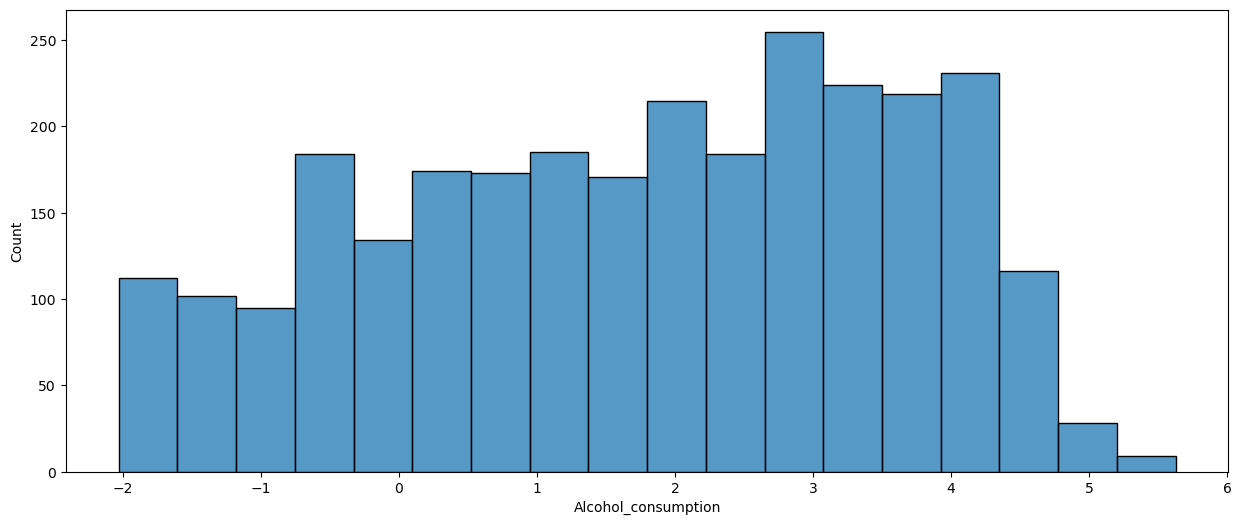

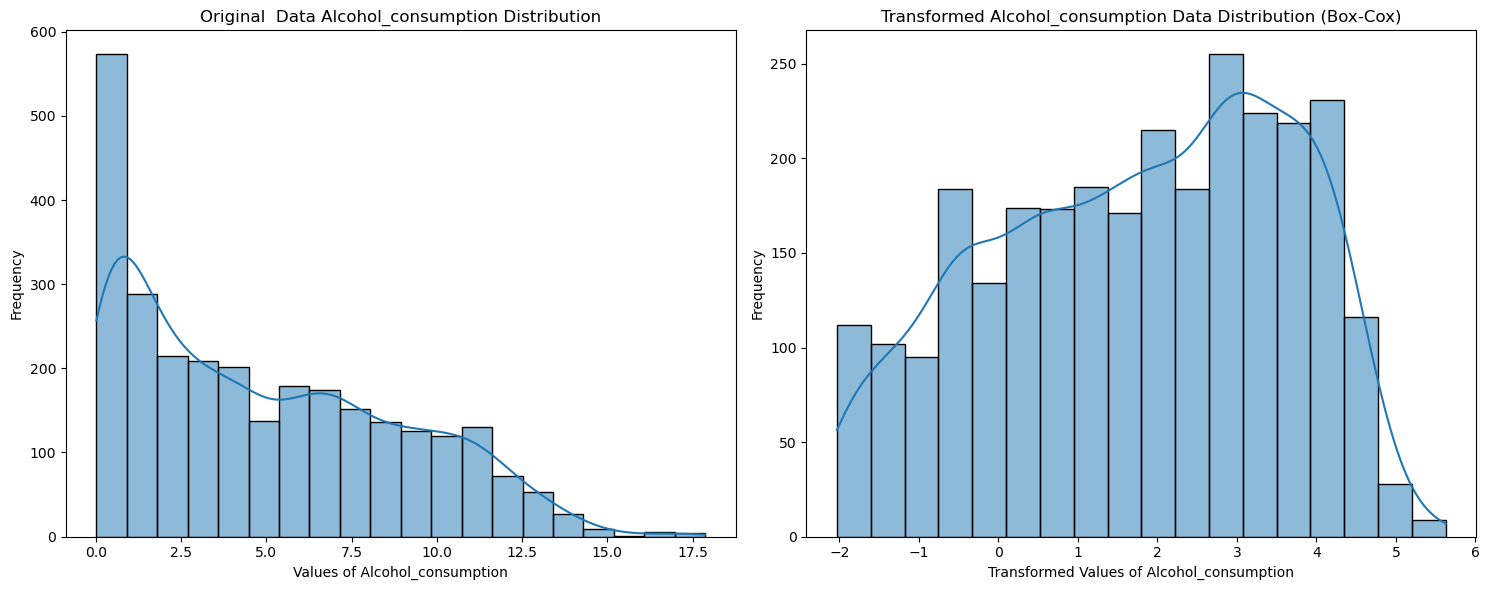

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9650558233261108, p-value=1.45831501670663e-25


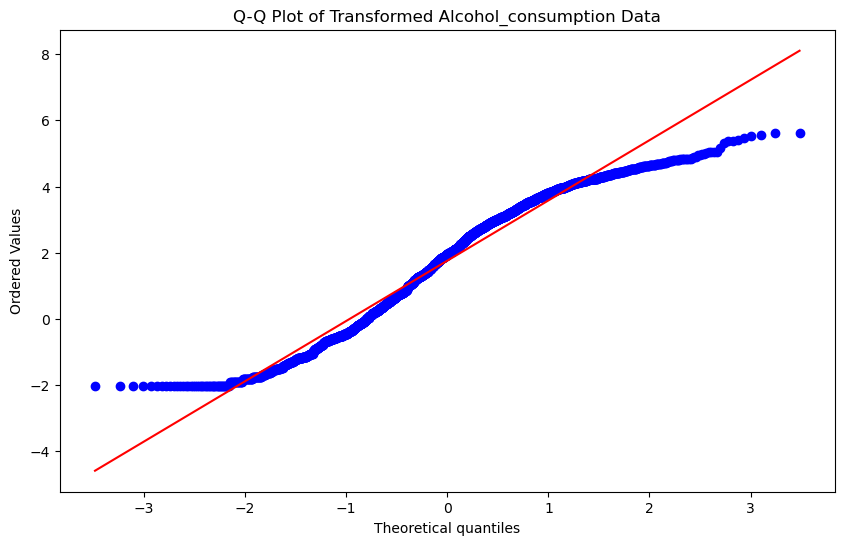

0       5.974733
1       5.150789
2       5.211325
3       5.521448
4       5.646904
          ...   
2806    5.097266
2807    5.013925
2808    5.045238
2809    5.133121
2810    5.057614
Name: Infant_deaths, Length: 2811, dtype: float64
Optimal lambda for Infant_deaths data is: 0.11991996352897422
Log-Likelihood of transformed Infant_deaths is: -3954567.2366575715


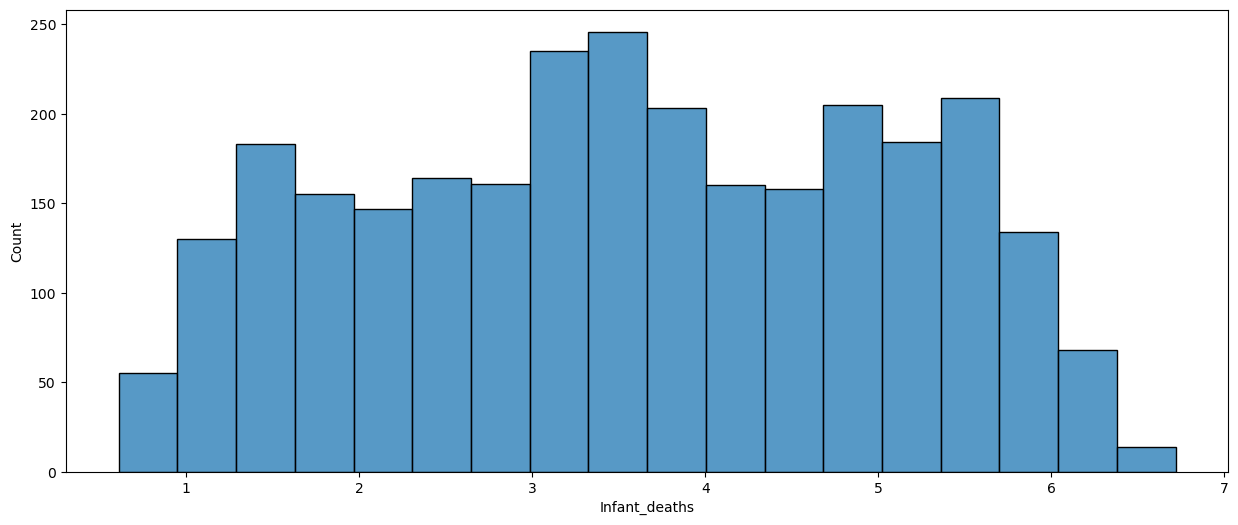

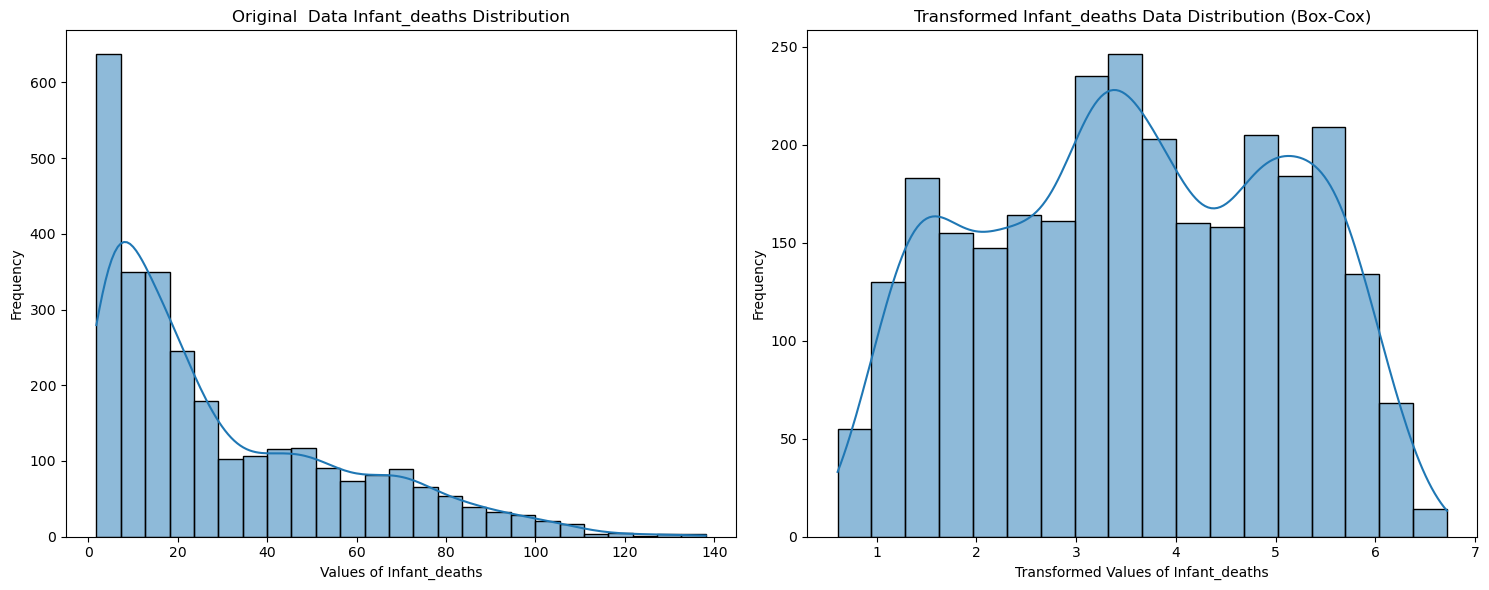

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9678434133529663, p-value=1.3431752209113836e-24


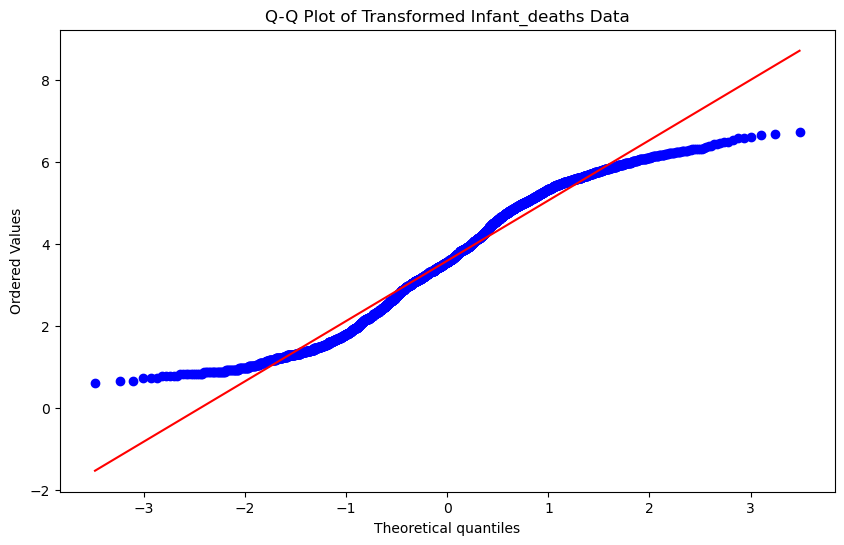

0       5.126415
1       4.505035
2       4.553197
3       4.794040
4       4.886991
          ...   
2806    4.785937
2807    4.757706
2808    4.763646
2809    4.794040
2810    4.681323
Name: Under_five_deaths, Length: 2811, dtype: float64
Optimal lambda for Under_five_deaths data is: 0.02165095178319624
Log-Likelihood of transformed Under_five_deaths is: -3954006.917824079


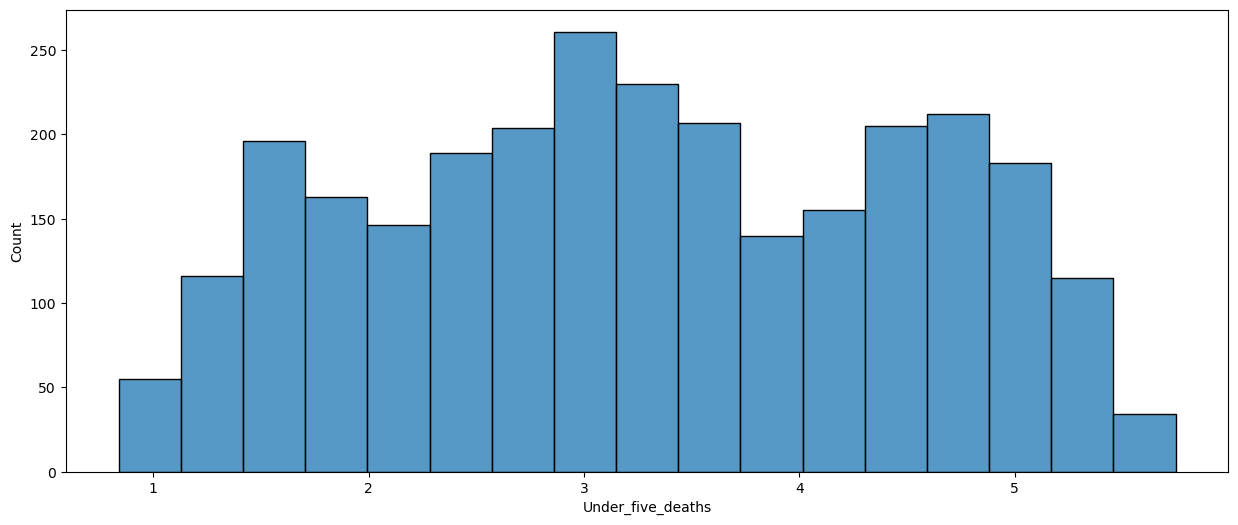

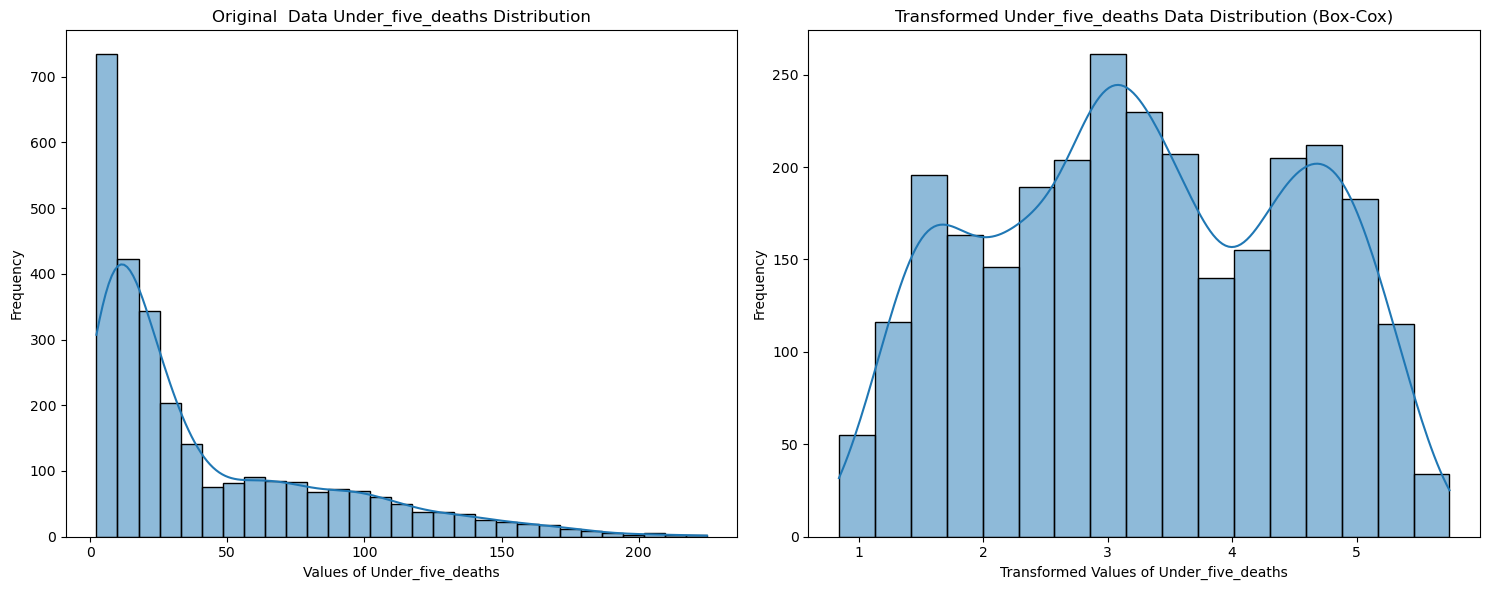

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9675653576850891, p-value=1.0695334737788954e-24


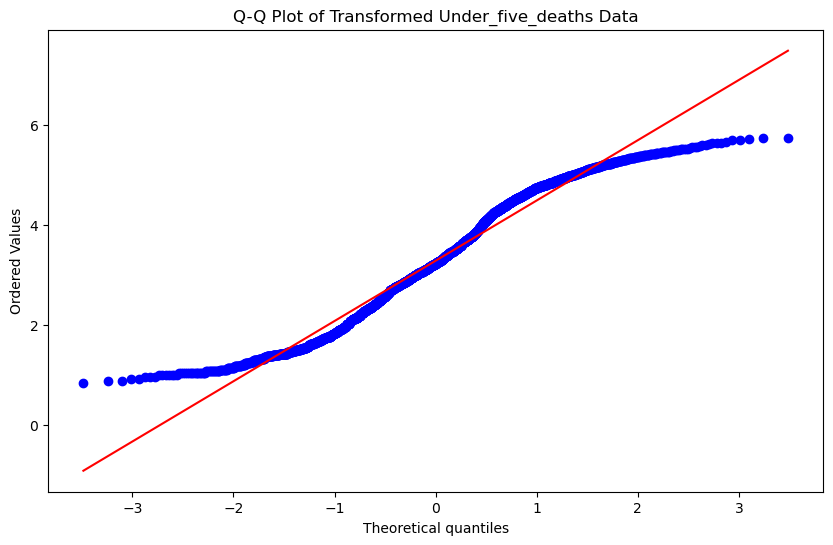

0       4.713475
1       4.516798
2       4.529091
3       4.593441
4       4.623023
          ...   
2806    5.195387
2807    5.255366
2808    5.210966
2809    5.179385
2810    5.035998
Name: Adult_mortality, Length: 2811, dtype: float64
Optimal lambda for Adult_mortality data is: -0.07102548578710272
Log-Likelihood of transformed Adult_mortality is: -3950842.5341124777


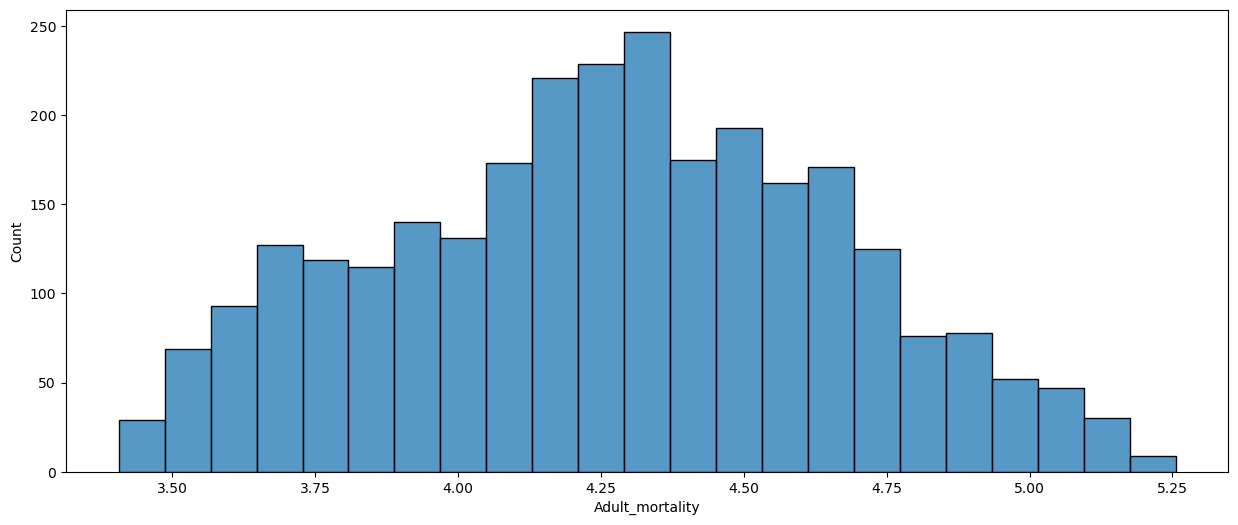

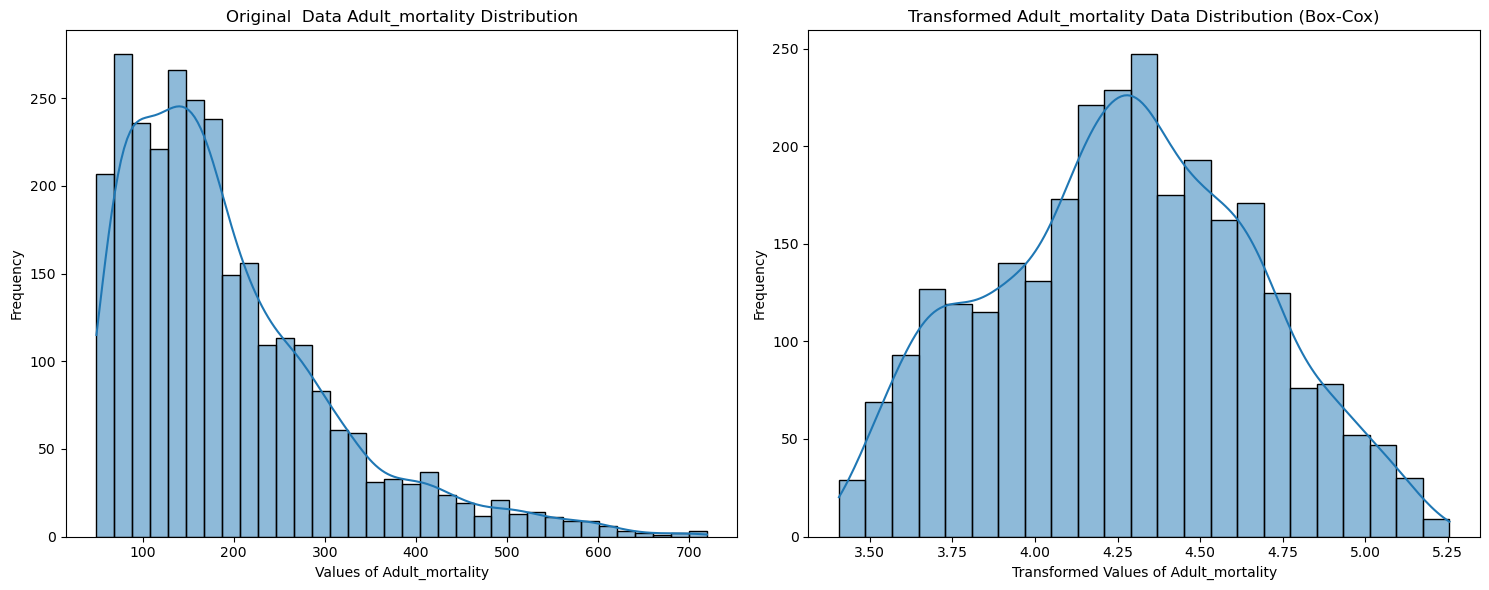

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9889512658119202, p-value=5.863059061687881e-14


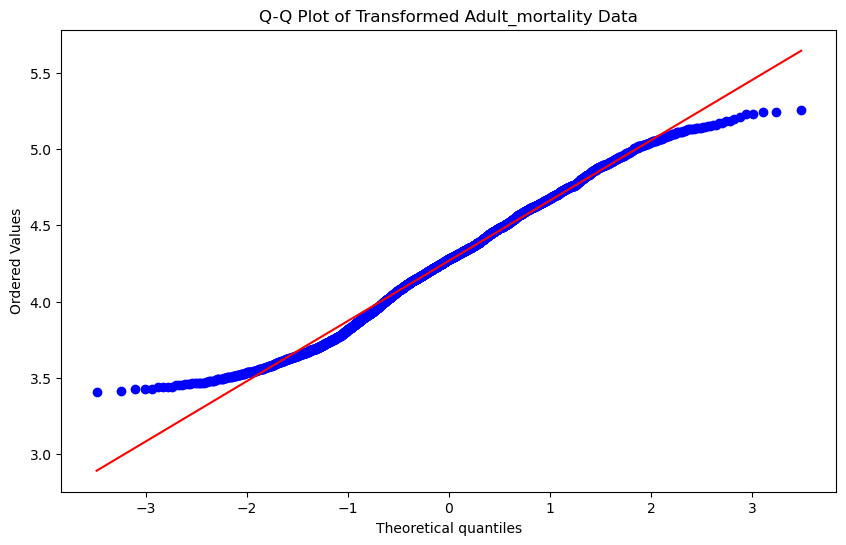

0       4.840151e+06
1       4.840151e+06
2       5.507728e+06
3       5.507728e+06
4       5.507728e+06
            ...     
2806    7.048913e+06
2807    9.408585e+06
2808    5.866445e+06
2809    8.894993e+06
2810    2.205647e+07
Name: Hepatitis_B, Length: 2811, dtype: float64
Optimal lambda for Hepatitis_B data is: 4.069655415764567
Log-Likelihood of transformed Hepatitis_B is: -3998653.845353169


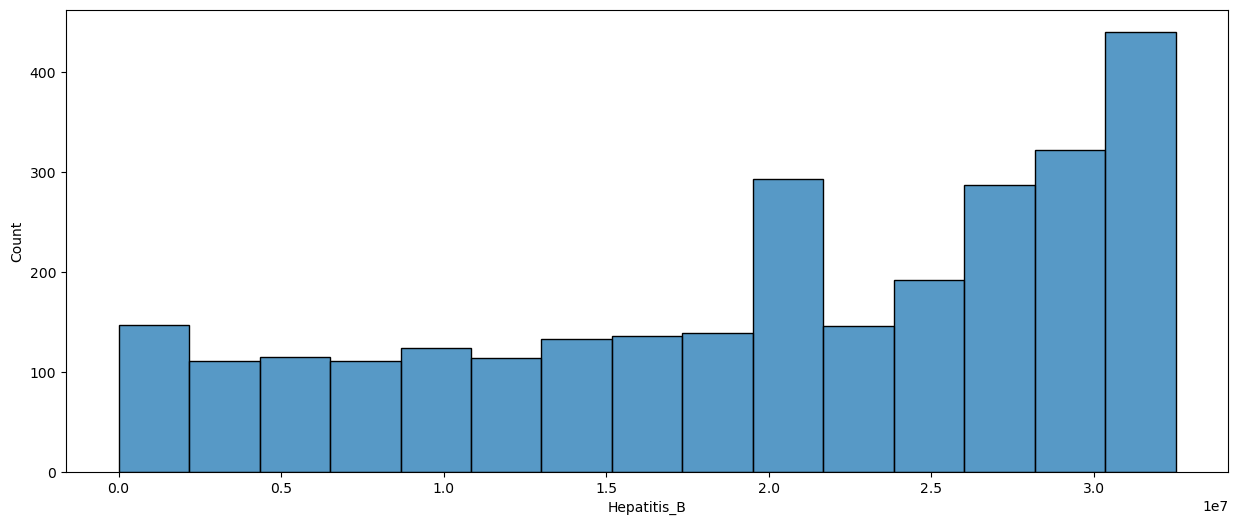

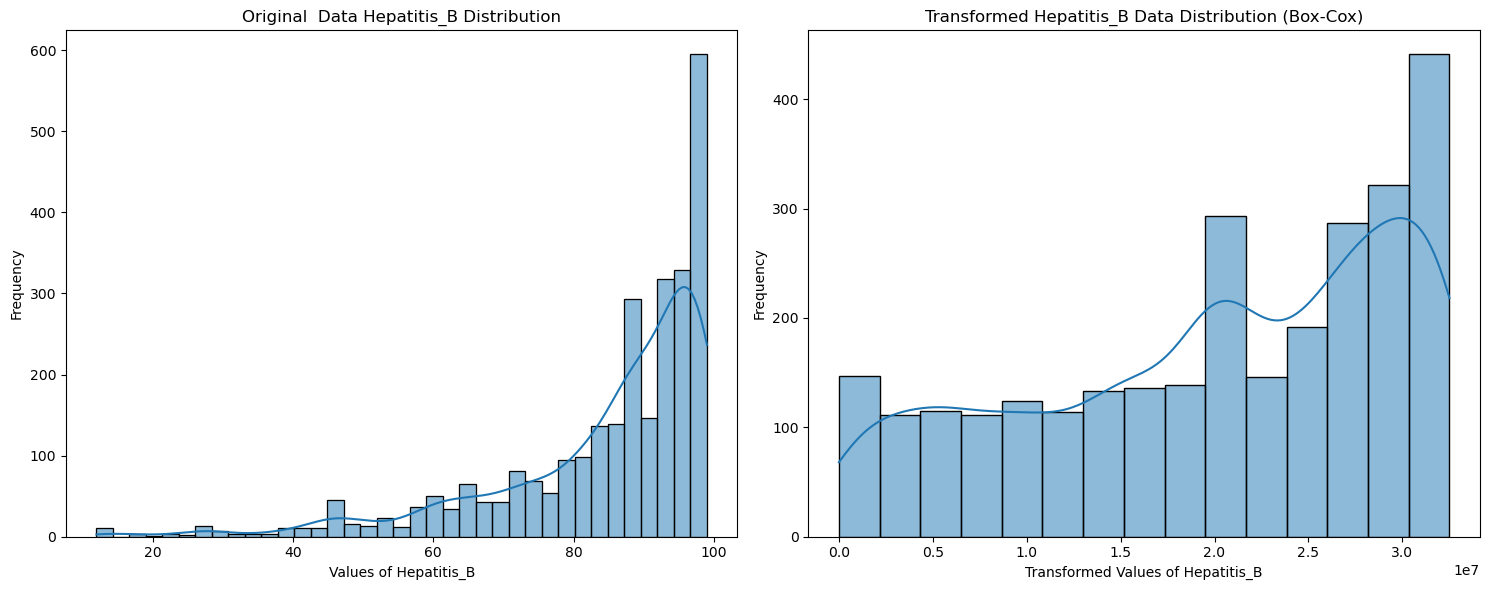

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9249805808067322, p-value=2.387051496535079e-35


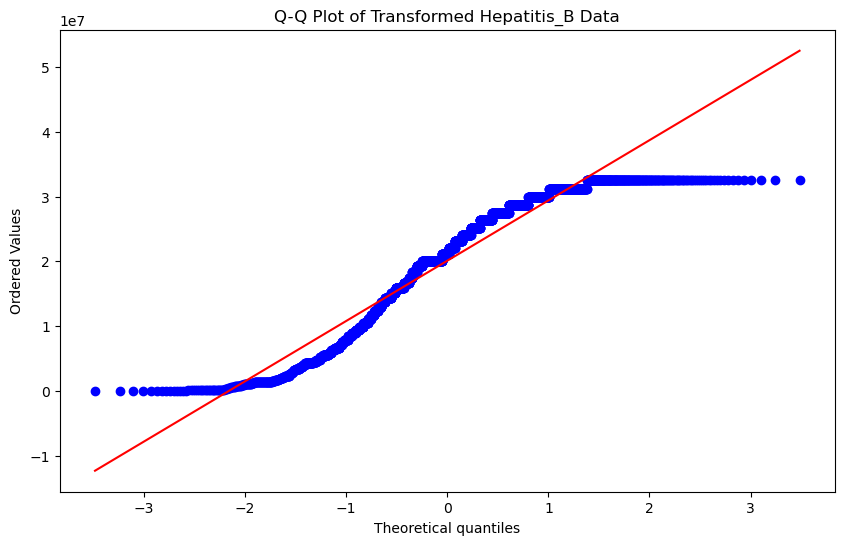

0        129.812861
1       2564.275148
2       1831.883623
3        578.790730
4        329.684822
           ...     
2806    6056.942051
2807    6056.942051
2808    6056.942051
2809    6056.942051
2810    6056.942051
Name: Measles, Length: 2811, dtype: float64
Optimal lambda for Measles data is: 2.2936915181526722
Log-Likelihood of transformed Measles is: -3977126.1743709696


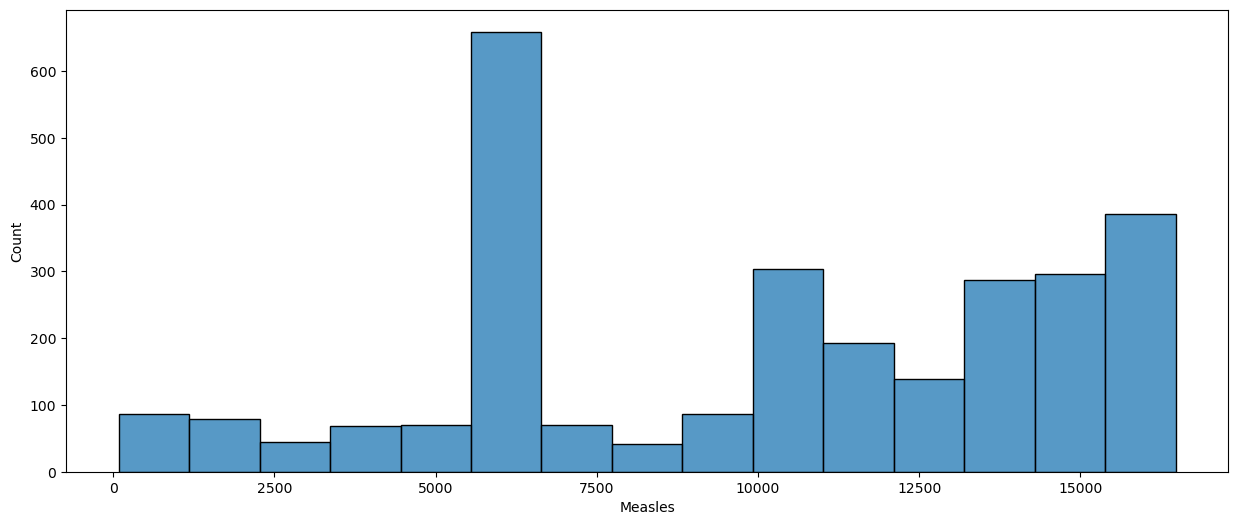

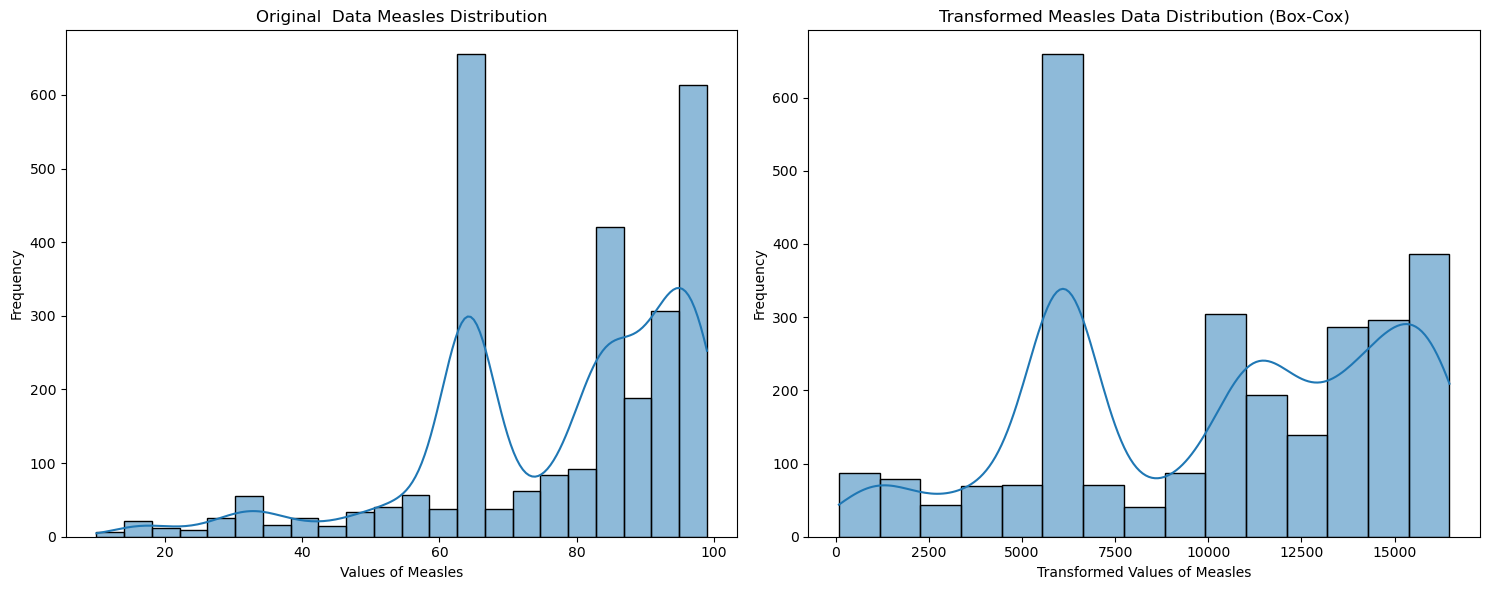

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9269859790802002, p-value=5.668659646778503e-35


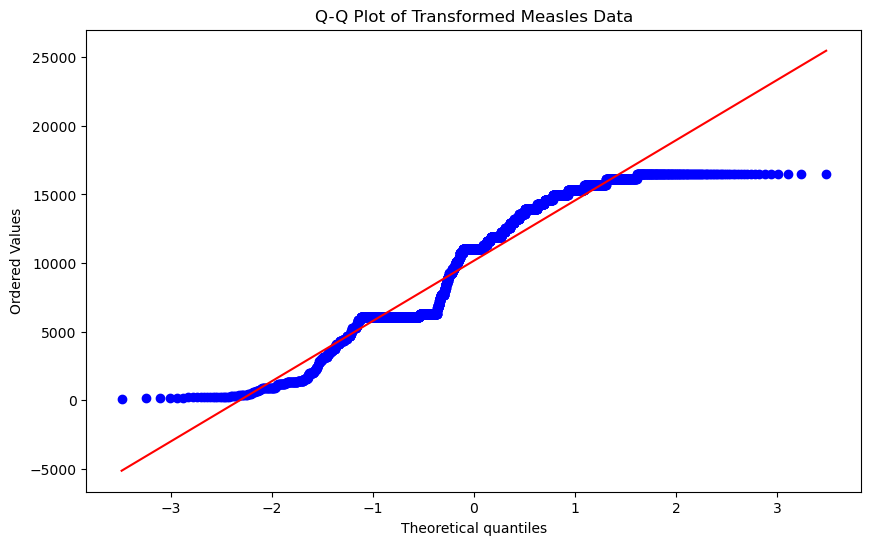

0       68.329461
1       75.654858
2       74.663779
3       72.205300
4       71.229645
          ...    
2806    77.149655
2807    76.152036
2808    77.149655
2809    77.149655
2810    77.650092
Name: BMI, Length: 2811, dtype: float64
Optimal lambda for BMI data is: 1.5097334234070745
Log-Likelihood of transformed BMI is: -3960230.0157976616


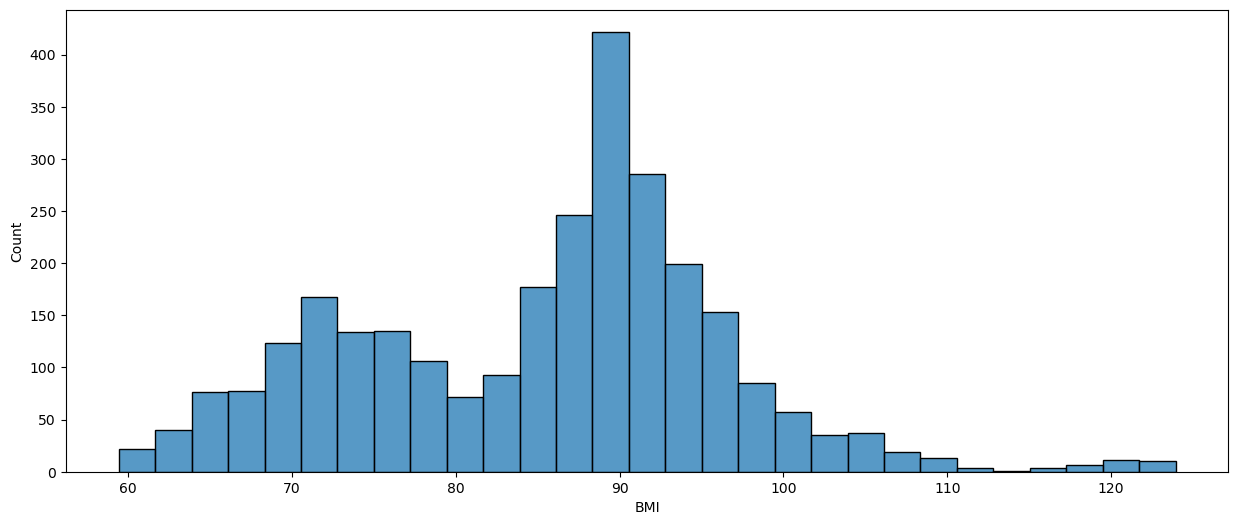

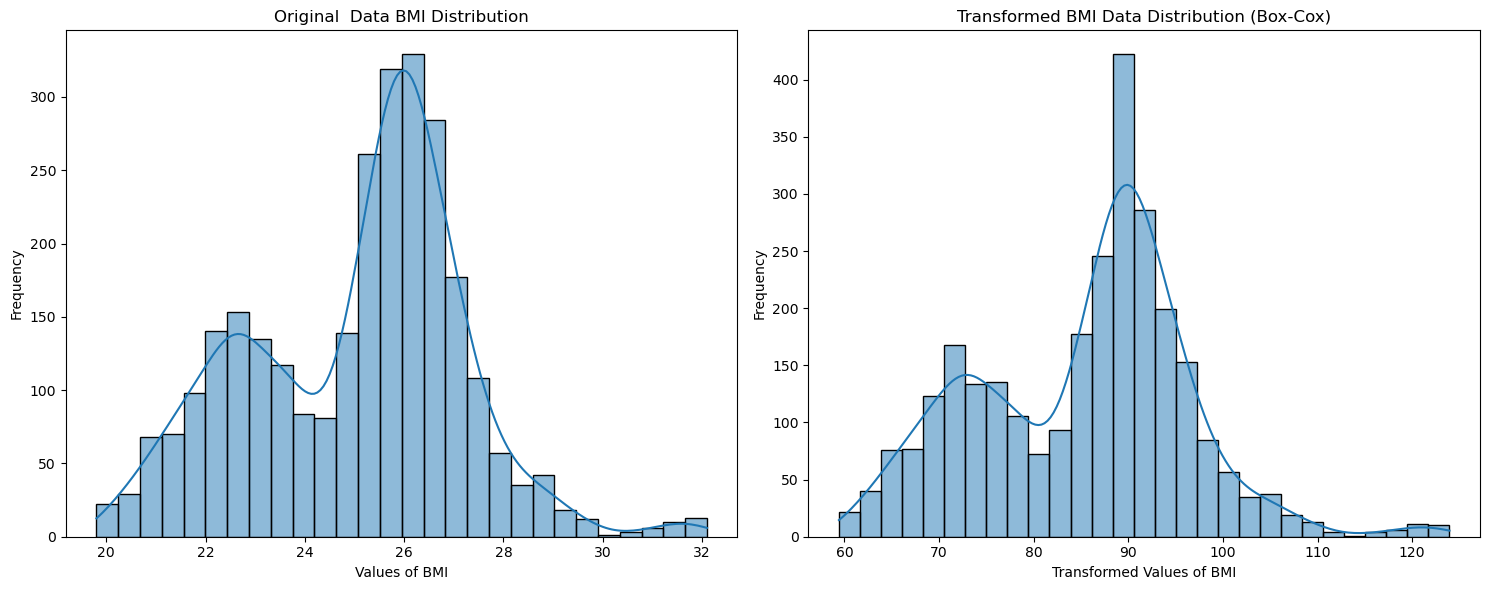

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9706001281738281, p-value=1.398419090939443e-23


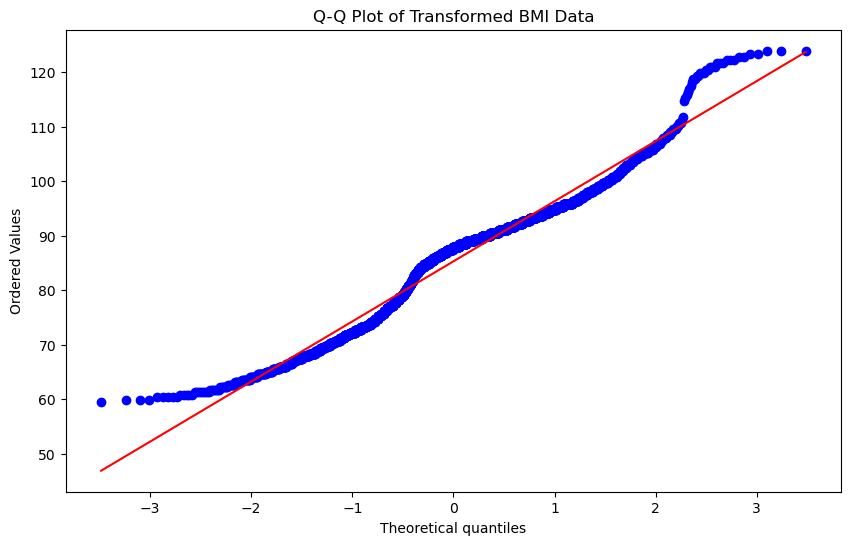

0       1.624602e+06
1       1.881089e+08
2       2.205175e+08
3       2.205175e+08
4       1.347091e+08
            ...     
2806    3.707976e+08
2807    4.261281e+08
2808    3.213716e+08
2809    4.261281e+08
2810    1.149350e+09
Name: Polio, Length: 2811, dtype: float64
Optimal lambda for Polio data is: 5.006696183489955
Log-Likelihood of transformed Polio is: -4010330.829482499


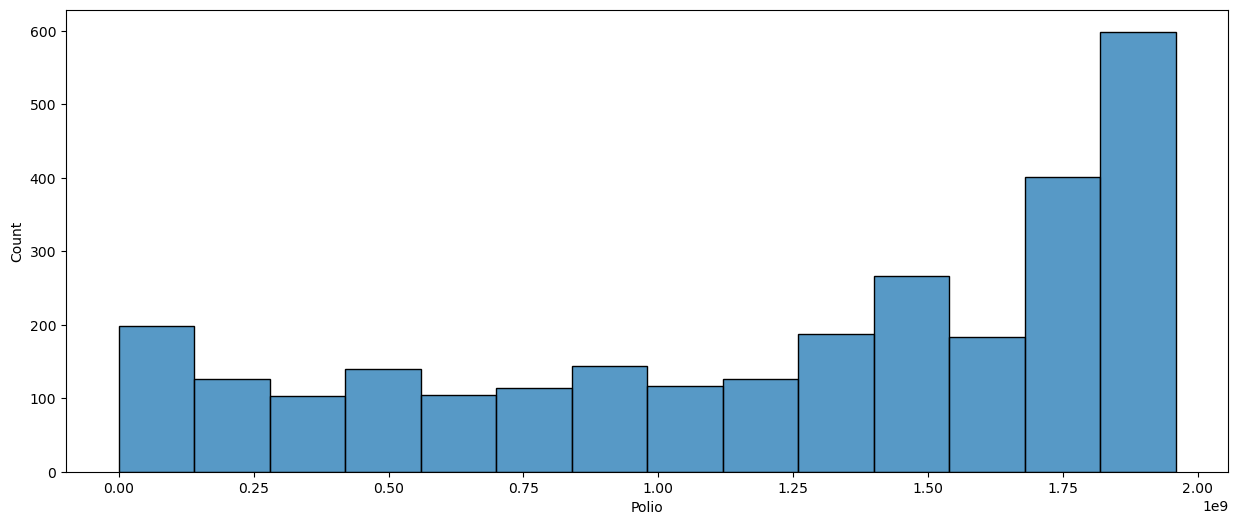

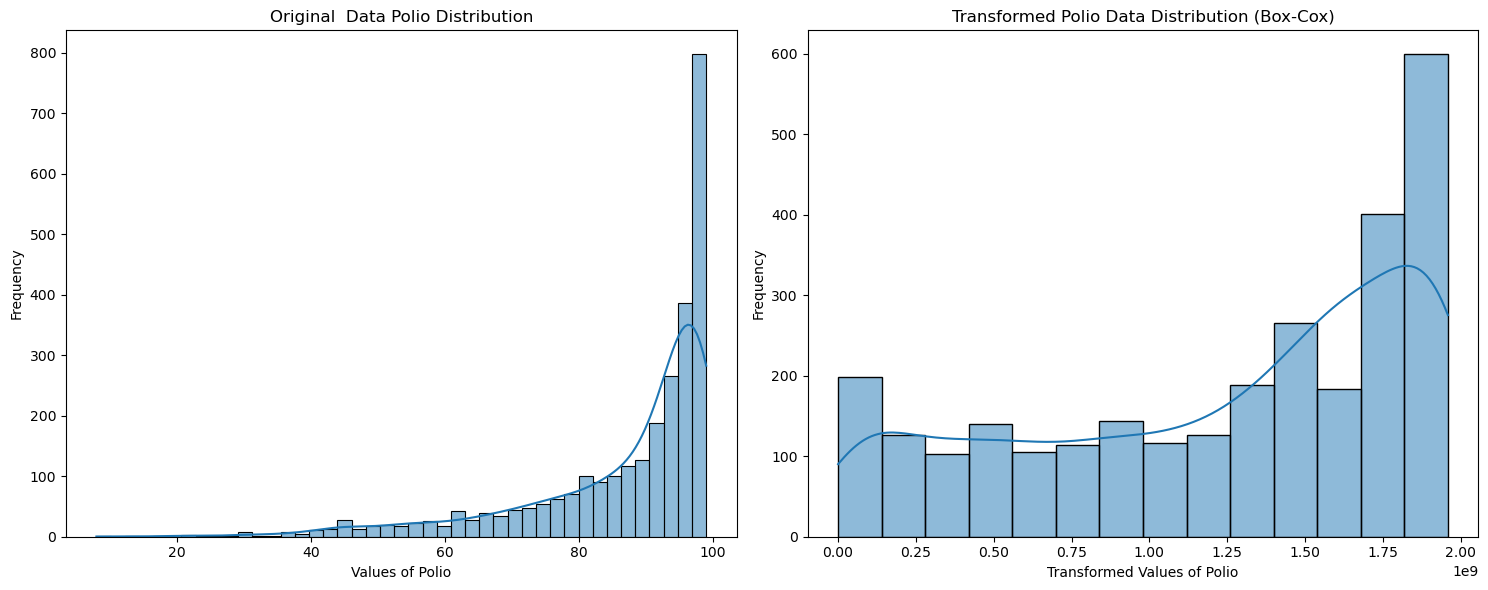

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.8986632823944092, p-value=1.1706349280077019e-39


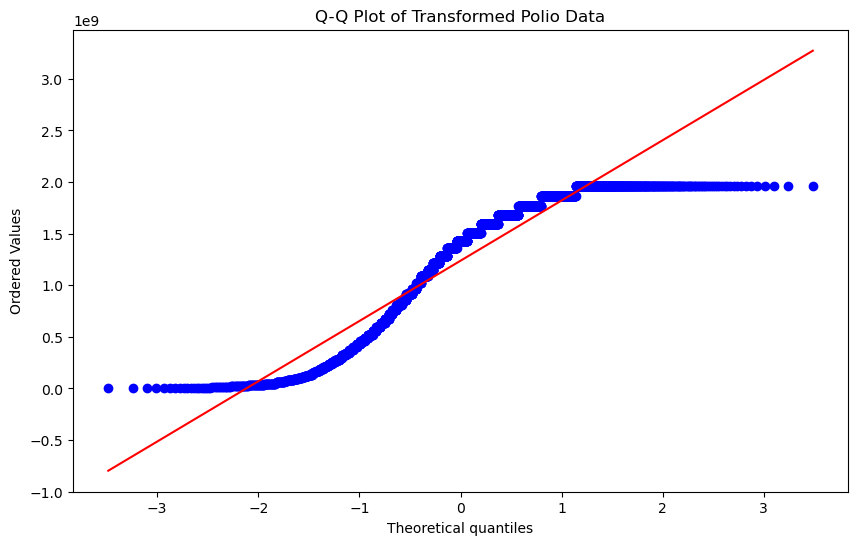

0       9.933850e+05
1       9.924879e+07
2       1.157754e+08
3       1.157754e+08
4       7.181480e+07
            ...     
2806    1.788212e+08
2807    1.915599e+08
2808    1.553623e+08
2809    2.191962e+08
2810    5.732838e+08
Name: Diphtheria, Length: 2811, dtype: float64
Optimal lambda for Diphtheria data is: 1.0189317251153338
Log-Likelihood of transformed Diphtheria is: -4008295.27308944


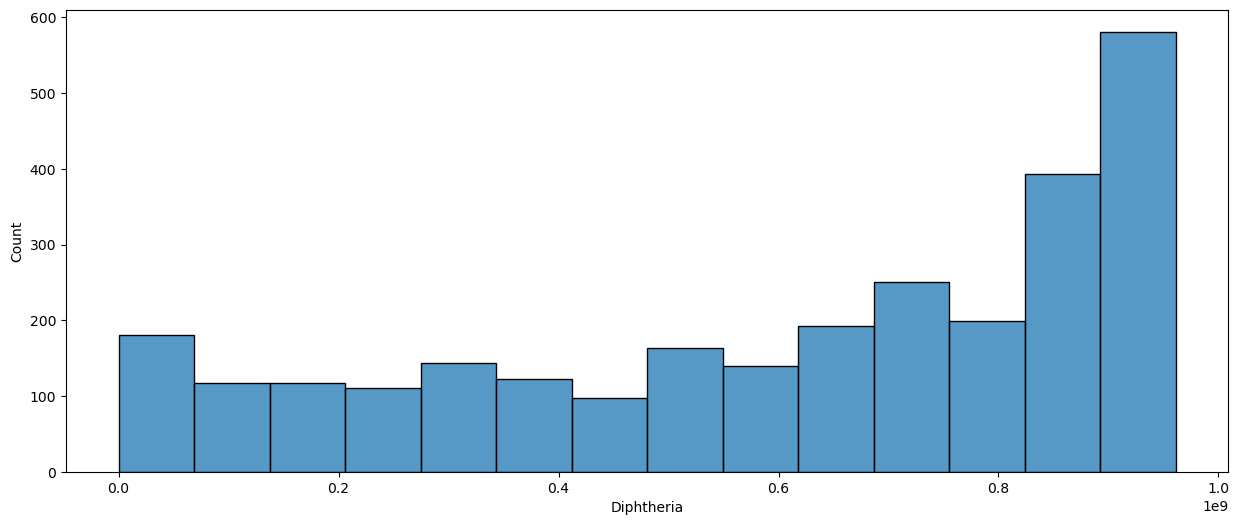

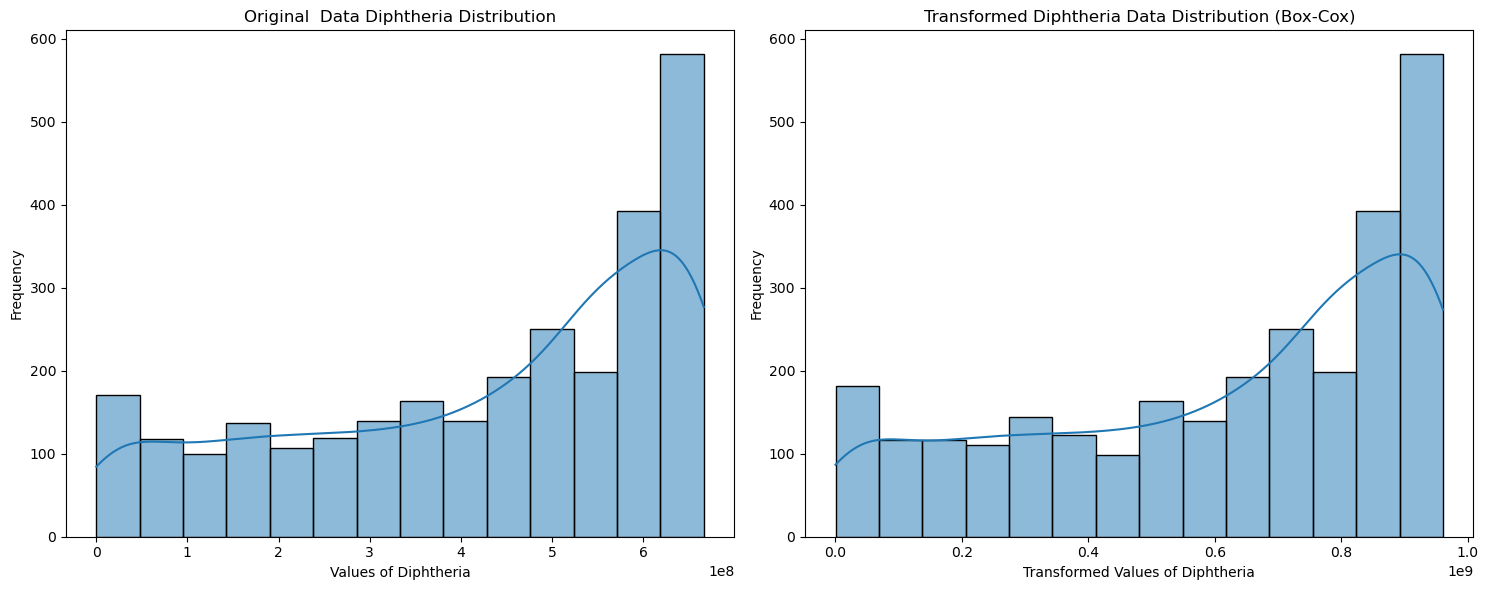

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9019983410835266, p-value=3.637611065362292e-39


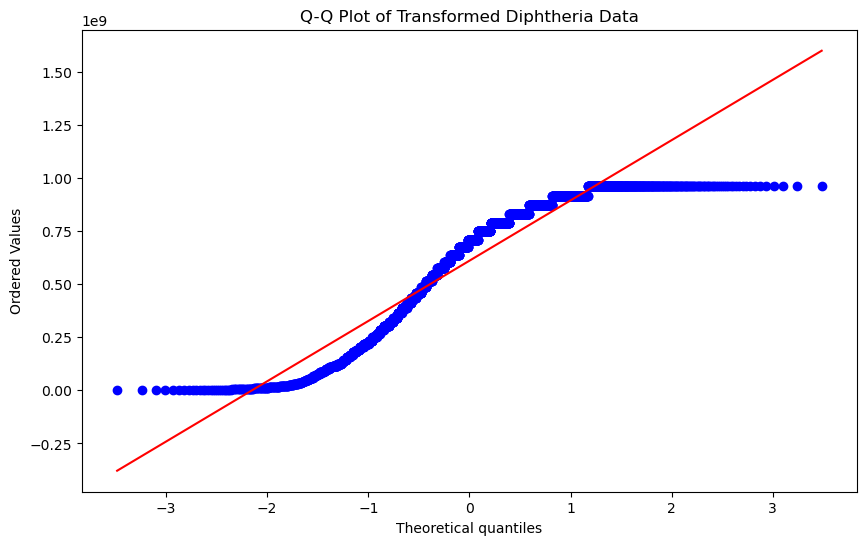

0      -5.387249
1      -4.664712
2      -4.664712
3      -5.387249
4      -5.387249
          ...   
2806    1.843184
2807    2.003618
2808    1.876380
2809    1.802055
2810    1.649617
Name: Incidents_HIV, Length: 2811, dtype: float64
Optimal lambda for Incidents_HIV data is: -0.15570844562933617
Log-Likelihood of transformed Incidents_HIV is: -3955292.891390843


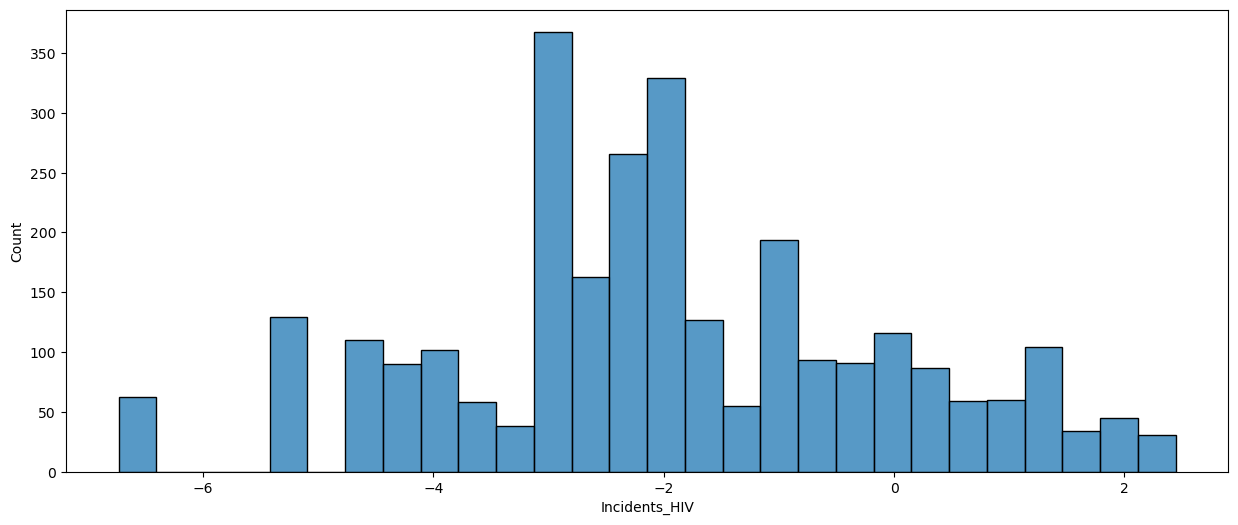

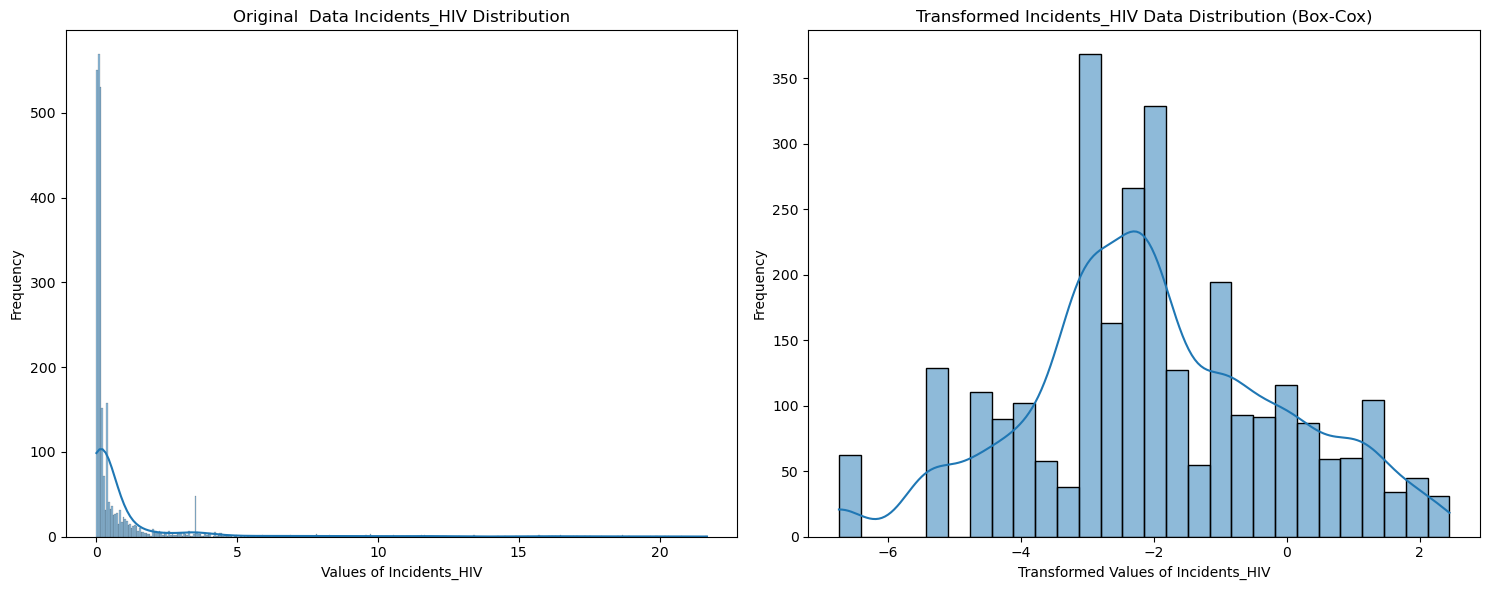

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9847522974014282, p-value=7.973054958055725e-17


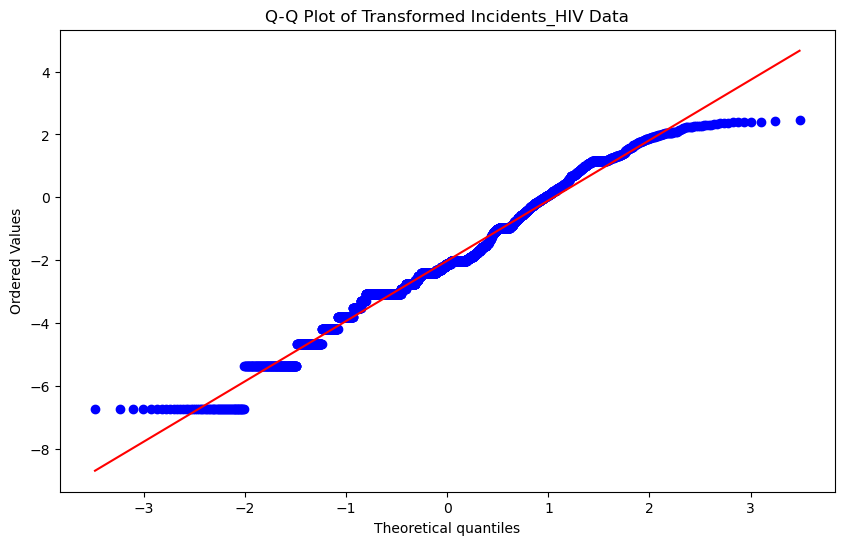

0       4.508889
1       5.565586
2       5.570996
3       5.296861
4       5.203512
          ...   
2806    6.063325
2807    6.327642
2808    6.094108
2809    6.029009
2810    6.076201
Name: GDP_per_capita, Length: 2811, dtype: float64
Optimal lambda for GDP_per_capita data is: -0.041885069034373376
Log-Likelihood of transformed GDP_per_capita is: -3953453.166703439


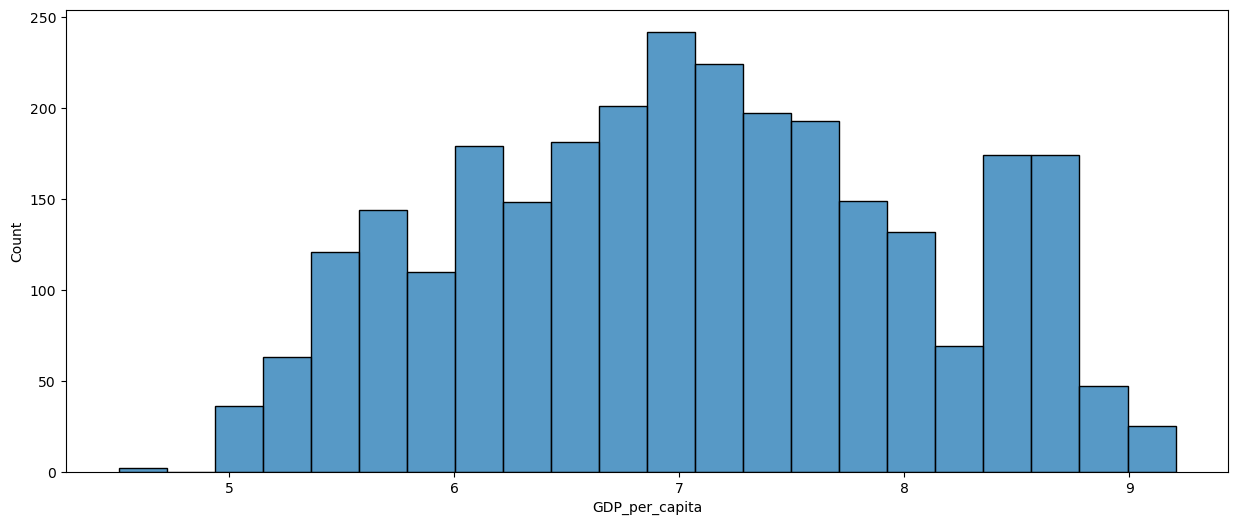

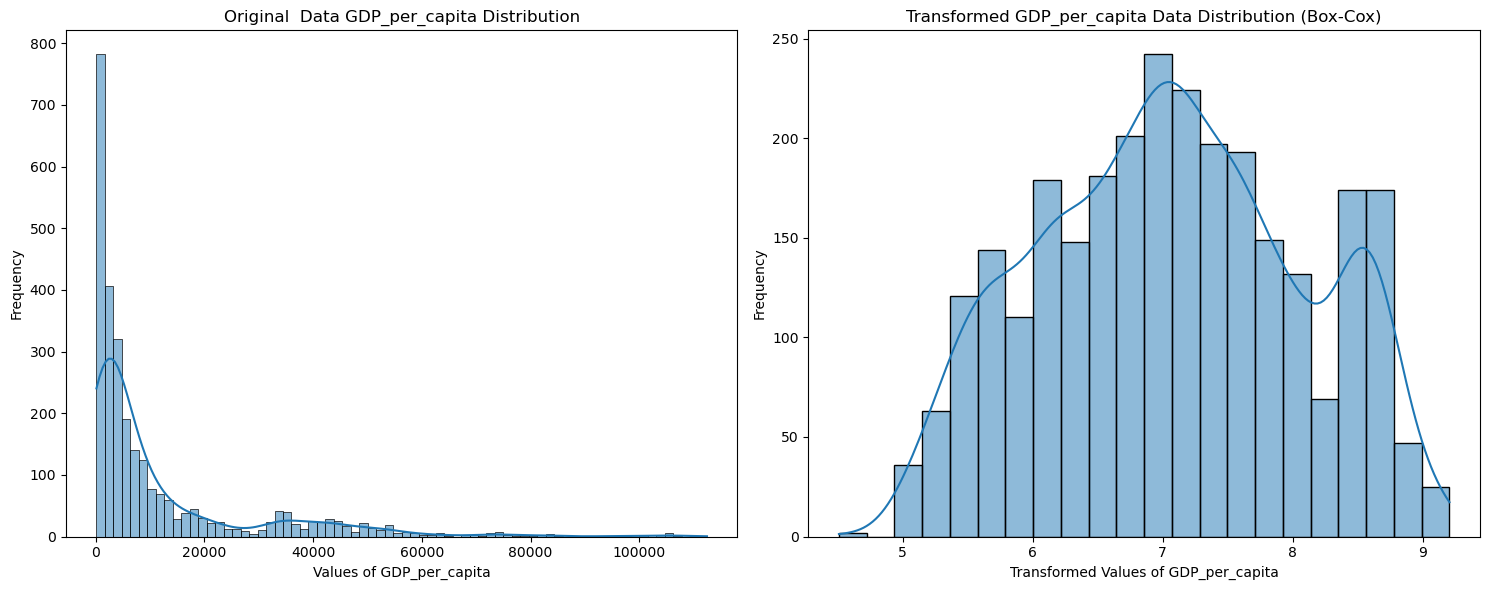

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9800931811332703, p-value=2.0226157007130984e-19


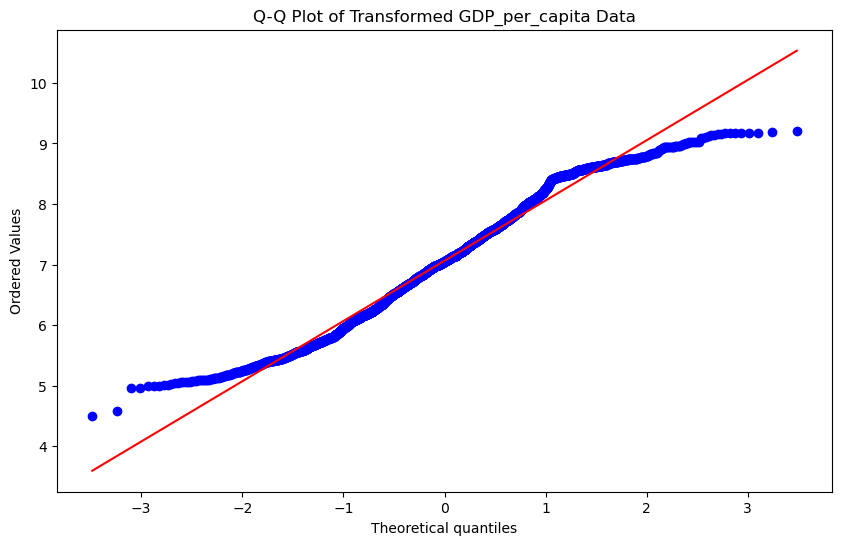

0       0.904516
1       3.835171
2       3.855072
3       3.961404
4       3.998831
          ...   
2806    2.674760
2807    0.185608
2808    2.744291
2809    2.602577
2810    2.388320
Name: Thinness_ten_nineteen_years, Length: 2811, dtype: float64
Optimal lambda for Thinness_ten_nineteen_years data is: 0.19539170098320685
Log-Likelihood of transformed Thinness_ten_nineteen_years is: -3954087.271090222


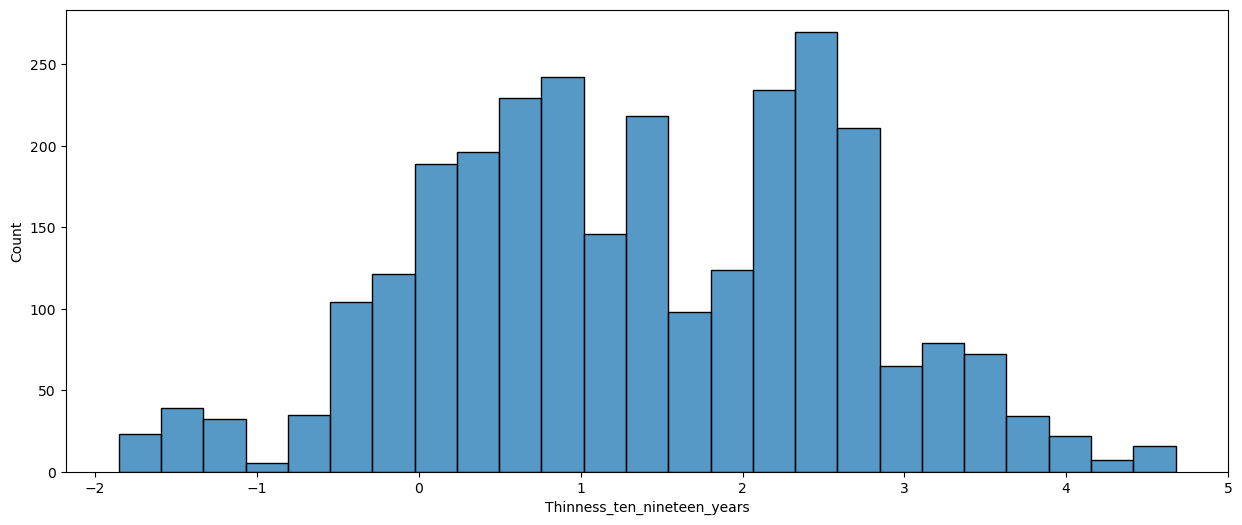

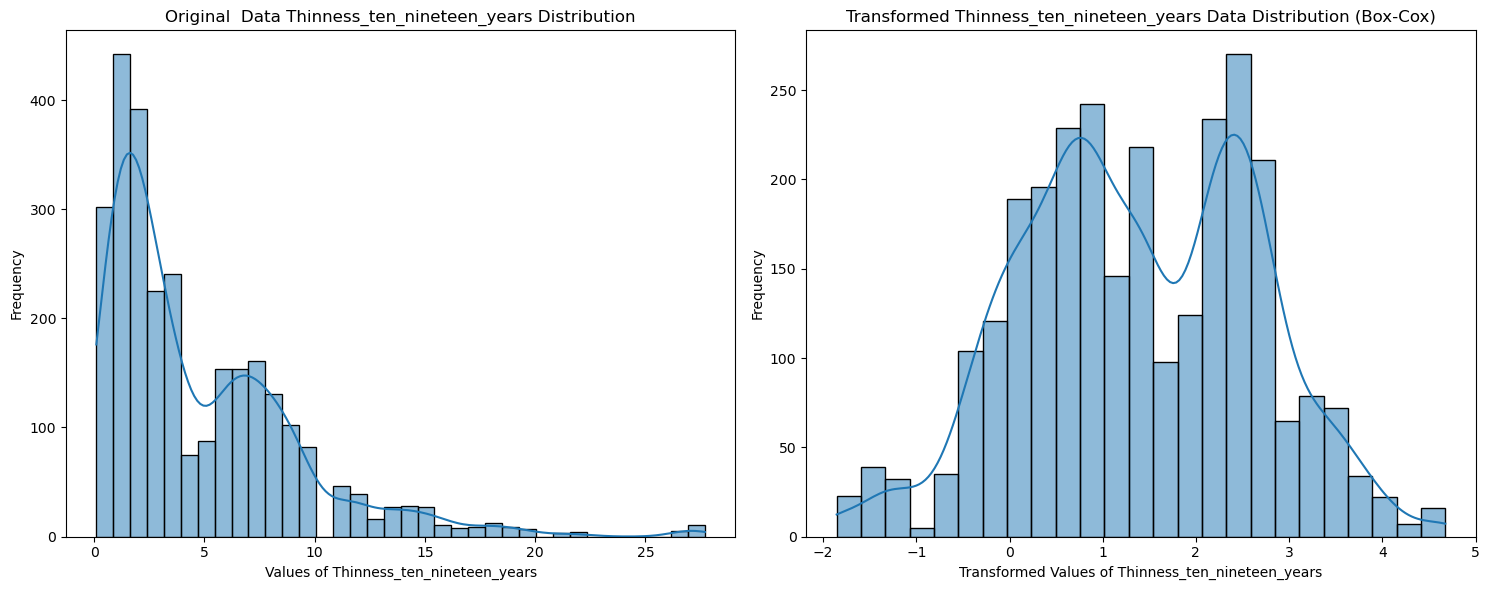

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9894574880599976, p-value=1.4486342355714277e-13


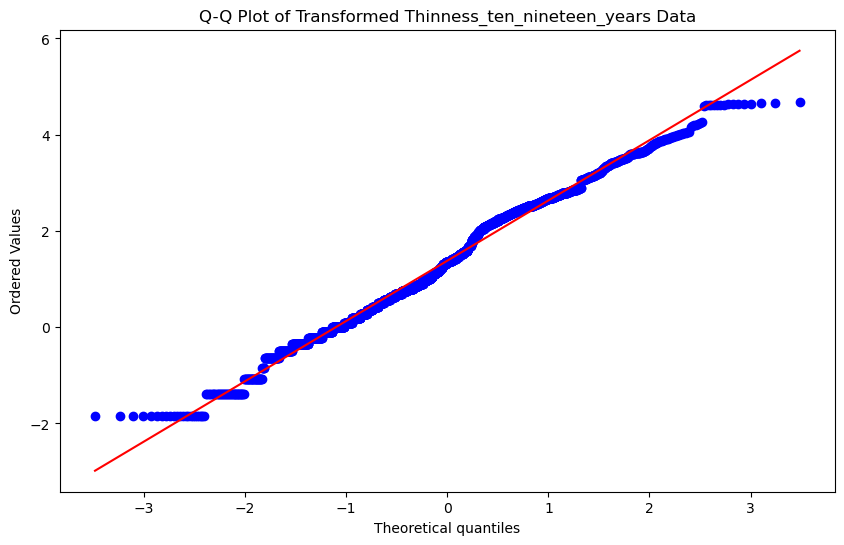

0       1.012204
1       3.947649
2       3.968629
3       4.090741
4       4.130089
          ...   
2806    2.732228
2807    0.269862
2808    2.804599
2809    2.657161
2810    2.413198
Name: Thinness_five_nine_years, Length: 2811, dtype: float64
Optimal lambda for Thinness_five_nine_years data is: 0.21380352502944086
Log-Likelihood of transformed Thinness_five_nine_years is: -3954205.8326634965


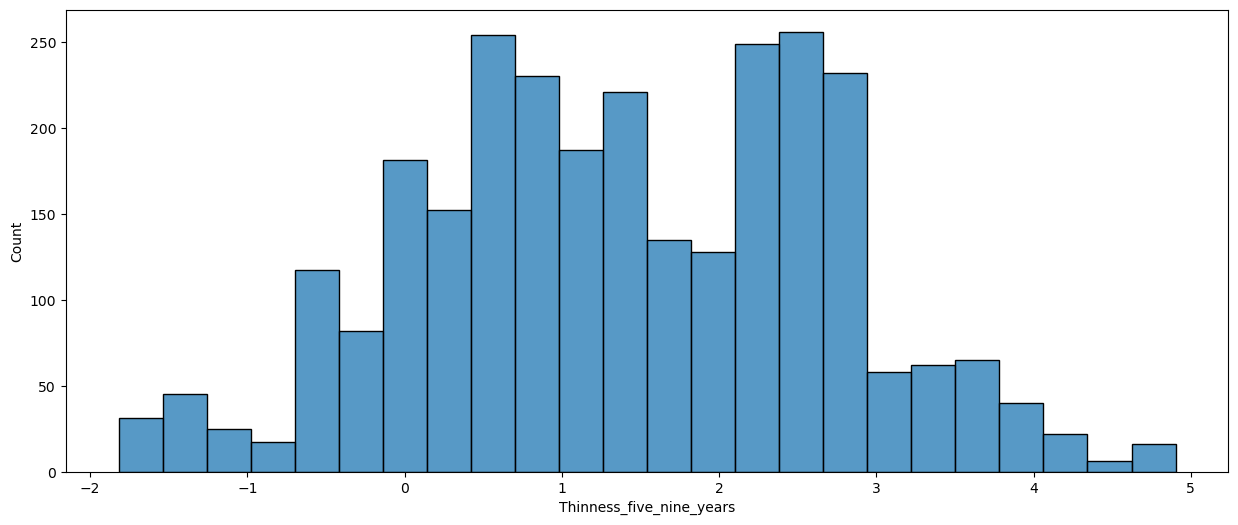

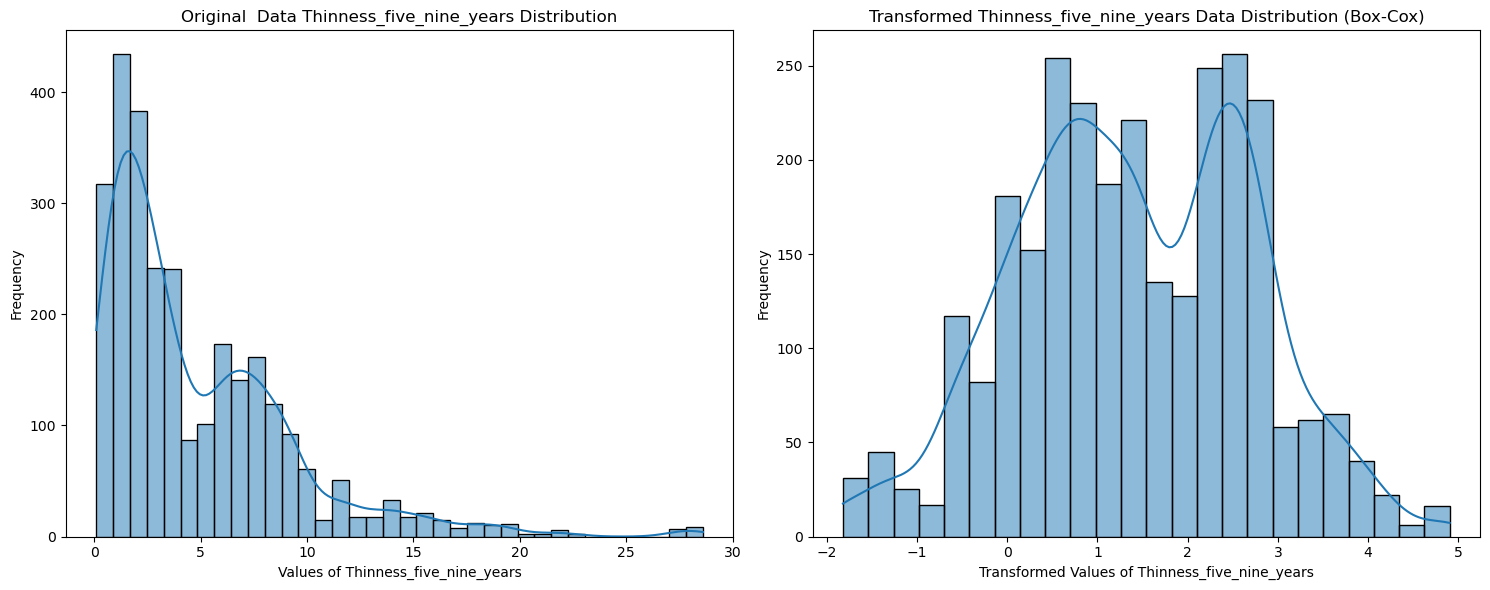

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9915111660957336, p-value=7.853469610741293e-12


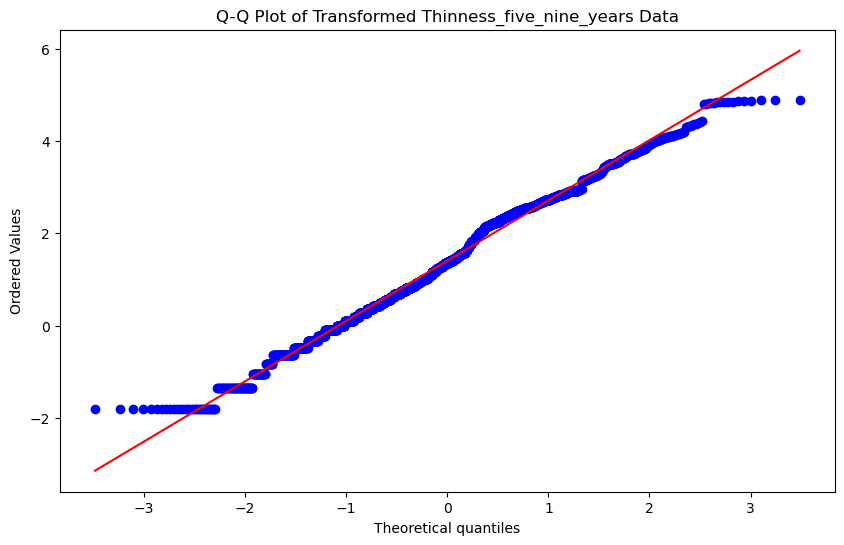

0       1.189029
1       2.461464
2       2.461464
3       1.973471
4       1.679884
          ...   
2806    5.652879
2807    5.748986
2808    5.652879
2809    5.845063
2810    6.133126
Name: Schooling, Length: 2811, dtype: float64
Optimal lambda for Schooling data is: 0.9793592797499677
Log-Likelihood of transformed Schooling is: -3956564.1119279345


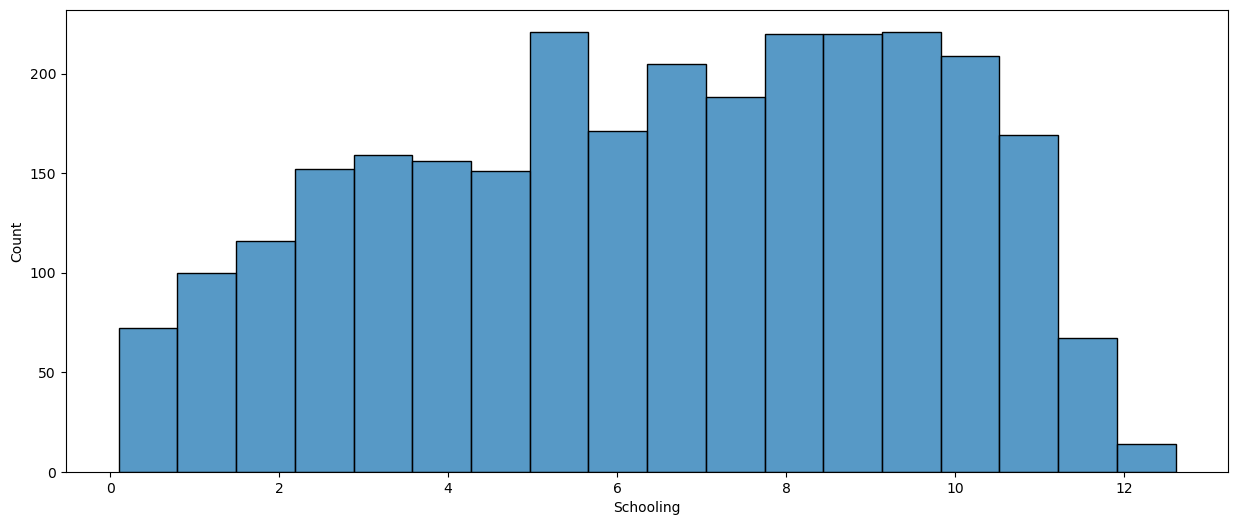

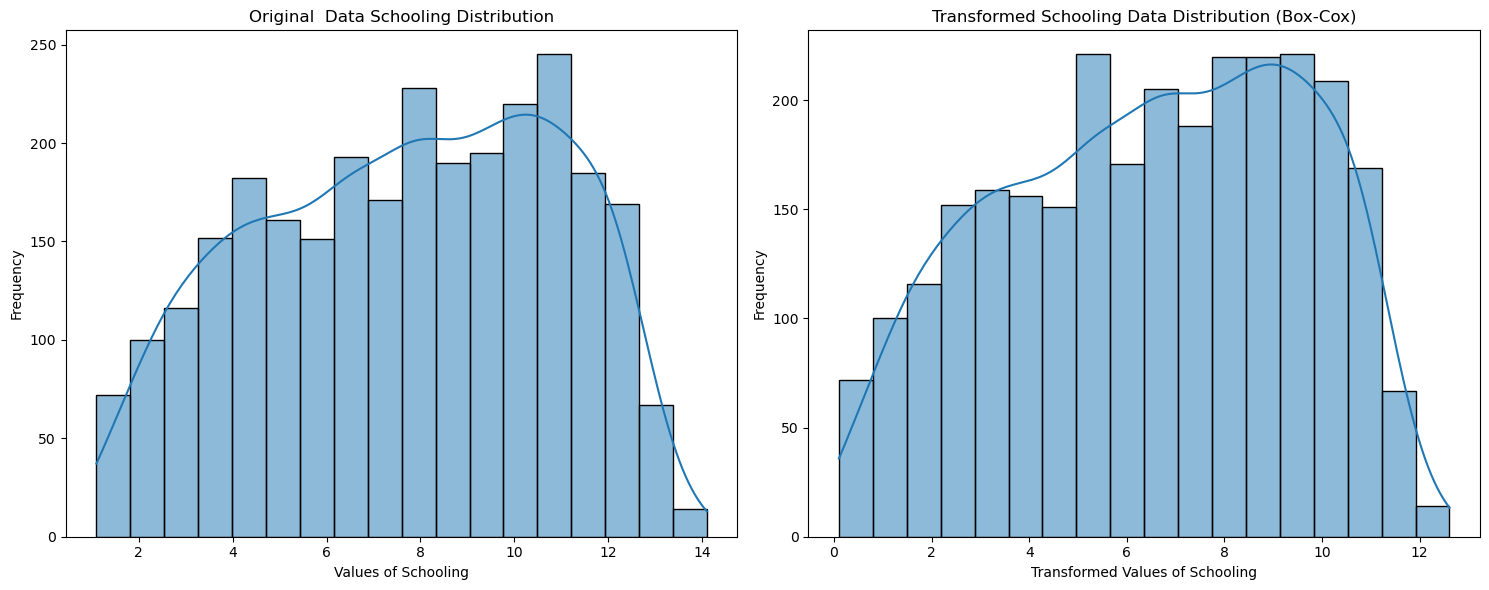

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9681333899497986, p-value=1.7061570432819618e-24


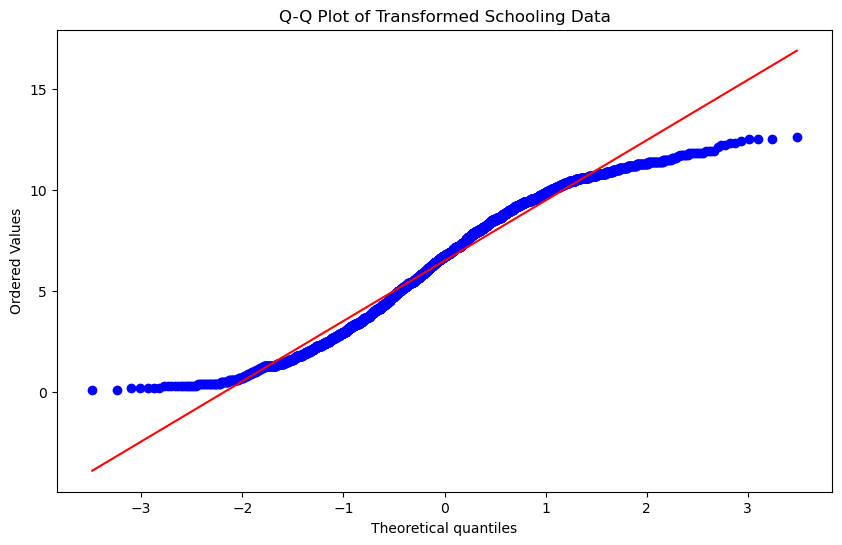

In [402]:
from scipy import stats

#data=pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\archive (1)\Life-Expectancy-Data-Updated.csv")

# Convert to NumPy array and apply Box-Cox transformation
# Ensure all values are positive
features=['Alcohol_consumption',
    'Infant_deaths',                 
    'Under_five_deaths',             
    'Adult_mortality',                          
    'Hepatitis_B',                   
    'Measles' ,                      
    'BMI'    ,                       
    'Polio',                         
    'Diphtheria',                    
    'Incidents_HIV',                 
    'GDP_per_capita' ,                        
    'Thinness_ten_nineteen_years',   
    'Thinness_five_nine_years',      
    'Schooling']
for i in features:
    original=dataa[i]
    transformed_values, lambda_value = stats.boxcox(dataa[i].to_numpy())

# Add transformed values back to the DataFrame
    dataa[i] = transformed_values #updated

    print(dataa[i])
    plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visibility
    sns.histplot(dataa[i], stat="count")

    # Calculate log-likelihood for transformed data
    print(f'Optimal lambda for {i} data is: {lambda_value}')
    ll_value = log_likelihood(dataa[i].dropna().to_numpy(), lambda_value)
    print(f'Log-Likelihood of transformed {i} is: {ll_value}')
    plt.figure(figsize=(15, 6))

    # Original Data Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(original, kde=True, stat="count")
    plt.title(f'Original  Data {i} Distribution')
    plt.xlabel(f'Values of {i}')
    plt.ylabel('Frequency')

    # Transformed Data Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(dataa[i], kde=True, stat="count")  # Using the updated Diphtheria column
    plt.title(f'Transformed {i} Data Distribution (Box-Cox)')
    plt.xlabel(f'Transformed Values of {i}')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk test for transformed data
    shapiro_test = stats.shapiro(dataa[i].dropna())
    print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

    # Q-Q plot for transformed data
    plt.figure(figsize=(10, 6))
    stats.probplot(dataa[i].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Transformed {i} Data')
    plt.show()



In [403]:
dataa.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0       5.974733           5.126415         4.713475            -1.915854   
1       5.150789           4.505035         4.516798            -2.031327   
2       5.211325           4.553197         4.529091            -2.031327   
3       5.521448           4.794040         4.593441            -1.830899   
4       5.646904           4.886991         4.623023            -1.830899   

    Hepatitis_B      Measles        BMI         Polio    Diphtheria  \
0  4.840151e+06   129.812861  68.329461  1.624602e+06  9.933850e+05   
1  4.840151e+06  2564.275148  75.654858  1.881089e+08  9.924879e+07   
2  5.507728e+06  1831.883623  74.663779  2.205175e+08  1.157754e+08   
3  5.507728e+06   578.790730  72.205300  2.205175e+08  1.157754e+08   
4  5.507728e+06   329.684822  71.229645  1.347091e+08  7.181480e+07   

   Incidents_HIV  GDP_per_capita  Thinness_ten_nineteen_years  \
0      -5.387249        4.508889                     0.904516   
1      -4.664712        5.565586                     3.835171   
2      -4.664712        5.570996                     3.855072   
3      -5.387249        5.296861                     3.961404   
4      -5.387249        5.203512                     3.998831   

   Thinness_five_nine_years  Schooling  Economy_status_Developed  \
0                  1.012204   1.189029                       0.0   
1                  3.947649   2.461464                       0.0   
2                  3.968629   2.461464                       0.0   
3                  4.090741   1.973471                       0.0   
4                  4.130089   1.679884                       0.0   

   Economy_status_Developing  Life_expectancy  
0                        1.0             55.8  
1                        1.0             63.0  
2                        1.0             62.5  
3                        1.0             59.9  
4                        1.0             58.8

# **3-Standarization** 

In [404]:


# Load data
# data = pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\archive (1)\Life-Expectancy-Data-Updated.csv")

features = [
    'Infant_deaths',                 
    'Under_five_deaths',             
    'Adult_mortality',                          
    'Hepatitis_B',                   
    'Measles',                      
    'BMI',                         
    'Polio',                         
    'Diphtheria',                    
    'Incidents_HIV',                 
    'GDP_per_capita',                        
    'Thinness_ten_nineteen_years',   
    'Thinness_five_nine_years',      
    'Schooling'
]

for i in features:
    # Original values
    original = dataa[i].dropna()  # Drop NaN values for accurate calculations

    # Calculate mean and standard deviation
    mean = original.mean()
    std_dev = original.std()

    # Apply Z-score normalization
    dataa[i] = (original - mean) / std_dev

    # Print transformed values
    print(dataa[i])



0       1.600346
1       1.047981
2       1.088564
3       1.296467
4       1.380572
          ...   
2806    1.012099
2807    0.956229
2808    0.977220
2809    1.036136
2810    0.985517
Name: Infant_deaths, Length: 2811, dtype: float64
0       1.505013
1       0.996555
2       1.035965
3       1.233040
4       1.309099
          ...   
2806    1.226409
2807    1.203308
2808    1.208169
2809    1.233040
2810    1.140807
Name: Under_five_deaths, Length: 2811, dtype: float64
0       1.125075
1       0.629004
2       0.660013
3       0.822318
4       0.896931
          ...   
2806    2.340578
2807    2.491860
2808    2.379871
2809    2.300217
2810    1.938558
Name: Adult_mortality, Length: 2811, dtype: float64
0      -1.579555
1      -1.579555
2      -1.510447
3      -1.510447
4      -1.510447
          ...   
2806   -1.350903
2807   -1.106629
2808   -1.473313
2809   -1.159796
2810    0.202686
Name: Hepatitis_B, Length: 2811, dtype: float64
0      -2.200962
1      -1.667117
2      -1.8277

In [405]:
print (dataa)

      Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0          1.600346           1.505013         1.125075            -1.915854   
1          1.047981           0.996555         0.629004            -2.031327   
2          1.088564           1.035965         0.660013            -2.031327   
3          1.296467           1.233040         0.822318            -1.830899   
4          1.380572           1.309099         0.896931            -1.830899   
...             ...                ...              ...                  ...   
2806       1.012099           1.226409         2.340578             1.028612   
2807       0.956229           1.203308         2.491860             1.052897   
2808       0.977220           1.208169         2.379871             0.916257   
2809       1.036136           1.233040         2.300217             0.973082   
2810       0.985517           1.140807         1.938558             1.591776   

      Hepatitis_B   Measles       BMI  

In [406]:
print (dataa.head())

   Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0       1.600346           1.505013         1.125075            -1.915854   
1       1.047981           0.996555         0.629004            -2.031327   
2       1.088564           1.035965         0.660013            -2.031327   
3       1.296467           1.233040         0.822318            -1.830899   
4       1.380572           1.309099         0.896931            -1.830899   

   Hepatitis_B   Measles       BMI     Polio  Diphtheria  Incidents_HIV  \
0    -1.579555 -2.200962 -1.515271 -2.009176   -2.041254      -1.743442   
1    -1.579555 -1.667117 -0.860227 -1.706069   -1.711797      -1.369265   
2    -1.510447 -1.827721 -0.948850 -1.653393   -1.656382      -1.369265   
3    -1.510447 -2.102507 -1.168690 -1.653393   -1.656382      -1.743442   
4    -1.510447 -2.157133 -1.255933 -1.792864   -1.803785      -1.743442   

   GDP_per_capita  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0       -2

In [407]:
dataa.to_csv('preprocessed_Data.csv', index=False)


In [408]:
mew=pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\preprocessed_Data.csv")

In [409]:
mew.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0       1.600346           1.505013         1.125075            -1.915854   
1       1.047981           0.996555         0.629004            -2.031327   
2       1.088564           1.035965         0.660013            -2.031327   
3       1.296467           1.233040         0.822318            -1.830899   
4       1.380572           1.309099         0.896931            -1.830899   

   Hepatitis_B   Measles       BMI     Polio  Diphtheria  Incidents_HIV  \
0    -1.579555 -2.200962 -1.515271 -2.009176   -2.041254      -1.743442   
1    -1.579555 -1.667117 -0.860227 -1.706069   -1.711797      -1.369265   
2    -1.510447 -1.827721 -0.948850 -1.653393   -1.656382      -1.369265   
3    -1.510447 -2.102507 -1.168690 -1.653393   -1.656382      -1.743442   
4    -1.510447 -2.157133 -1.255933 -1.792864   -1.803785      -1.743442   

   GDP_per_capita  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0       -2.546518                    -0.378845                 -0.300110   
1       -1.493584                     1.951644                  1.937780   
2       -1.488194                     1.967469                  1.953774   
3       -1.761352                     2.052026                  2.046868   
4       -1.854369                     2.081788                  2.076866   

   Schooling  Economy_status_Developed  Economy_status_Developing  \
0  -1.747021                       0.0                        1.0   
1  -1.327793                       0.0                        1.0   
2  -1.327793                       0.0                        1.0   
3  -1.488572                       0.0                        1.0   
4  -1.585300                       0.0                        1.0   

   Life_expectancy  
0             55.8  
1             63.0  
2             62.5  
3             59.9  
4             58.8

## **correlation preprocessed data**

Infant_deaths                 -0.903144
Under_five_deaths             -0.916232
Adult_mortality               -0.934598
Alcohol_consumption            0.365613
Hepatitis_B                    0.444995
Measles                        0.523371
BMI                            0.592764
Polio                          0.631319
Diphtheria                     0.628505
Incidents_HIV                 -0.653766
GDP_per_capita                 0.797538
Thinness_ten_nineteen_years   -0.532054
Thinness_five_nine_years      -0.531503
Schooling                      0.730232
Economy_status_Developed       0.525535
Economy_status_Developing     -0.525535
Life_expectancy                1.000000
dtype: float64


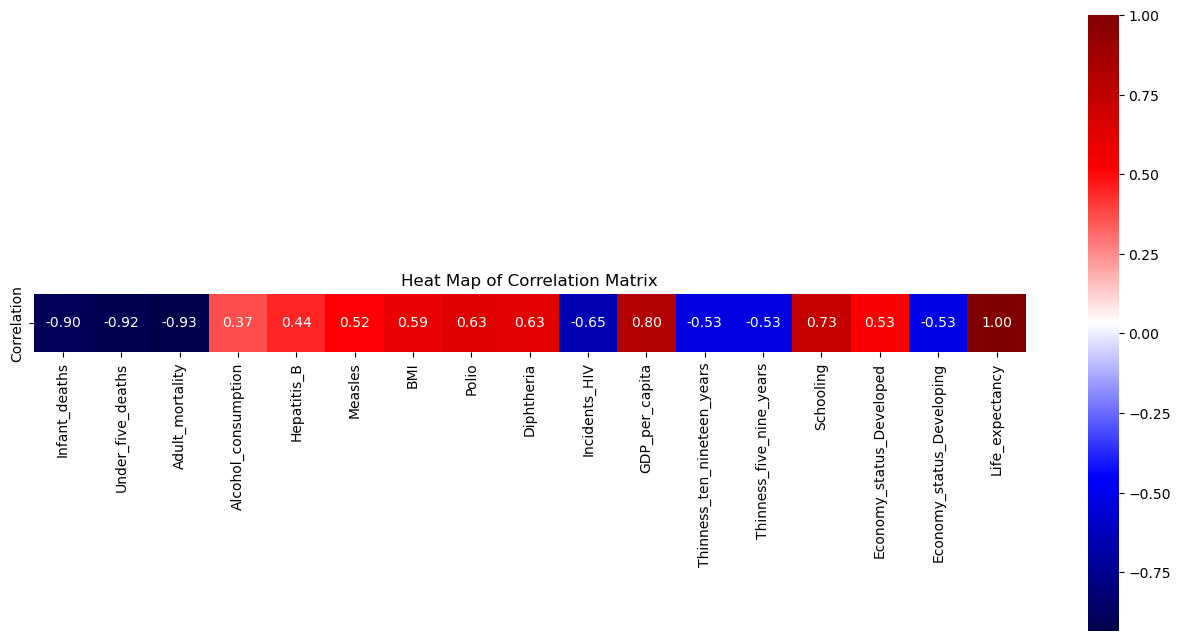

In [410]:
#interpreting the effect of various factors on life expected range
numeric_data = dataa.select_dtypes(include='number')
corr=numeric_data.corrwith(numeric_data['Life_expectancy'])# return series not a data frame
corr_df = corr.to_frame(name='Correlation').T 
print (corr)
plt.figure(figsize=(16, 8))
sns.heatmap(corr_df, annot=True, cmap='seismic', fmt='.2f', square=True)
plt.title('Heat Map of Correlation Matrix')
plt.show()

# 4- **Anomaly Detection using PDF product Method**
 Defines anomalies based on probability of all features product for each reading as features are independant is a better statistical approach than the sum method 

 $$
P(x) = \prod_{j=1}^{f} P(x_j) = \prod_{j=1}^{f} \left( \frac{1}{\sqrt{2 \pi \sigma_j^2}} \exp\left(-\frac{(x_j - \mu_j)^2}{2 \sigma_j^2}\right) \right)
$$

For independent features \( x_j \):






In [411]:

features = [
    'Infant_deaths',                 
    'Under_five_deaths',             
    'Adult_mortality',                          
    'Hepatitis_B',                   
    'Measles',                      
    'BMI',                         
    'Polio',                         
    'Diphtheria',                    
    'Incidents_HIV',                 
    'GDP_per_capita',                        
    'Thinness_ten_nineteen_years',   
    'Thinness_five_nine_years',      
    'Schooling'
]

# Convert DataFrame to NumPy array
x = dataa[features].to_numpy()

def basics(x):
    m, f = x.shape  # Number of rows and columns
    mean = np.zeros(f)  # Reference mean per feature
    var = np.zeros(f)   # Reference variance per feature

    for j in range(f):
        mean[j] = np.nanmean(x[:, j])  # Calculate mean for each feature, ignoring NaNs
        var[j] = np.nanvar(x[:, j], ddof=0)  # Calculate variance for each feature, ignoring NaNs

    return (mean, var)

# Equation of anomaly detection using product of probabilities
def prop(x, mean, var):
    m, f = x.shape
    propa = np.ones(m)  # Initialize with 1 for multiplication
    for i in range(m):
        for j in range(f):
            if not np.isnan(x[i, j]):  # Check for NaN values
                prob = (1 / (sqrt(2 * pi * var[j]))) * np.exp(-((x[i, j] - mean[j]) ** 2) / (2 * var[j]))
                propa[i] *= prob  # Multiply probabilities
    return propa


In [412]:

mean, var = basics(x)
probabilities = prop(x, mean, var)

anomalies = []
anomaly_indices = []  # List to store indices of anomalies
threshold = np.percentile(probabilities, 20)  # 20th percentile threshold

print("Threshold for anomalies (20th percentile):", threshold)

for i in range(len(probabilities)):
    if probabilities[i] < threshold:
        anomalies.append(True)
        anomaly_indices.append(i)  # Store the index of the anomaly
    else:
        anomalies.append(False)

print("Anomalies identified (True/False):", anomalies)

# Count and print the total number of anomalies and their indices
total_anomalies = sum(anomalies)
print("Total number of anomalies identified overall:", total_anomalies)
print("Indices of anomalies:", anomaly_indices)


Threshold for anomalies (20th percentile): 4.673467556227561e-10
Anomalies identified (True/False): [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, False, True, False, False, True, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, Fals

In [413]:

# Create a cleaned DataFrame and reset the index
cleaned_data = dataa.drop(index=anomaly_indices).reset_index(drop=True)

# Print the original and cleaned DataFrames
print("Original DataFrame (dataa):")
print(dataa)

print("\nCleaned DataFrame (cleaned_data):")
print(cleaned_data)


Original DataFrame (dataa):
      Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0          1.600346           1.505013         1.125075            -1.915854   
1          1.047981           0.996555         0.629004            -2.031327   
2          1.088564           1.035965         0.660013            -2.031327   
3          1.296467           1.233040         0.822318            -1.830899   
4          1.380572           1.309099         0.896931            -1.830899   
...             ...                ...              ...                  ...   
2806       1.012099           1.226409         2.340578             1.028612   
2807       0.956229           1.203308         2.491860             1.052897   
2808       0.977220           1.208169         2.379871             0.916257   
2809       1.036136           1.233040         2.300217             0.973082   
2810       0.985517           1.140807         1.938558             1.591776   

      Hepat

In [414]:
dataa.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0       1.600346           1.505013         1.125075            -1.915854   
1       1.047981           0.996555         0.629004            -2.031327   
2       1.088564           1.035965         0.660013            -2.031327   
3       1.296467           1.233040         0.822318            -1.830899   
4       1.380572           1.309099         0.896931            -1.830899   

   Hepatitis_B   Measles       BMI     Polio  Diphtheria  Incidents_HIV  \
0    -1.579555 -2.200962 -1.515271 -2.009176   -2.041254      -1.743442   
1    -1.579555 -1.667117 -0.860227 -1.706069   -1.711797      -1.369265   
2    -1.510447 -1.827721 -0.948850 -1.653393   -1.656382      -1.369265   
3    -1.510447 -2.102507 -1.168690 -1.653393   -1.656382      -1.743442   
4    -1.510447 -2.157133 -1.255933 -1.792864   -1.803785      -1.743442   

   GDP_per_capita  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0       -2.546518                    -0.378845                 -0.300110   
1       -1.493584                     1.951644                  1.937780   
2       -1.488194                     1.967469                  1.953774   
3       -1.761352                     2.052026                  2.046868   
4       -1.854369                     2.081788                  2.076866   

   Schooling  Economy_status_Developed  Economy_status_Developing  \
0  -1.747021                       0.0                        1.0   
1  -1.327793                       0.0                        1.0   
2  -1.327793                       0.0                        1.0   
3  -1.488572                       0.0                        1.0   
4  -1.585300                       0.0                        1.0   

   Life_expectancy  
0             55.8  
1             63.0  
2             62.5  
3             59.9  
4             58.8

In [415]:
cleaned_data.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0      -0.241757          -0.293761        -1.204265             2.480038   
1      -0.099749          -0.157218        -1.164824             2.295392   
2      -0.558947          -0.593597        -1.257458             2.315094   
3       0.090080           0.016773        -1.107203             1.865481   
4      -0.769473          -0.792984        -1.379851             2.028114   

   Hepatitis_B   Measles       BMI     Polio  Diphtheria  Incidents_HIV  \
0     1.148423  1.057218  0.326815  1.171947    1.022821      -1.369265   
1     1.148423  1.218095  0.233240  0.862696    1.022821      -1.369265   
2     1.284631  1.383321  0.515075  1.171947    1.177680      -1.369265   
3     0.888521  0.900664  0.093576  1.014161    1.022821      -1.743442   
4     1.284631  1.300163  0.704805  1.171947    1.177680      -1.369265   

   GDP_per_capita  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0       -0.250778                    -0.706674                 -0.643408   
1       -0.343014                    -0.602813                 -0.594298   
2       -0.116816                    -0.821568                 -0.748874   
3       -0.468571                    -0.507858                 -0.458821   
4       -0.065951                    -0.950528                 -0.866048   

   Schooling  Economy_status_Developed  Economy_status_Developing  \
0   0.481246                       0.0                        1.0   
1   0.449770                       0.0                        1.0   
2   0.512714                       0.0                        1.0   
3   0.418288                       0.0                        1.0   
4   0.638518                       0.0                        1.0   

   Life_expectancy  
0             75.6  
1             75.2  
2             76.9  
3             74.6  
4             78.0

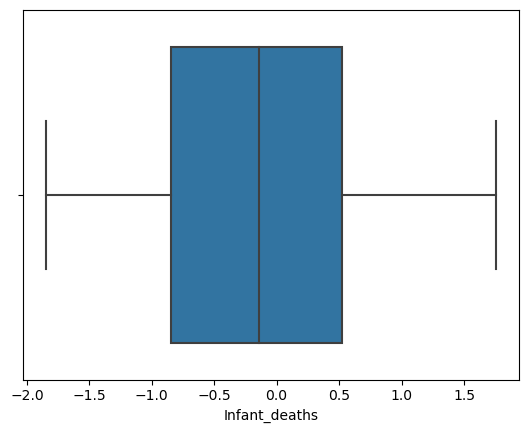

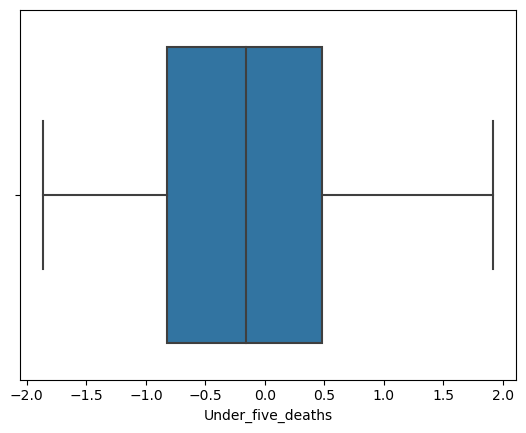

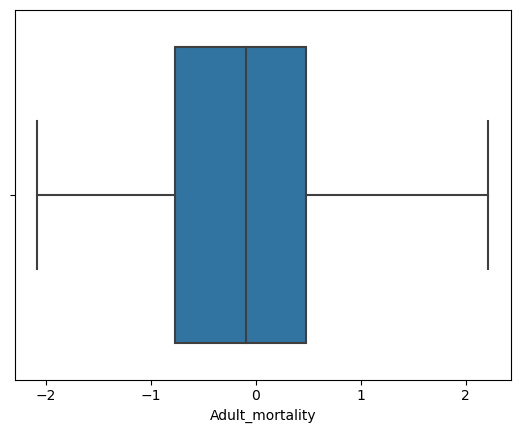

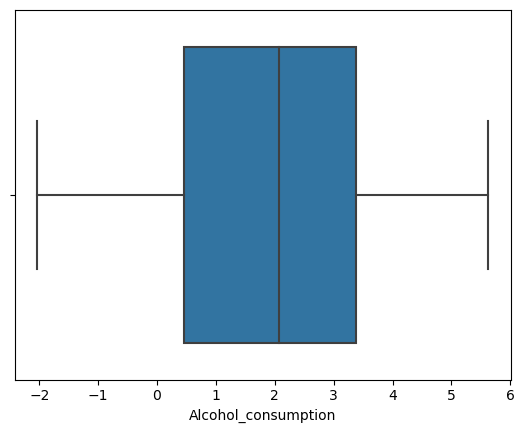

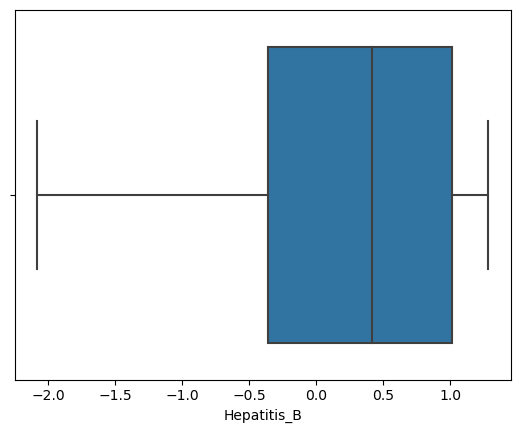

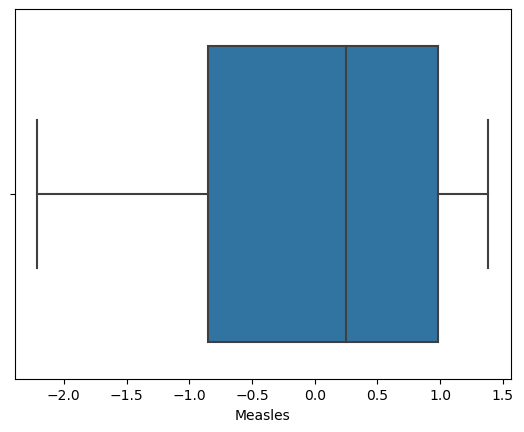

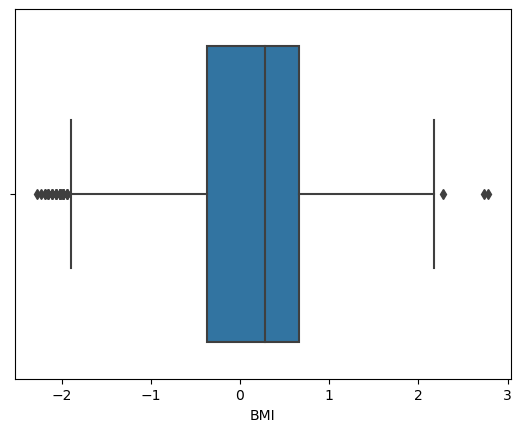

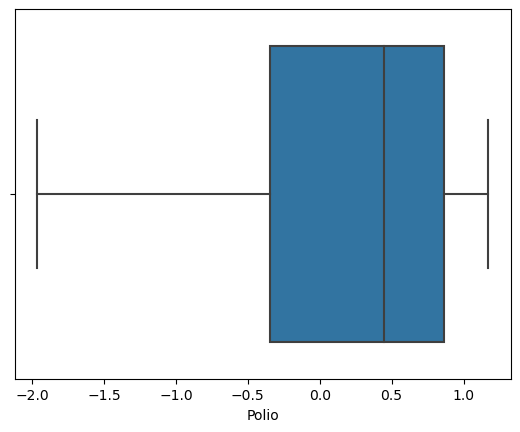

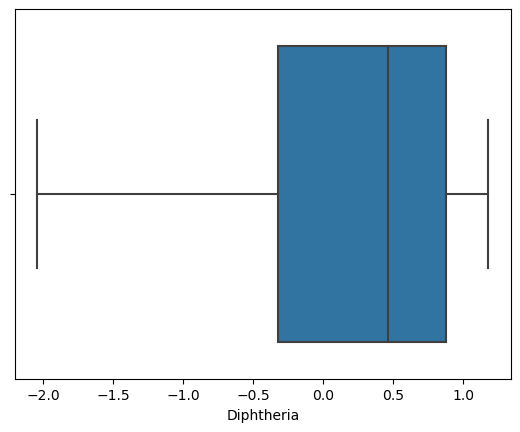

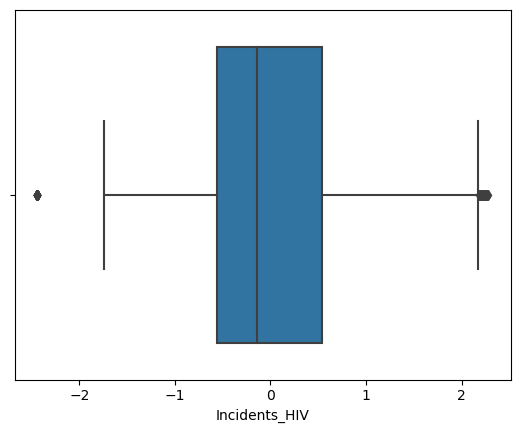

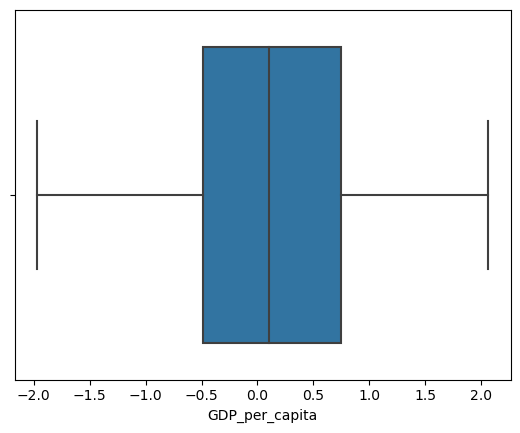

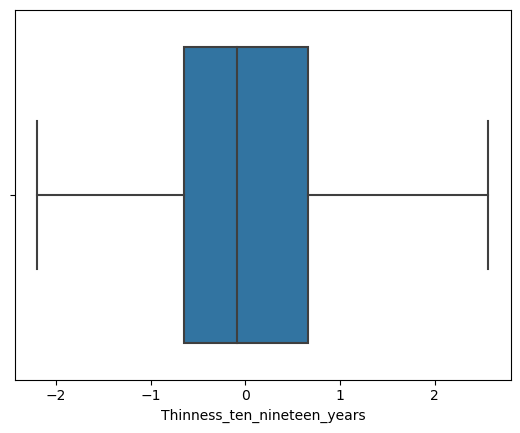

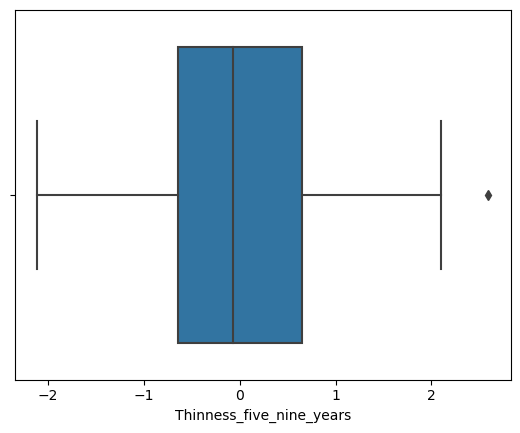

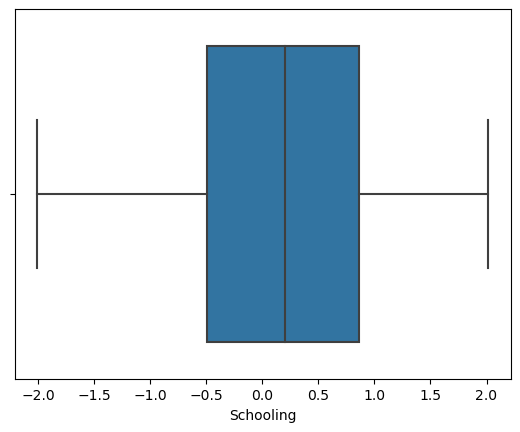

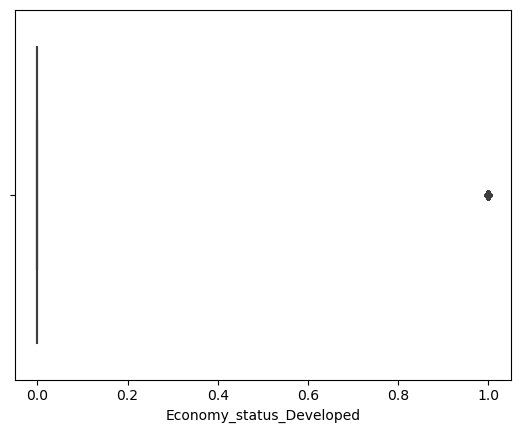

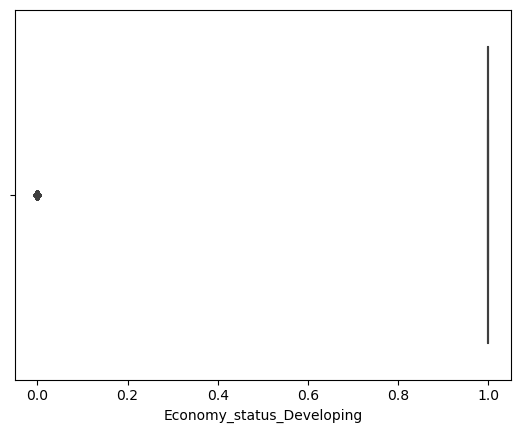

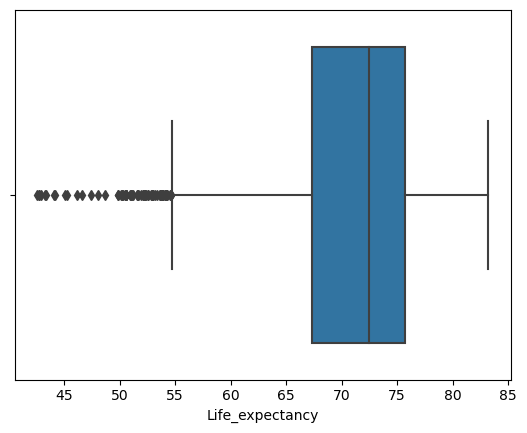

In [416]:
for i in cleaned_data.select_dtypes(include="number").columns:
  sns.boxplot(data=cleaned_data, x=i)
  plt.show()

In [417]:
cleaned_data.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0      -0.241757          -0.293761        -1.204265             2.480038   
1      -0.099749          -0.157218        -1.164824             2.295392   
2      -0.558947          -0.593597        -1.257458             2.315094   
3       0.090080           0.016773        -1.107203             1.865481   
4      -0.769473          -0.792984        -1.379851             2.028114   

   Hepatitis_B   Measles       BMI     Polio  Diphtheria  Incidents_HIV  \
0     1.148423  1.057218  0.326815  1.171947    1.022821      -1.369265   
1     1.148423  1.218095  0.233240  0.862696    1.022821      -1.369265   
2     1.284631  1.383321  0.515075  1.171947    1.177680      -1.369265   
3     0.888521  0.900664  0.093576  1.014161    1.022821      -1.743442   
4     1.284631  1.300163  0.704805  1.171947    1.177680      -1.369265   

   GDP_per_capita  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0       -0.250778                    -0.706674                 -0.643408   
1       -0.343014                    -0.602813                 -0.594298   
2       -0.116816                    -0.821568                 -0.748874   
3       -0.468571                    -0.507858                 -0.458821   
4       -0.065951                    -0.950528                 -0.866048   

   Schooling  Economy_status_Developed  Economy_status_Developing  \
0   0.481246                       0.0                        1.0   
1   0.449770                       0.0                        1.0   
2   0.512714                       0.0                        1.0   
3   0.418288                       0.0                        1.0   
4   0.638518                       0.0                        1.0   

   Life_expectancy  
0             75.6  
1             75.2  
2             76.9  
3             74.6  
4             78.0

In [418]:
cleaned_data.tail()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
2244       0.778684           0.852857         1.488141             1.980632   
2245       0.824401           0.902852         1.564999             1.932430   
2246       0.758900           0.832652         1.407298             1.810859   
2247       0.863881           0.979311         1.638157             1.851916   
2248       0.985517           1.140807         1.938558             1.591776   

      Hepatitis_B  Measles       BMI     Polio  Diphtheria  Incidents_HIV  \
2244     0.307707 -0.90122 -0.592022  0.193601    0.096501       1.721190   
2245     0.764651 -0.90122 -0.636965  0.577964    0.593367       1.764611   
2246    -0.091570 -0.90122 -0.592022 -0.246447   -0.323008       1.677230   
2247     1.016416 -0.90122 -0.636965  0.577964    0.593367       1.793988   
2248     0.202686 -0.90122 -0.681811 -0.143694   -0.122324       1.900701   

      GDP_per_capita  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
2244       -0.790451                     0.589019                  0.535668   
2245       -0.795046                     0.645080                  0.592713   
2246       -0.789943                     0.530615                  0.496313   
2247       -0.796584                     0.698999                  0.665383   
2248       -0.984789                     0.801092                  0.767963   

      Schooling  Economy_status_Developed  Economy_status_Developing  \
2244   0.166161                       0.0                        1.0   
2245   0.103052                       0.0                        1.0   
2246   0.166161                       0.0                        1.0   
2247   0.071485                       0.0                        1.0   
2248  -0.118093                       0.0                        1.0   

      Life_expectancy  
2244             58.4  
2245             56.9  
2246             59.5  
2247             55.0  
2248             50.6

# **6-Model for predection**  

3.9380933554519606


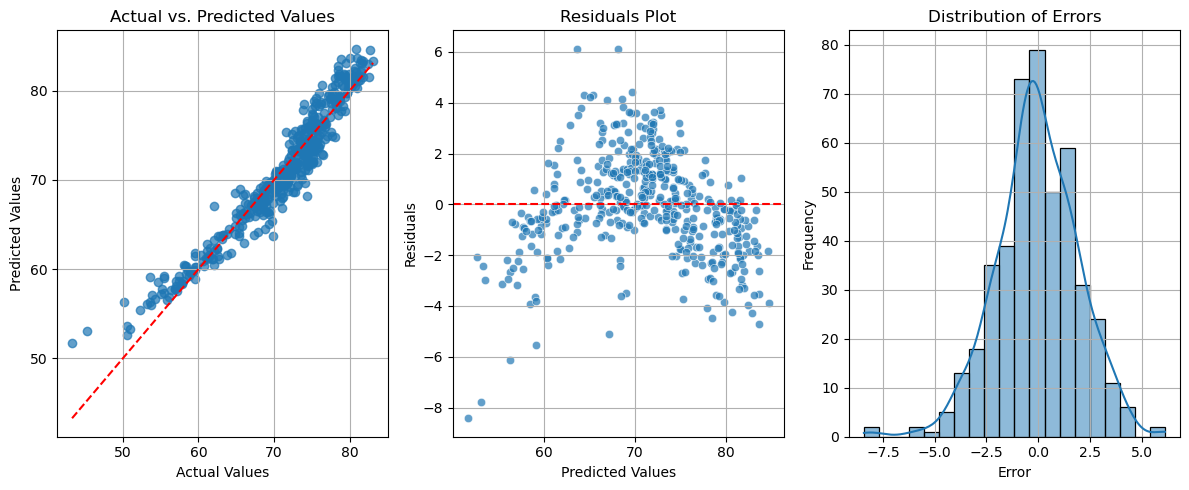

In [437]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y = cleaned_data['Life_expectancy']
X = cleaned_data.drop(columns=['Life_expectancy'])

# Step 2: Split the data while preserving the ratio of developed to developing countries
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=cleaned_data['Economy_status_Developed'], random_state=42)


# Step 3: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
#print (y_pred)
mse = mean_squared_error(y_test, y_pred)
print (mse)

# 1. Actual vs. Predicted Values
plt.figure(figsize=(12, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

# 2. Residuals Plot
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

# 3. Distribution of Errors
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=20, kde=True)
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


In [435]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are defined
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
#print("Root Mean Squared Error:", rmse)


R² Score: 0.9243787505975336
Mean Absolute Error: 1.5243243948991443
Mean Squared Error: 3.9380933554519606


Accuracy: 0.9222222222222223


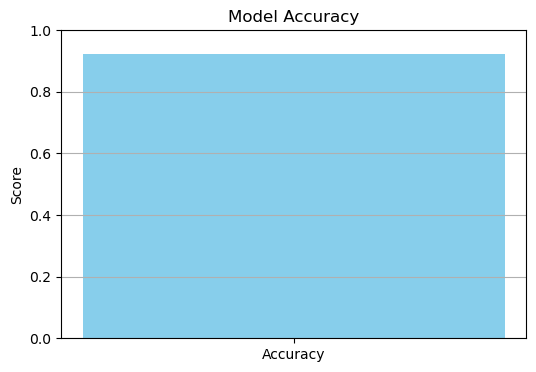

In [436]:
from sklearn.metrics import accuracy_score

# Assuming y_pred has already been computed from the model predictions
# For regression tasks like predicting life expectancy, accuracy isn't typically used.
# However, if you want to convert predictions to binary (e.g., above/below a threshold), you can do so.

# Example: Convert predictions to binary based on a threshold (e.g., mean of y_test)
threshold = y_test.mean()
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

# Calculate Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)

# Print the Accuracy
print("Accuracy:", accuracy)

# Visualize Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()
